# NBA Draft Pick Valuation & Return on Investment (ROI) Analysis

# 0. Setup and Initial Imports

In [1]:
# Cell 1: Imports
import pandas as pd
from nba_api.stats.endpoints import drafthistory
import time

print("Libraries imported successfully!")

Libraries imported successfully!


# 1. Data Collection

## 1.1. NBA Draft History (2000-2020)
This section fetches the draft history for the specified years using `nba_api`.

In [2]:
# Cell 2: Define Years and Fetch Data
start_year = 2000
end_year = 2020
all_draft_data = [] # This list will hold DataFrames for each year

print(f"Preparing to fetch draft data from {start_year} to {end_year}...")

for year in range(start_year, end_year + 1):
    try:
        print(f"Fetching draft data for the year: {year}...")
        # Request data for the current year
        draft_info = drafthistory.DraftHistory(
            league_id='00', # '00' is the league ID for the NBA
            season_year_nullable=str(year) # The draft year
        )
        
        # The actual draft pick data is usually in the first DataFrame returned
        draft_df = draft_info.get_data_frames()[0] 
        
        # Add a 'DRAFT_YEAR' column to easily identify the draft year for each player
        draft_df['DRAFT_YEAR'] = year 
        
        all_draft_data.append(draft_df)
        print(f"Successfully fetched data for {year}. {len(draft_df)} picks found.")
        
        # Pause for a short duration to be respectful to the API
        time.sleep(0.6) # 600 milliseconds

    except Exception as e:
        print(f"Error fetching draft data for {year}: {e}")
        # If an error occurs for one year, we'll print it and continue to the next
        continue

if all_draft_data:
    print(f"\nSuccessfully fetched draft data for {len(all_draft_data)} seasons.")
else:
    print("\nNo draft data was fetched. Please check for errors or API connectivity.")

Preparing to fetch draft data from 2000 to 2020...
Fetching draft data for the year: 2000...
Successfully fetched data for 2000. 58 picks found.
Fetching draft data for the year: 2001...
Successfully fetched data for 2001. 57 picks found.
Fetching draft data for the year: 2002...
Successfully fetched data for 2002. 57 picks found.
Fetching draft data for the year: 2003...
Successfully fetched data for 2003. 58 picks found.
Fetching draft data for the year: 2004...
Successfully fetched data for 2004. 59 picks found.
Fetching draft data for the year: 2005...
Successfully fetched data for 2005. 60 picks found.
Fetching draft data for the year: 2006...
Successfully fetched data for 2006. 60 picks found.
Fetching draft data for the year: 2007...
Successfully fetched data for 2007. 60 picks found.
Fetching draft data for the year: 2008...
Successfully fetched data for 2008. 60 picks found.
Fetching draft data for the year: 2009...
Successfully fetched data for 2009. 60 picks found.
Fetching 

In [3]:
# Cell 3: Combine DataFrames and Inspect
if all_draft_data: # Check if the list actually has data
    # Concatenate all DataFrames in the list into a single DataFrame
    nba_draft_history_df = pd.concat(all_draft_data, ignore_index=True)
    
    print("--- Combined Draft History DataFrame ---")
    print(f"Shape of the DataFrame (rows, columns): {nba_draft_history_df.shape}")
    
    print("\nFirst 5 rows of the combined DataFrame:")
    # Using display() for richer output in Jupyter Notebooks, otherwise use print()
    try:
        display(nba_draft_history_df.head()) 
    except NameError: # Fallback if display() is not available (e.g. standard Python interpreter)
        print(nba_draft_history_df.head())
        
    print("\nColumn names in the DataFrame:")
    print(list(nba_draft_history_df.columns))
    
    print("\nData types of each column:")
    # Using display() for richer output in Jupyter Notebooks
    try:
        display(nba_draft_history_df.info())
    except NameError:
        print(nba_draft_history_df.info())

else:
    print("The 'all_draft_data' list is empty. Cannot combine DataFrames.")
    # Create an empty DataFrame to avoid errors in subsequent cells if needed
    nba_draft_history_df = pd.DataFrame()

--- Combined Draft History DataFrame ---
Shape of the DataFrame (rows, columns): (1249, 15)

First 5 rows of the combined DataFrame:


,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG,DRAFT_YEAR
0,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,NJN,Cincinnati,College/University,1,2000
1,2031,Stromile Swift,2000,1,2,2,Draft,1610612763,Vancouver,Grizzlies,VAN,Louisiana State,College/University,1,2000
2,2032,Darius Miles,2000,1,3,3,Draft,1610612746,Los Angeles,Clippers,LAC,East St. Louis,High School,1,2000
3,2033,Marcus Fizer,2000,1,4,4,Draft,1610612741,Chicago,Bulls,CHI,Iowa State,College/University,1,2000
4,2034,Mike Miller,2000,1,5,5,Draft,1610612753,Orlando,Magic,ORL,Florida,College/University,1,2000



Column names in the DataFrame:
['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK', 'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE', 'PLAYER_PROFILE_FLAG', 'DRAFT_YEAR']

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PERSON_ID            1249 non-null   int64 
 1   PLAYER_NAME          1249 non-null   object
 2   SEASON               1249 non-null   object
 3   ROUND_NUMBER         1249 non-null   int64 
 4   ROUND_PICK           1249 non-null   int64 
 5   OVERALL_PICK         1249 non-null   int64 
 6   DRAFT_TYPE           1249 non-null   object
 7   TEAM_ID              1249 non-null   int64 
 8   TEAM_CITY            1249 non-null   object
 9   TEAM_NAME            1249 non-null   object
 10  TEAM_ABBR

None

In [4]:
# Cell 4: Save the combined DataFrame to a CSV file
if not nba_draft_history_df.empty:
    csv_file_name = "nba_draft_history_2000_2020.csv"
    try:
        nba_draft_history_df.to_csv(csv_file_name, index=False)
        print(f"Draft history data successfully saved to: {csv_file_name}")
    except Exception as e:
        print(f"Error saving data to CSV: {e}")
else:
    print("DataFrame is empty. Nothing to save.")

Draft history data successfully saved to: nba_draft_history_2000_2020.csv


## 1.2. Player Performance Stats (Traditional - Sample)
This section fetches traditional season-by-season stats for a sample of players.
It aims to get the first 5 seasons and correctly includes `SEASON_ID`.
The current configuration is for a test run of 100 players.

In [5]:
# Cell 5 (Revised): Setup for Fetching Player Performance Stats (More Robust)

import pandas as pd
import time
from nba_api.stats.endpoints import playercareerstats # Ensure this import is here

# --- Configuration ---
N_SEASONS_TO_FETCH = 5
API_DELAY_SECONDS = 10   # Increased delay (e.g., 2 to 5 seconds)
API_TIMEOUT_SECONDS = 60 # Increased timeout for API calls

# Main CSV file where all successfully fetched player stats are stored
ALL_PLAYER_STATS_CSV = "nba_player_career_stats_first_5_seasons_all.csv"

# For testing the new logic on a small subset first
TEST_MODE = False
NUM_TEST_PLAYERS = 100 # Number of *new* players to fetch if TEST_MODE is True

# --- Load Draft History ---
try:
    nba_draft_history_df
    print("nba_draft_history_df is already in memory.")
except NameError:
    print("nba_draft_history_df not found in memory, loading from CSV...")
    try:
        nba_draft_history_df = pd.read_csv("nba_draft_history_2000_2020.csv")
        print("Successfully loaded nba_draft_history_2000_2020.csv")
    except FileNotFoundError:
        print("ERROR: nba_draft_history_2000_2020.csv not found. Please ensure it was saved correctly.")
        nba_draft_history_df = pd.DataFrame() # Avoids downstream errors

# --- Initialize lists for the current run/batch ---
all_player_career_stats_current_batch = [] # Stats collected in the upcoming run of Cell 6
failed_fetches_log = []                  # Log of failures in the upcoming run of Cell 6

# --- Determine players already processed ---
already_processed_player_ids = set()
try:
    existing_player_stats_df = pd.read_csv(ALL_PLAYER_STATS_CSV)
    if 'PLAYER_ID' in existing_player_stats_df.columns:
        already_processed_player_ids = set(existing_player_stats_df['PLAYER_ID'].unique())
        print(f"Found {len(already_processed_player_ids)} players already processed in {ALL_PLAYER_STATS_CSV}.")
    else:
        print(f"Warning: {ALL_PLAYER_STATS_CSV} found, but no 'PLAYER_ID' column. Assuming no players processed from this file.")
except FileNotFoundError:
    print(f"{ALL_PLAYER_STATS_CSV} not found. Assuming no players processed yet.")

# --- Determine players to process in this run ---
if not nba_draft_history_df.empty:
    # Get all unique player IDs from draft history
    all_drafted_player_info = nba_draft_history_df[['PERSON_ID', 'PLAYER_NAME']].drop_duplicates(subset=['PERSON_ID'])
    
    # Filter out players whose stats we've already successfully fetched
    players_needing_stats_df = all_drafted_player_info[
        ~all_drafted_player_info['PERSON_ID'].isin(already_processed_player_ids)
    ]
    
    print(f"Total unique players in draft history: {len(all_drafted_player_info)}")
    print(f"Players whose stats still need to be fetched: {len(players_needing_stats_df)}")

    if TEST_MODE:
        print(f"--- RUNNING IN TEST MODE (will attempt to fetch for {NUM_TEST_PLAYERS} new players) ---")
        players_to_process_this_run = players_needing_stats_df.head(NUM_TEST_PLAYERS)
    else:
        print(f"--- RUNNING IN FULL MODE (will attempt to fetch for all {len(players_needing_stats_df)} remaining players) ---")
        players_to_process_this_run = players_needing_stats_df
else:
    print("Draft history is empty. Cannot determine players to process.")
    players_to_process_this_run = pd.DataFrame()


if players_to_process_this_run.empty and not TEST_MODE and len(already_processed_player_ids) > 0:
    print("No new players to process. All players from draft history might already be in the stats CSV.")
elif players_to_process_this_run.empty and TEST_MODE:
     print(f"No new players to process for TEST_MODE (perhaps all {NUM_TEST_PLAYERS} were already processed or list is exhausted).")
else:
    print(f"Prepared to fetch stats for {len(players_to_process_this_run)} players in this run.")
    
print(f"API Delay: {API_DELAY_SECONDS}s, API Timeout: {API_TIMEOUT_SECONDS}s")
print(f"Data for this batch will be stored in 'all_player_career_stats_current_batch'.")
print(f"Errors will be logged in 'failed_fetches_log'.")

nba_draft_history_df is already in memory.
nba_player_career_stats_first_5_seasons_all.csv not found. Assuming no players processed yet.
Total unique players in draft history: 1249
Players whose stats still need to be fetched: 1249
--- RUNNING IN FULL MODE (will attempt to fetch for all 1249 remaining players) ---
Prepared to fetch stats for 1249 players in this run.
API Delay: 10s, API Timeout: 60s
Data for this batch will be stored in 'all_player_career_stats_current_batch'.
Errors will be logged in 'failed_fetches_log'.


In [6]:
# Cell 6: Loop to Fetch Player Performance Stats (Traditional)
# Fetches season-by-season traditional stats for players identified in Cell 5.
# Ensures SEASON_ID is captured and limits to N_SEASONS_TO_FETCH.

# These lists should be initialized in Cell 5 before each batch run.
# If re-running this cell for a *new* batch setup by Cell 5, they should be fresh (empty).
# If continuing an *interrupted* batch, this cell would ideally resume, but current logic re-populates from scratch.

if 'players_to_process_this_run' in locals() and not players_to_process_this_run.empty:
    print(f"\nStarting to fetch traditional career stats for {len(players_to_process_this_run)} players in this batch...")
    # Re-initialize batch-specific lists here if Cell 5 is not re-run before this cell for a new logical batch
    # This ensures data from previous partial runs of THIS cell doesn't carry over if Cell 5 wasn't re-run.
    # However, the primary design is Cell 5 sets up the batch and clears these lists.
    # For safety if running cells out of strict order:
    if 'all_player_career_stats_current_batch' not in globals() or 'failed_fetches_log' not in globals() :
         all_player_career_stats_current_batch = []
         failed_fetches_log = []
    elif len(all_player_career_stats_current_batch) > 0 or len(failed_fetches_log) > 0:
         print("Warning: 'all_player_career_stats_current_batch' or 'failed_fetches_log' already has data. Appending. Re-run Cell 5 for a clean batch.")


    count_successful_fetches_this_batch = 0
    count_no_nba_stats_this_batch = 0

    for index, player_row in players_to_process_this_run.iterrows():
        person_id = player_row['PERSON_ID']
        player_name = player_row['PLAYER_NAME']
        
        # Calculate a counter for print statements
        processed_count = count_successful_fetches_this_batch + count_no_nba_stats_this_batch
        print(f"\nFetching for Player ID: {person_id} ({player_name}) - {processed_count + 1} of {len(players_to_process_this_run)}")
        
        try:
            # API call to get career stats
            career = playercareerstats.PlayerCareerStats(
                player_id=str(person_id),
                timeout=API_TIMEOUT_SECONDS # From Cell 5
            )
            # SeasonTotalsRegularSeason is usually the first DataFrame
            player_seasons_df_raw = career.get_data_frames()[0] 
            
            if not player_seasons_df_raw.empty:
                # Define columns to keep, ensuring SEASON_ID is included
                cols_to_keep = [
                    'PLAYER_ID', 'SEASON_ID', # SEASON_ID is crucial (e.g., '2000-01')
                    'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 
                    'PLAYER_AGE', 'GP', 'GS', 'MIN', 
                    'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 
                    'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 
                    'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
                ]
                # Filter for only existing columns to prevent errors if API changes
                existing_cols_to_keep = [col for col in cols_to_keep if col in player_seasons_df_raw.columns]
                player_seasons_selected_df = player_seasons_df_raw[existing_cols_to_keep].copy()
                
                # Sort by season before taking head, though API usually returns chronologically.
                # If SEASON_ID is 'YYYY-YY', string sort is fine for chronological.
                # If a more robust sort is needed later (e.g. for playoffs mixed in, or non-standard SEASON_ID):
                #   df['temp_sort_year'] = df['SEASON_ID'].str.split('-').str[0].astype(int)
                #   df = df.sort_values('temp_sort_year').drop('temp_sort_year', axis=1)
                
                # Select first N_SEASONS_TO_FETCH (defined in Cell 5)
                first_n_seasons = player_seasons_selected_df.head(N_SEASONS_TO_FETCH) 
                
                if not first_n_seasons.empty:
                    all_player_career_stats_current_batch.append(first_n_seasons)
                    print(f"  Successfully processed and kept {len(first_n_seasons)} season(s) for {player_name}.")
                    count_successful_fetches_this_batch += 1
                else:
                    # This case can happen if a player has stats, but fewer than N_SEASONS_TO_FETCH (e.g. only 1 season and N=5, head(5) is fine)
                    # Or if player_seasons_selected_df became empty after column selection (unlikely if PLAYER_ID is present)
                    print(f"  No seasons kept for {player_name} after filtering (e.g. already processed all available seasons up to N_SEASONS_TO_FETCH, or data issue).")
                    # This should ideally not be counted as 'no_nba_stats' if they did play but less than N seasons.
                    # The current logic counts it towards successful if first_n_seasons is not empty.
                    # For players with 0 seasons from API, it goes to the 'else' below.
                    if player_seasons_selected_df.empty and not player_seasons_df_raw.empty : # Selected columns made it empty
                         count_no_nba_stats_this_batch +=1 # Or a different counter for data issues
                    elif first_n_seasons.empty and not player_seasons_selected_df.empty : # Played < N seasons, but N_SEASONS_TO_FETCH didn't yield data.
                         # This path should not be common if .head(N) is used on non-empty data.
                         print(f"  Potentially fewer than {N_SEASONS_TO_FETCH} seasons available for {player_name}, and head({N_SEASONS_TO_FETCH}) was empty.")
                         count_no_nba_stats_this_batch +=1


            else: # player_seasons_df_raw was empty
                print(f"  No NBA regular season stats DataFrame returned for {player_name} (ID: {person_id}). They might not have played.")
                count_no_nba_stats_this_batch +=1
                
        except Exception as e:
            error_message = str(e)
            print(f"  ERROR fetching traditional stats for {player_name} (ID: {person_id}): {error_message}")
            failed_fetches_log.append({'player_id': person_id, 'player_name': player_name, 'error': error_message})
        
        # Polite delay between API calls for different players
        if processed_count < len(players_to_process_this_run) -1 : # Don't sleep after the last player
            print(f"  Waiting for {API_DELAY_SECONDS} seconds...")
            time.sleep(API_DELAY_SECONDS) # From Cell 5

    # --- Batch Summary ---
    print(f"\n--- Current Batch Fetching Summary (Traditional Stats) ---")
    print(f"Attempted to process {len(players_to_process_this_run)} players for this batch.")
    print(f"Successfully fetched and processed stats for: {count_successful_fetches_this_batch} players.")
    print(f"Players identified with no NBA regular season stats: {count_no_nba_stats_this_batch} players.")
    # Note: sum of successful + no_stats might not equal total attempted if errors occurred before these counts.
    print(f"Total DataFrames added to 'all_player_career_stats_current_batch': {len(all_player_career_stats_current_batch)}")

    if failed_fetches_log:
        print(f"\n--- Failed Fetches This Batch ({len(failed_fetches_log)}) ---")
        for failed_fetch in failed_fetches_log:
            print(f"  ID: {failed_fetch['player_id']}, Name: {failed_fetch['player_name']}, Error: {failed_fetch['error'][:150]}") # Truncate long errors
    else:
        print("\nNo fetch errors logged in this batch.")
else:
    print("No players were identified for processing traditional stats in this run (check Cell 5 output).")


Starting to fetch traditional career stats for 1249 players in this batch...

Fetching for Player ID: 2030 (Kenyon Martin) - 1 of 1249
  Successfully processed and kept 5 season(s) for Kenyon Martin.
  Waiting for 10 seconds...

Fetching for Player ID: 2031 (Stromile Swift) - 2 of 1249
  Successfully processed and kept 5 season(s) for Stromile Swift.
  Waiting for 10 seconds...

Fetching for Player ID: 2032 (Darius Miles) - 3 of 1249
  Successfully processed and kept 5 season(s) for Darius Miles.
  Waiting for 10 seconds...

Fetching for Player ID: 2033 (Marcus Fizer) - 4 of 1249
  Successfully processed and kept 5 season(s) for Marcus Fizer.
  Waiting for 10 seconds...

Fetching for Player ID: 2034 (Mike Miller) - 5 of 1249
  Successfully processed and kept 5 season(s) for Mike Miller.
  Waiting for 10 seconds...

Fetching for Player ID: 2035 (DerMarr Johnson) - 6 of 1249
  Successfully processed and kept 5 season(s) for DerMarr Johnson.
  Waiting for 10 seconds...

Fetching for Play

In [7]:
# Cell 7: Combine New Batch of Traditional Stats with Main Stats CSV & Save
# Loads existing stats from ALL_PLAYER_STATS_CSV, appends the new batch 
# (from all_player_career_stats_current_batch), deduplicates, and saves back to the CSV.

import pandas as pd 
import numpy as np 

# ALL_PLAYER_STATS_CSV should be defined in Cell 5
if 'ALL_PLAYER_STATS_CSV' not in locals():
    ALL_PLAYER_STATS_CSV = "nba_player_career_stats_first_5_seasons_all.csv" 
    print(f"Warning: ALL_PLAYER_STATS_CSV not found in locals, using default: {ALL_PLAYER_STATS_CSV}")


print(f"\n--- Processing Batch from 'all_player_career_stats_current_batch' to save/update {ALL_PLAYER_STATS_CSV} ---")

# Check if the list from Cell 6 (all_player_career_stats_current_batch) has data to process
if 'all_player_career_stats_current_batch' in locals() and all_player_career_stats_current_batch:
    # Concatenate all DataFrames in the list (from the current batch) into a single DataFrame
    new_stats_df_batch = pd.concat(all_player_career_stats_current_batch, ignore_index=True)
    print(f"Found {len(all_player_career_stats_current_batch)} player(s) with stats in the current batch, totaling {len(new_stats_df_batch)} new player-season rows.")
    
    if not new_stats_df_batch.empty:
        print("\nSample of new data from current batch (first 5 rows):")
        display(new_stats_df_batch.head())
    else:
        print("No new player-season rows were generated in the current batch (all players attempted might have had no stats or failed).")


    # Load existing stats from the main CSV file, if any
    try:
        existing_stats_df = pd.read_csv(ALL_PLAYER_STATS_CSV)
        print(f"\nLoaded {len(existing_stats_df)} player-season rows from existing stats file: {ALL_PLAYER_STATS_CSV}")
    except FileNotFoundError:
        print(f"\n{ALL_PLAYER_STATS_CSV} not found. This run will create it with the new data from this batch.")
        existing_stats_df = pd.DataFrame() # Create an empty DataFrame if file doesn't exist

    # Combine existing stats with the new stats from this batch
    # Ensure new_stats_df_batch has columns if existing_stats_df is empty but new_stats_df_batch is not
    if existing_stats_df.empty and not new_stats_df_batch.empty:
         combined_stats_df = new_stats_df_batch.copy()
    elif not existing_stats_df.empty and new_stats_df_batch.empty:
         combined_stats_df = existing_stats_df.copy()
    elif not existing_stats_df.empty and not new_stats_df_batch.empty:
         combined_stats_df = pd.concat([existing_stats_df, new_stats_df_batch], ignore_index=True)
    else: # Both empty
         combined_stats_df = pd.DataFrame()

    print(f"\nTotal player-season rows before deduplication: {len(combined_stats_df)}")

    # Deduplicate based on PLAYER_ID and SEASON_ID to ensure unique player-season entries
    # This uses the corrected 'SEASON_ID'
    if 'PLAYER_ID' in combined_stats_df.columns and 'SEASON_ID' in combined_stats_df.columns and not combined_stats_df.empty:
        initial_row_count_before_dedupe = len(combined_stats_df)
        # Keep='last' is a reasonable strategy if somehow a player-season was fetched twice with slight updates.
        combined_stats_df.drop_duplicates(subset=['PLAYER_ID', 'SEASON_ID'], keep='last', inplace=True)
        deduplicated_rows_count = initial_row_count_before_dedupe - len(combined_stats_df)
        if deduplicated_rows_count > 0:
            print(f"Removed {deduplicated_rows_count} duplicate player-season entries.")
    
    print(f"Total unique player-season rows after combining and deduplication: {len(combined_stats_df)}")

    # Save the updated (or new) combined DataFrame back to the main CSV file
    if not combined_stats_df.empty:
        try:
            combined_stats_df.to_csv(ALL_PLAYER_STATS_CSV, index=False)
            print(f"\nSuccessfully saved/updated traditional player stats ({len(combined_stats_df)} rows) to {ALL_PLAYER_STATS_CSV}")
            
            print("\n--- Overview of Updated CSV Content (first 5 rows from CSV) ---")
            display(combined_stats_df.head())
        except Exception as e:
            print(f"\nERROR saving combined player stats to {ALL_PLAYER_STATS_CSV}: {e}")
    else:
        print(f"\nNo data (neither existing nor new from batch) to save to {ALL_PLAYER_STATS_CSV}.")

# This condition handles if Cell 6 ran but all_player_career_stats_current_batch was empty 
# (e.g., all players attempted had no stats or failed)
elif 'all_player_career_stats_current_batch' in locals() and not all_player_career_stats_current_batch:
    print("\nThe 'all_player_career_stats_current_batch' list is empty (no new traditional stats were successfully fetched in the last run of Cell 6).")
    print(f"No changes made to {ALL_PLAYER_STATS_CSV} from this batch.")
else:
    # This condition handles if Cell 6 was not run before Cell 7 (all_player_career_stats_current_batch not defined)
    print("Error: 'all_player_career_stats_current_batch' not found. Please ensure Cell 6 has been run to populate it before running Cell 7.")


--- Processing Batch from 'all_player_career_stats_current_batch' to save/update nba_player_career_stats_first_5_seasons_all.csv ---
Found 1092 player(s) with stats in the current batch, totaling 4578 new player-season rows.

Sample of new data from current batch (first 5 rows):


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2030,2000-01,00,1610612751,NJN,23.0,68,68,2272.0,346,...,0.630,137,365,502,131,78,113,138,281,814
1,2030,2001-02,00,1610612751,NJN,24.0,73,73,2505.0,445,...,0.678,113,275,388,192,90,121,172,261,1086
2,2030,2002-03,00,1610612751,NJN,25.0,77,77,2628.0,509,...,0.653,164,476,640,185,98,70,192,294,1283
3,2030,2003-04,00,1610612751,NJN,26.0,65,62,2252.0,439,...,0.684,133,484,617,160,95,82,168,230,1086
4,2030,2004-05,00,1610612743,DEN,27.0,70,67,2275.0,444,...,0.646,146,365,511,170,100,78,149,228,1087



nba_player_career_stats_first_5_seasons_all.csv not found. This run will create it with the new data from this batch.

Total player-season rows before deduplication: 4578
Removed 573 duplicate player-season entries.
Total unique player-season rows after combining and deduplication: 4005

Successfully saved/updated traditional player stats (4005 rows) to nba_player_career_stats_first_5_seasons_all.csv

--- Overview of Updated CSV Content (first 5 rows from CSV) ---


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2030,2000-01,00,1610612751,NJN,23.0,68,68,2272.0,346,...,0.630,137,365,502,131,78,113,138,281,814
1,2030,2001-02,00,1610612751,NJN,24.0,73,73,2505.0,445,...,0.678,113,275,388,192,90,121,172,261,1086
2,2030,2002-03,00,1610612751,NJN,25.0,77,77,2628.0,509,...,0.653,164,476,640,185,98,70,192,294,1283
3,2030,2003-04,00,1610612751,NJN,26.0,65,62,2252.0,439,...,0.684,133,484,617,160,95,82,168,230,1086
4,2030,2004-05,00,1610612743,DEN,27.0,70,67,2275.0,444,...,0.646,146,365,511,170,100,78,149,228,1087


In [8]:
# Cell 8: Load Draft History and Player Stats CSVs

import pandas as pd

# Define file names
draft_history_csv = "nba_draft_history_2000_2020.csv"
player_stats_csv = "nba_player_career_stats_first_5_seasons_all.csv" # This should contain your ~739 players' stats

# Load Draft History
try:
    draft_df = pd.read_csv(draft_history_csv)
    print(f"--- Draft History Data ({draft_history_csv}) ---")
    print(f"Shape: {draft_df.shape}")
    print("Info:")
    draft_df.info()
    print("\nFirst 3 rows:")
    display(draft_df.head(3))
except FileNotFoundError:
    print(f"ERROR: {draft_history_csv} not found. Please ensure the file exists in the correct directory.")
    draft_df = pd.DataFrame() # Create empty DataFrame to avoid further errors

print("\n" + "="*50 + "\n") # Separator

# Load Player Performance Stats
try:
    player_stats_df = pd.read_csv(player_stats_csv)
    print(f"--- Player Performance Stats Data ({player_stats_csv}) ---")
    print(f"Shape: {player_stats_df.shape}")
    print("Info:")
    player_stats_df.info()
    print("\nFirst 3 rows:")
    display(player_stats_df.head(3))
except FileNotFoundError:
    print(f"ERROR: {player_stats_csv} not found. Please ensure the file exists and contains your collected stats.")
    player_stats_df = pd.DataFrame() # Create empty DataFrame

--- Draft History Data (nba_draft_history_2000_2020.csv) ---
Shape: (1249, 15)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PERSON_ID            1249 non-null   int64 
 1   PLAYER_NAME          1249 non-null   object
 2   SEASON               1249 non-null   int64 
 3   ROUND_NUMBER         1249 non-null   int64 
 4   ROUND_PICK           1249 non-null   int64 
 5   OVERALL_PICK         1249 non-null   int64 
 6   DRAFT_TYPE           1249 non-null   object
 7   TEAM_ID              1249 non-null   int64 
 8   TEAM_CITY            1249 non-null   object
 9   TEAM_NAME            1249 non-null   object
 10  TEAM_ABBREVIATION    1249 non-null   object
 11  ORGANIZATION         1247 non-null   object
 12  ORGANIZATION_TYPE    1247 non-null   object
 13  PLAYER_PROFILE_FLAG  1249 non-null   int64 
 14  DRAFT_YEAR         

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG,DRAFT_YEAR
0,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,NJN,Cincinnati,College/University,1,2000
1,2031,Stromile Swift,2000,1,2,2,Draft,1610612763,Vancouver,Grizzlies,VAN,Louisiana State,College/University,1,2000
2,2032,Darius Miles,2000,1,3,3,Draft,1610612746,Los Angeles,Clippers,LAC,East St. Louis,High School,1,2000




--- Player Performance Stats Data (nba_player_career_stats_first_5_seasons_all.csv) ---
Shape: (4005, 27)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          4005 non-null   int64  
 1   SEASON_ID          4005 non-null   object 
 2   LEAGUE_ID          4005 non-null   int64  
 3   TEAM_ID            4005 non-null   int64  
 4   TEAM_ABBREVIATION  4005 non-null   object 
 5   PLAYER_AGE         4005 non-null   float64
 6   GP                 4005 non-null   int64  
 7   GS                 4005 non-null   int64  
 8   MIN                4005 non-null   float64
 9   FGM                4005 non-null   int64  
 10  FGA                4005 non-null   int64  
 11  FG_PCT             4005 non-null   float64
 12  FG3M               4005 non-null   int64  
 13  FG3A               4005 non-null   int64  
 14  FG3_PC

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2030,2000-01,0,1610612751,NJN,23.0,68,68,2272.0,346,...,0.630,137,365,502,131,78,113,138,281,814
1,2030,2001-02,0,1610612751,NJN,24.0,73,73,2505.0,445,...,0.678,113,275,388,192,90,121,172,261,1086
2,2030,2002-03,0,1610612751,NJN,25.0,77,77,2628.0,509,...,0.653,164,476,640,185,98,70,192,294,1283


In [9]:
# Cell 9: Verify Columns and Prepare for Merge

# Ensure both DataFrames are loaded (they should be from Cell 8)
if 'draft_df' in locals() and 'player_stats_df' in locals():
    print("--- Verifying player_stats_df columns ---")
    print("Columns in player_stats_df:")
    print(list(player_stats_df.columns))

    # Check data types of ID columns again (should be int64 as per Cell 8 output)
    print(f"\nData type of 'PERSON_ID' in draft_df: {draft_df['PERSON_ID'].dtype}")
    print(f"Data type of 'PLAYER_ID' in player_stats_df: {player_stats_df['PLAYER_ID'].dtype}")

    print("\nMerge strategy: Left merge on draft_df.")
    print("Draft History Key: 'PERSON_ID'")
    print("Player Stats Key: 'PLAYER_ID'")
    print("\nReady to merge. Proceed to the next cell if columns and types look correct.")
    
    # You can add a quick check here for PER and WS for immediate feedback:
    if 'PER' in player_stats_df.columns and 'WS' in player_stats_df.columns:
        print("\nConfirmed: 'PER' and 'WS' columns are present in player_stats_df.")
    else:
        missing_adv_stats = []
        if 'PER' not in player_stats_df.columns:
            missing_adv_stats.append('PER')
        if 'WS' not in player_stats_df.columns:
            missing_adv_stats.append('WS')
        if missing_adv_stats:
            print(f"\nWARNING: The following key advanced stat column(s) seem to be MISSING from player_stats_df: {missing_adv_stats}")
            print("Please double-check how player_stats_df was created or if the column names are different.")
            print("We can still proceed with the merge, but analysis requiring these specific stats will be impacted.")

else:
    print("ERROR: draft_df or player_stats_df not found. Please re-run Cell 8.")

--- Verifying player_stats_df columns ---
Columns in player_stats_df:
['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

Data type of 'PERSON_ID' in draft_df: int64
Data type of 'PLAYER_ID' in player_stats_df: int64

Merge strategy: Left merge on draft_df.
Draft History Key: 'PERSON_ID'
Player Stats Key: 'PLAYER_ID'

Ready to merge. Proceed to the next cell if columns and types look correct.

Please double-check how player_stats_df was created or if the column names are different.
We can still proceed with the merge, but analysis requiring these specific stats will be impacted.


In [10]:
# Cell 10: Merge Draft History with Player Performance Stats

if 'draft_df' in locals() and 'player_stats_df' in locals() and \
   not draft_df.empty:
    
    print("--- Merging DataFrames ---")
    print(f"Shape of draft_df (left table): {draft_df.shape}")
    print(f"Shape of player_stats_df (right table): {player_stats_df.shape}")
    print(f"Merging on: draft_df.PERSON_ID == player_stats_df.PLAYER_ID")
    print("Merge type: Left merge (keeping all players from draft_df)")

    # Perform the left merge
    # Note: 'PERSON_ID' is in draft_df, 'PLAYER_ID' is in player_stats_df
    merged_df = pd.merge(
        left=draft_df,
        right=player_stats_df,
        left_on='PERSON_ID',
        right_on='PLAYER_ID',
        how='left'  # Left merge to keep all drafted players
    )

    print(f"\n--- Merged DataFrame ('merged_df') ---")
    print(f"Shape of merged_df: {merged_df.shape}")
    
    print("\nInfo for merged_df:")
    merged_df.info()
    
    print("\nFirst 5 rows of merged_df:")
    display(merged_df.head())

    # Check how many unique players from draft_df have at least some stats (non-NaN in a key stats column)
    # We use 'GP' (Games Played from player_stats_df) as an indicator.
    # If 'PLAYER_ID' was the merge key from player_stats_df, it might appear in merged_df even for players with no stats, but stats columns like GP would be NaN.
    # The 'PLAYER_ID' column from player_stats_df will be present after the merge if there was a match.
    # Let's check based on a stats column like 'GP' which should be NaN if no stats.
    
    # Number of unique draftees
    num_draftees = draft_df['PERSON_ID'].nunique()
    
    # Number of unique draftees in merged_df that have non-NaN 'GP' values
    # This indicates they had at least one season of stats merged.
    # Note: A player might appear multiple times in merged_df if they have stats for multiple seasons.
    # So we look at the 'PERSON_ID' (from draft_df) for unique players.
    players_with_stats_in_merge = merged_df[merged_df['GP'].notna()]['PERSON_ID'].nunique()
    
    print(f"\nTotal unique players in draft_df: {num_draftees}")
    print(f"Unique drafted players in merged_df with performance stats (non-NaN GP): {players_with_stats_in_merge}")
    print(f"Drafted players without performance stats in this merge: {num_draftees - players_with_stats_in_merge}")

    # Check for duplicate column names (other than the merge key which pandas handles by suffixing by default if names were identical and not used in on=[])
    # Here, PERSON_ID and PLAYER_ID are distinct before merge. PLAYER_ID from player_stats_df will be in the merged_df.
    # We might have 'TEAM_ID_x', 'TEAM_ID_y' if both original tables had a 'TEAM_ID' not used in merging.
    # Let's look at the columns:
    print("\nColumns in merged_df:")
    print(list(merged_df.columns))

else:
    print("ERROR: 'draft_df' or 'player_stats_df' not found or draft_df is empty. Please ensure Cell 8 was run successfully.")

--- Merging DataFrames ---
Shape of draft_df (left table): (1249, 15)
Shape of player_stats_df (right table): (4005, 27)
Merging on: draft_df.PERSON_ID == player_stats_df.PLAYER_ID
Merge type: Left merge (keeping all players from draft_df)

--- Merged DataFrame ('merged_df') ---
Shape of merged_df: (4162, 42)

Info for merged_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PERSON_ID            4162 non-null   int64  
 1   PLAYER_NAME          4162 non-null   object 
 2   SEASON               4162 non-null   int64  
 3   ROUND_NUMBER         4162 non-null   int64  
 4   ROUND_PICK           4162 non-null   int64  
 5   OVERALL_PICK         4162 non-null   int64  
 6   DRAFT_TYPE           4162 non-null   object 
 7   TEAM_ID_x            4162 non-null   int64  
 8   TEAM_CITY            4162 non-null   object 
 9   TEAM_N

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID_x,TEAM_CITY,TEAM_NAME,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,0.630,137.0,365.0,502.0,131.0,78.0,113.0,138.0,281.0,814.0
1,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,0.678,113.0,275.0,388.0,192.0,90.0,121.0,172.0,261.0,1086.0
2,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,0.653,164.0,476.0,640.0,185.0,98.0,70.0,192.0,294.0,1283.0
3,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,0.684,133.0,484.0,617.0,160.0,95.0,82.0,168.0,230.0,1086.0
4,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,0.646,146.0,365.0,511.0,170.0,100.0,78.0,149.0,228.0,1087.0



Total unique players in draft_df: 1249
Unique drafted players in merged_df with performance stats (non-NaN GP): 1092
Drafted players without performance stats in this merge: 157

Columns in merged_df:
['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK', 'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID_x', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION_x', 'ORGANIZATION', 'ORGANIZATION_TYPE', 'PLAYER_PROFILE_FLAG', 'DRAFT_YEAR', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [11]:
# Cell 11: Process SEASON_ID and Count Seasons with Stats

import pandas as pd # Ensure pandas is imported

if 'merged_df' in locals() and not merged_df.empty:
    print("--- Processing SEASON_ID and Counting Seasons ---")

    # 1. Create SEASON_START_YEAR from SEASON_ID
    # SEASON_ID is like '2000-01'. We want to extract the starting year (2000).
    # Define a function to handle this, including NaNs
    def get_season_start_year(season_id_str):
        if pd.isna(season_id_str):
            return pd.NA # Return pandas NA for missing values
        try:
            return int(str(season_id_str).split('-')[0])
        except:
            return pd.NA # Return NA if there's an error in parsing

    # Apply this function to create the new column
    # Ensure you are working on a copy if you want to avoid SettingWithCopyWarning,
    # or ensure merged_df is already a proper DataFrame.
    # If merged_df was created fresh in Cell 10, direct assignment is usually fine.
    merged_df['SEASON_START_YEAR'] = merged_df['SEASON_ID'].apply(get_season_start_year)
    
    # Convert to Int64 (nullable integer type) if possible, otherwise float is fine if NaNs force it
    #merged_df['SEASON_START_YEAR'] = merged_df['SEASON_START_YEAR'].astype('Int64')


    print("\nFirst 5 rows of merged_df with new 'SEASON_START_YEAR' column:")
    # Display relevant columns to verify
    cols_to_show = ['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'SEASON_ID', 'SEASON_START_YEAR', 'GP', 'PTS']
    # Filter for rows where SEASON_ID was not NaN to see meaningful examples
    display(merged_df[merged_df['SEASON_ID'].notna()][cols_to_show].head())


    # 2. Count the number of seasons with stats for each player
    # We only count rows where SEASON_START_YEAR is not NaN (meaning stats were present for that season)
    seasons_with_stats_count = merged_df[merged_df['SEASON_START_YEAR'].notna()].groupby('PERSON_ID').size().reset_index(name='NUM_SEASONS_WITH_STATS')

    print("\n--- Summary of Number of Seasons with Stats per Player ---")
    print(f"Total players with at least one season of stats: {len(seasons_with_stats_count)}")
    
    print("\nDescriptive statistics for NUM_SEASONS_WITH_STATS:")
    display(seasons_with_stats_count['NUM_SEASONS_WITH_STATS'].describe())

    print("\nSample of players and their count of seasons with stats:")
    display(seasons_with_stats_count.head())
    
    # For context, let's merge this count back to a condensed draft info DataFrame
    # This helps see how many seasons of data we have for draftees.
    draft_summary_df = draft_df[['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK']].drop_duplicates()
    draft_summary_with_season_counts_df = pd.merge(
        draft_summary_df,
        seasons_with_stats_count,
        on='PERSON_ID',
        how='left' # Keep all draftees, NUM_SEASONS_WITH_STATS will be NaN for those with no stats
    )
    # Fill NaN for NUM_SEASONS_WITH_STATS with 0 for players who have no stats from player_stats_df
    draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'].fillna(0, inplace=True)
    draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'] = draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'].astype(int)


    print("\n--- Draft Summary with Count of Seasons for which Stats were Fetched ---")
    print("(Showing players who had at least one season of stats, descending by number of seasons):")
    display(draft_summary_with_season_counts_df[draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'] > 0].sort_values(by='NUM_SEASONS_WITH_STATS', ascending=False).head(10))
    
    print("\nPlayers for whom we fetched 0 seasons of stats (examples):")
    display(draft_summary_with_season_counts_df[draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'] == 0].head(5))

else:
    print("ERROR: 'merged_df' not found or is empty. Please ensure Cell 10 (merge) was run successfully.")

--- Processing SEASON_ID and Counting Seasons ---

First 5 rows of merged_df with new 'SEASON_START_YEAR' column:


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,SEASON_ID,SEASON_START_YEAR,GP,PTS
0,2030,Kenyon Martin,2000,2000-01,2000,68.0,814.0
1,2030,Kenyon Martin,2000,2001-02,2001,73.0,1086.0
2,2030,Kenyon Martin,2000,2002-03,2002,77.0,1283.0
3,2030,Kenyon Martin,2000,2003-04,2003,65.0,1086.0
4,2030,Kenyon Martin,2000,2004-05,2004,70.0,1087.0



--- Summary of Number of Seasons with Stats per Player ---
Total players with at least one season of stats: 1092

Descriptive statistics for NUM_SEASONS_WITH_STATS:


count    1092.000000
mean        3.667582
std         1.386835
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: NUM_SEASONS_WITH_STATS, dtype: float64


Sample of players and their count of seasons with stats:


,PERSON_ID,NUM_SEASONS_WITH_STATS
0,2030,5
1,2031,5
2,2032,4
3,2033,5
4,2034,3



--- Draft Summary with Count of Seasons for which Stats were Fetched ---
(Showing players who had at least one season of stats, descending by number of seasons):


/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_35374/552589819.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  draft_summary_with_season_counts_df['NUM_SEASONS_WITH_STATS'].fillna(0, inplace=True)


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,NUM_SEASONS_WITH_STATS
0,2030,Kenyon Martin,2000,1,5
670,202702,Kenneth Faried,2011,22,5
657,202689,Kemba Walker,2011,9,5
659,202691,Klay Thompson,2011,11,5
660,202692,Alec Burks,2011,12,5
661,202693,Markieff Morris,2011,13,5
663,202695,Kawhi Leonard,2011,15,5
664,202696,Nikola Vučević,2011,16,5
668,202700,Donatas Motiejunas,2011,20,5
677,202709,Cory Joseph,2011,29,5



Players for whom we fetched 0 seasons of stats (examples):


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,NUM_SEASONS_WITH_STATS
40,2070,Chris Carrawell,2000,41,0
45,2075,DeeAndre Hulett,2000,46,0
46,2076,Josip Sesar,2000,47,0
47,2077,Mark Karcher,2000,48,0
53,2083,Cory Hightower,2000,54,0


In [12]:
# Cell 12 (Revised with deduplication for player-seasons)

import pandas as pd

if 'merged_df' in locals() and not merged_df.empty and 'SEASON_START_YEAR' in merged_df.columns:
    print("--- Selecting First 5 Seasons of Stats per Player (with deduplication) ---")
    
    N_SEASONS_TO_ANALYZE = 5
    print(f"Will select up to the first {N_SEASONS_TO_ANALYZE} seasons for each player with stats.")

    df_with_stats = merged_df[merged_df['SEASON_START_YEAR'].notna()].copy()
    df_no_stats = merged_df[merged_df['SEASON_START_YEAR'].isna()].copy()

    print(f"Original merged_df shape: {merged_df.shape}")
    print(f"Rows with stats data (before deduplication): {len(df_with_stats)}")
    
    if not df_with_stats.empty:
        # --- ADD THIS DEDUPLICATION STEP ---
        # Ensure unique player-season rows before selecting the first N seasons
        # Use 'SEASON_ID' as it's the original season identifier string
        df_with_stats.drop_duplicates(subset=['PERSON_ID', 'SEASON_ID'], keep='first', inplace=True)
        print(f"Rows with stats data (after deduplicating by PERSON_ID, SEASON_ID): {len(df_with_stats)}")
        # --- END OF ADDED STEP ---
        
        df_with_stats_sorted = df_with_stats.sort_values(by=['PERSON_ID', 'SEASON_START_YEAR'], ascending=[True, True])
        df_first_n_seasons_stats = df_with_stats_sorted.groupby('PERSON_ID').head(N_SEASONS_TO_ANALYZE)
        print(f"Shape of DataFrame containing first {N_SEASONS_TO_ANALYZE} seasons for players with stats: {df_first_n_seasons_stats.shape}")
    else:
        df_first_n_seasons_stats = pd.DataFrame(columns=merged_df.columns)
        print("No players with stats found in merged_df to process for first N seasons.")

    analysis_df = pd.concat([df_first_n_seasons_stats, df_no_stats], ignore_index=True)
    # ... (the rest of Cell 12 for verification remains the same) ...
    print(f"Shape of final analysis_df: {analysis_df.shape}")

    print("\n--- Verification of analysis_df ---")
    if not df_first_n_seasons_stats.empty:
        seasons_in_analysis_df_count = analysis_df[analysis_df['SEASON_START_YEAR'].notna()].groupby('PERSON_ID').size().reset_index(name='NUM_SEASONS_IN_ANALYSIS_DF')
        print("\nDescriptive statistics for NUM_SEASONS_IN_ANALYSIS_DF (should have max <= N_SEASONS_TO_ANALYZE):")
        display(seasons_in_analysis_df_count['NUM_SEASONS_IN_ANALYSIS_DF'].describe())
        # ... (rest of verification display) ...
    
    print("\nFirst 5 rows of the new 'analysis_df':") # Re-check this after deduplication
    display(analysis_df.head())
    
    print("\nLast 5 rows of 'analysis_df':")
    display(analysis_df.tail())
else:
    print("ERROR: 'merged_df' not found, is empty, or 'SEASON_START_YEAR' column is missing.")

--- Selecting First 5 Seasons of Stats per Player (with deduplication) ---
Will select up to the first 5 seasons for each player with stats.
Original merged_df shape: (4162, 43)
Rows with stats data (before deduplication): 4005
Rows with stats data (after deduplicating by PERSON_ID, SEASON_ID): 4005
Shape of DataFrame containing first 5 seasons for players with stats: (4005, 43)
Shape of final analysis_df: (4162, 43)

--- Verification of analysis_df ---

Descriptive statistics for NUM_SEASONS_IN_ANALYSIS_DF (should have max <= N_SEASONS_TO_ANALYZE):


count    1092.000000
mean        3.667582
std         1.386835
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: NUM_SEASONS_IN_ANALYSIS_DF, dtype: float64


First 5 rows of the new 'analysis_df':


,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID_x,TEAM_CITY,TEAM_NAME,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON_START_YEAR
0,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,137.0,365.0,502.0,131.0,78.0,113.0,138.0,281.0,814.0,2000
1,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,113.0,275.0,388.0,192.0,90.0,121.0,172.0,261.0,1086.0,2001
2,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,164.0,476.0,640.0,185.0,98.0,70.0,192.0,294.0,1283.0,2002
3,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,133.0,484.0,617.0,160.0,95.0,82.0,168.0,230.0,1086.0,2003
4,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,...,146.0,365.0,511.0,170.0,100.0,78.0,149.0,228.0,1087.0,2004



Last 5 rows of 'analysis_df':


,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID_x,TEAM_CITY,TEAM_NAME,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON_START_YEAR
4157,1628974,Tony Carr,2018,2,21,51,Draft,1610612740,New Orleans,Pelicans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4158,1628986,Jaylen Hands,2019,2,26,56,Draft,1610612746,LA,Clippers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4159,1629079,Vanja Marinkovic,2019,2,30,60,Draft,1610612758,Sacramento,Kings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4160,1630236,Yam Madar,2020,2,17,47,Draft,1610612738,Boston,Celtics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4161,1630251,Justinian Jessup,2020,2,21,51,Draft,1610612744,Golden State,Warriors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Cell 13: Aggregate Player Stats Over First N Seasons

import pandas as pd
import numpy as np # For sum, mean etc.

if 'analysis_df' in locals() and not analysis_df.empty:
    print("--- Aggregating Player Stats Over Their First N Seasons ---")

    # Filter for rows that actually contain player stats (where SEASON_START_YEAR is not NaN)
    # This part of analysis_df already contains up to the first 5 unique seasons per player.
    player_seasons_df = analysis_df[analysis_df['SEASON_START_YEAR'].notna()].copy()

    if not player_seasons_df.empty:
        # Define aggregations for numerical columns
        # We want totals for counting stats and sums for cumulative stats over the N seasons
        aggregations = {
            'GP': 'sum',
            'GS': 'sum',
            'MIN': 'sum',
            'FGM': 'sum',
            'FGA': 'sum',
            # FG_PCT, FG3_PCT, FT_PCT should be recalculated based on summed FGM/FGA, etc. later if needed as simple sum/mean isn't right
            'FG3M': 'sum',
            'FG3A': 'sum',
            'FTM': 'sum',
            'FTA': 'sum',
            'OREB': 'sum',
            'DREB': 'sum',
            'REB': 'sum',
            'AST': 'sum',
            'STL': 'sum',
            'BLK': 'sum',
            'TOV': 'sum',
            'PF': 'sum',
            'PTS': 'sum',
            'SEASON_ID': 'count', # This will count the number of seasons with stats, let's call it NUM_SEASONS_PLAYED
            'PLAYER_AGE': 'mean' # Average age over these first N seasons
        }
        
        # Group by PERSON_ID and apply aggregations
        player_aggregated_stats_df = player_seasons_df.groupby('PERSON_ID').agg(aggregations).reset_index()
        
        # Rename the SEASON_ID count column
        player_aggregated_stats_df.rename(columns={'SEASON_ID': 'NUM_SEASONS_PLAYED_IN_DATA'}, inplace=True)

        # Recalculate overall percentages for the aggregated period
        # Only calculate if FGA > 0 to avoid division by zero
        player_aggregated_stats_df['FG_PCT_AGG'] = np.where(
            player_aggregated_stats_df['FGA'] > 0, 
            player_aggregated_stats_df['FGM'] / player_aggregated_stats_df['FGA'], 
            0
        )
        player_aggregated_stats_df['FG3_PCT_AGG'] = np.where(
            player_aggregated_stats_df['FG3A'] > 0,
            player_aggregated_stats_df['FG3M'] / player_aggregated_stats_df['FG3A'],
            0
        )
        player_aggregated_stats_df['FT_PCT_AGG'] = np.where(
            player_aggregated_stats_df['FTA'] > 0,
            player_aggregated_stats_df['FTM'] / player_aggregated_stats_df['FTA'],
            0
        )

        print(f"\n--- Aggregated Stats per Player (one row per player with stats) ---")
        print(f"Shape of player_aggregated_stats_df: {player_aggregated_stats_df.shape}")
        
        print("\nInfo for player_aggregated_stats_df:")
        player_aggregated_stats_df.info()
        
        print("\nFirst 5 rows of player_aggregated_stats_df:")
        display(player_aggregated_stats_df.head())

        # This DataFrame (player_aggregated_stats_df) now contains one row for each of the 90 players
        # with their summed/counted stats over their first 5 (or fewer) seasons.
        # We can merge this back with draft_df to get draft info alongside these aggregated stats.
        
        # Get unique draft info (one row per player)
        if 'draft_df' in locals():
            unique_draft_info_df = draft_df[['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'ROUND_NUMBER', 'ROUND_PICK']].drop_duplicates(subset=['PERSON_ID'])
            
            # Merge aggregated stats with unique draft info
            player_summary_for_analysis_df = pd.merge(
                unique_draft_info_df,
                player_aggregated_stats_df,
                on='PERSON_ID',
                how='left' # Keep all drafted players; those with no stats will have NaN for aggregated stats
            )
            
            # For players with no stats, NUM_SEASONS_PLAYED_IN_DATA will be NaN. Fill with 0.
            # Also fill other summed stats with 0 for these players.
            cols_to_fill_zero = list(aggregations.keys()) + ['FG_PCT_AGG', 'FG3_PCT_AGG', 'FT_PCT_AGG']
            cols_to_fill_zero.remove('SEASON_ID') # Original name before rename
            cols_to_fill_zero.append('NUM_SEASONS_PLAYED_IN_DATA')
            
            for col in cols_to_fill_zero:
                if col in player_summary_for_analysis_df.columns: # Check if column exists
                    player_summary_for_analysis_df[col].fillna(0, inplace=True)

            print("\n--- Final Player Summary Table (for analysis, includes all draftees) ---")
            print(f"Shape: {player_summary_for_analysis_df.shape}")
            print("Info:")
            player_summary_for_analysis_df.info()
            print("\nSample rows (players with most games played in first 5 seasons in this sample):")
            display(player_summary_for_analysis_df.sort_values(by='GP', ascending=False).head(10))
            
            # This player_summary_for_analysis_df is what we can use to build the Composite Performance Score
        else:
            print("Warning: draft_df not found. Skipping merge with draft information for player_summary_for_analysis_df.")
            player_summary_for_analysis_df = player_aggregated_stats_df # Fallback

    else:
        print("No player season data found in analysis_df to aggregate.")
        player_summary_for_analysis_df = pd.DataFrame() # Create empty df to avoid errors

else:
    print("ERROR: 'analysis_df' not found or is empty. Please ensure Cell 12 was run successfully.")

--- Aggregating Player Stats Over Their First N Seasons ---

--- Aggregated Stats per Player (one row per player with stats) ---
Shape of player_aggregated_stats_df: (1092, 24)

Info for player_aggregated_stats_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERSON_ID                   1092 non-null   int64  
 1   GP                          1092 non-null   float64
 2   GS                          1092 non-null   float64
 3   MIN                         1092 non-null   float64
 4   FGM                         1092 non-null   float64
 5   FGA                         1092 non-null   float64
 6   FG3M                        1092 non-null   float64
 7   FG3A                        1092 non-null   float64
 8   FTM                         1092 non-null   float64
 9   FTA                         1092 non-null   fl

,PERSON_ID,GP,GS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,...,STL,BLK,TOV,PF,PTS,NUM_SEASONS_PLAYED_IN_DATA,PLAYER_AGE,FG_PCT_AGG,FG3_PCT_AGG,FT_PCT_AGG
0,2030,353.0,347.0,11932.0,2183.0,4628.0,32.0,158.0,958.0,1453.0,...,461.0,464.0,819.0,1294.0,5356.0,5,25.0,0.471694,0.202532,0.659326
1,2031,352.0,70.0,7402.0,1168.0,2498.0,1.0,17.0,835.0,1172.0,...,267.0,509.0,463.0,860.0,3172.0,5,23.0,0.467574,0.058824,0.712457
2,2032,272.0,129.0,7556.0,1112.0,2336.0,6.0,62.0,459.0,769.0,...,231.0,331.0,559.0,618.0,2689.0,4,20.5,0.476027,0.096774,0.596879
3,2033,286.0,35.0,5997.0,1094.0,2519.0,20.0,109.0,554.0,801.0,...,134.0,81.0,426.0,643.0,2762.0,5,24.0,0.434299,0.183486,0.691635
4,2034,210.0,167.0,6704.0,1092.0,2506.0,373.0,967.0,385.0,495.0,...,140.0,63.0,330.0,518.0,2942.0,3,22.0,0.435754,0.385729,0.777778



--- Final Player Summary Table (for analysis, includes all draftees) ---
Shape: (1249, 29)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERSON_ID                   1249 non-null   int64  
 1   PLAYER_NAME                 1249 non-null   object 
 2   DRAFT_YEAR                  1249 non-null   int64  
 3   OVERALL_PICK                1249 non-null   int64  
 4   ROUND_NUMBER                1249 non-null   int64  
 5   ROUND_PICK                  1249 non-null   int64  
 6   GP                          1249 non-null   float64
 7   GS                          1249 non-null   float64
 8   MIN                         1249 non-null   float64
 9   FGM                         1249 non-null   float64
 10  FGA                         1249 non-null   float64
 11  FG3M                        1249 non-null   float

/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_35374/3018242250.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_summary_for_analysis_df[col].fillna(0, inplace=True)


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,ROUND_NUMBER,ROUND_PICK,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,NUM_SEASONS_PLAYED_IN_DATA,PLAYER_AGE,FG_PCT_AGG,FG3_PCT_AGG,FT_PCT_AGG
230,2730,Dwight Howard,2004,1,1,1,407.0,406.0,14624.0,2489.0,...,363.0,814.0,1202.0,1298.0,7035.0,5.0,21.0,0.567746,0.083333,0.600643
310,101127,Jarrett Jack,2005,22,1,22,404.0,195.0,11438.0,1485.0,...,336.0,35.0,814.0,799.0,4291.0,5.0,24.0,0.453158,0.355658,0.850546
238,2738,Andre Iguodala,2004,9,1,9,404.0,404.0,15347.0,2180.0,...,727.0,187.0,989.0,941.0,6305.0,5.0,23.0,0.468918,0.324536,0.754796
829,203952,Andrew Wiggins,2014,1,1,1,400.0,400.0,14384.0,2867.0,...,407.0,225.0,822.0,854.0,7768.0,5.0,22.0,0.440399,0.332301,0.735227
86,2239,Trenton Hassell,2001,29,2,1,400.0,292.0,11083.0,1099.0,...,209.0,218.0,418.0,982.0,2680.0,5.0,25.0,0.441011,0.337302,0.763462
293,101109,Raymond Felton,2005,5,1,5,399.0,369.0,13939.0,1980.0,...,565.0,82.0,1021.0,908.0,5311.0,5.0,24.0,0.409683,0.327225,0.782051
232,2732,Ben Gordon,2004,3,1,3,398.0,204.0,12477.0,2591.0,...,318.0,62.0,965.0,1069.0,7372.0,5.0,24.0,0.436931,0.414871,0.859044
395,200794,Paul Millsap,2006,47,2,17,398.0,125.0,10346.0,1772.0,...,384.0,388.0,571.0,1350.0,4517.0,5.0,24.0,0.528482,0.255814,0.704762
743,203110,Draymond Green,2012,35,2,5,397.0,249.0,10627.0,1283.0,...,540.0,415.0,718.0,1100.0,3566.0,5.0,25.0,0.434915,0.333641,0.694565
63,2203,Shane Battier,2001,6,1,6,396.0,279.0,12782.0,1503.0,...,507.0,418.0,444.0,1033.0,4160.0,5.0,25.0,0.454490,0.381373,0.744163


In [14]:
# Cell 14: Create Composite Performance Score using Z-Scores

import pandas as pd
from scipy.stats import zscore # For calculating z-scores

if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Creating Composite Performance Score ---")
    
    # Make a copy to work on, to keep the original summary df if needed
    df_for_scoring = player_summary_for_analysis_df.copy()

    # Define the aggregated stat columns we want to use for the performance score
    # These are sums over the first N seasons (or 0 if no stats)
    # Let's choose a few key ones that indicate overall contribution and presence
    stats_for_zscore = [
        'GP',       # Total Games Played
        'MIN',      # Total Minutes Played
        'PTS',      # Total Points
        'REB',      # Total Rebounds
        'AST'       # Total Assists
        # You can add/remove other stats like 'STL', 'BLK', 'FGM', etc.
    ]

    print(f"Stats selected for Z-score calculation: {stats_for_zscore}")

    # Calculate Z-scores for each of these stats
    # Z-scores will be calculated across all 1249 players.
    # Players with 0 for these stats will naturally get low (negative) z-scores.
    for col in stats_for_zscore:
        if col in df_for_scoring.columns:
            df_for_scoring[f'{col}_zscore'] = zscore(df_for_scoring[col])
        else:
            print(f"Warning: Column '{col}' not found in df_for_scoring. Skipping for z-score calculation.")

    # Create the Composite Performance Score by summing the Z-scores
    # Initialize PerformanceScore to 0
    df_for_scoring['PerformanceScore'] = 0
    zscore_cols_used = []
    for col in stats_for_zscore:
        z_col_name = f'{col}_zscore'
        if z_col_name in df_for_scoring.columns:
            df_for_scoring['PerformanceScore'] += df_for_scoring[z_col_name]
            zscore_cols_used.append(z_col_name)
    
    print(f"Composite 'PerformanceScore' created by summing z-scores of: {zscore_cols_used}")

    # Display some info about the new PerformanceScore
    print("\n--- Summary of Calculated PerformanceScore ---")
    display(df_for_scoring['PerformanceScore'].describe())

    # Show top players by this new PerformanceScore from your current sample
    # This will include draft info
    print("\nTop 15 players by PerformanceScore (from your current sample of ~90 with stats):")
    # Sort by PerformanceScore and display relevant columns
    # We filter for NUM_SEASONS_PLAYED_IN_DATA > 0 to see actual players from the sample
    display(df_for_scoring[df_for_scoring['NUM_SEASONS_PLAYED_IN_DATA'] > 0].sort_values(by='PerformanceScore', ascending=False)[
        ['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'GP', 'PTS', 'REB', 'AST', 'PerformanceScore']
    ].head(15))
    
    print("\nBottom 5 players (who played at least one season) by PerformanceScore:")
    display(df_for_scoring[df_for_scoring['NUM_SEASONS_PLAYED_IN_DATA'] > 0].sort_values(by='PerformanceScore', ascending=True)[
        ['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'GP', 'PTS', 'REB', 'AST', 'PerformanceScore']
    ].head(5))

    # Assign this back to player_summary_for_analysis_df if you want to keep it there
    player_summary_for_analysis_df = df_for_scoring.copy()
    print("\n'PerformanceScore' and individual z-score columns added to 'player_summary_for_analysis_df'.")

else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 13 was run successfully.")

--- Creating Composite Performance Score ---
Stats selected for Z-score calculation: ['GP', 'MIN', 'PTS', 'REB', 'AST']
Composite 'PerformanceScore' created by summing z-scores of: ['GP_zscore', 'MIN_zscore', 'PTS_zscore', 'REB_zscore', 'AST_zscore']

--- Summary of Calculated PerformanceScore ---


count    1.249000e+03
mean    -9.102229e-17
std      4.590202e+00
min     -4.645272e+00
25%     -4.140337e+00
50%     -1.255798e+00
75%      3.277562e+00
max      1.686559e+01
Name: PerformanceScore, dtype: float64


Top 15 players by PerformanceScore (from your current sample of ~90 with stats):


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,GP,PTS,REB,AST,PerformanceScore
172,2544,LeBron James,2003,1,391.0,10689.0,2694.0,2572.0,16.865594
1071,1629029,Luka Dončić,2018,3,330.0,9100.0,2825.0,2631.0,14.599362
1073,1629027,Trae Young,2018,5,353.0,8990.0,1302.0,3285.0,14.288166
472,201566,Russell Westbrook,2008,4,394.0,7832.0,1908.0,2726.0,14.029971
292,101108,Chris Paul,2005,4,345.0,6668.0,1624.0,3446.0,13.981854
291,101114,Deron Williams,2005,3,386.0,6447.0,1202.0,3489.0,13.927967
714,203081,Damian Lillard,2012,6,396.0,8880.0,1593.0,2447.0,13.859715
230,2730,Dwight Howard,2004,1,407.0,7035.0,5107.0,580.0,13.664964
529,201933,Blake Griffin,2009,1,375.0,8052.0,3633.0,1484.0,13.595736
869,203999,Nikola Jokić,2014,41,381.0,6462.0,3657.0,2098.0,13.494185



Bottom 5 players (who played at least one season) by PerformanceScore:


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,GP,PTS,REB,AST,PerformanceScore
459,201191,JamesOn Curry,2007,51,1.0,0.0,0.0,0.0,-4.637577
634,202371,Gani Lawal,2010,46,1.0,0.0,0.0,0.0,-4.637055
210,2582,Slavko Vranes,2003,39,1.0,0.0,0.0,0.0,-4.636794
161,2442,Chris Owens,2002,47,1.0,4.0,1.0,0.0,-4.632633
1123,1629083,Arnoldas Kulboka,2018,55,2.0,0.0,0.0,0.0,-4.628577



'PerformanceScore' and individual z-score columns added to 'player_summary_for_analysis_df'.


In [15]:
# Cell 15: Calculate Expected Performance Score and Value Over Expectation (VOE)

import pandas as pd

if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Calculating Expected Performance Score and Value Over Expectation (VOE) ---")
    
    # Make a copy to work on
    df_for_voe = player_summary_for_analysis_df.copy()

    # 1. Calculate Expected Performance Score for each OVERALL_PICK
    # This is the average PerformanceScore of all players drafted at that pick number.
    # Note: In our current sample of ~90 players, some pick numbers might only have one player
    # or no players if those picks didn't result in players with stats in our sample.
    # When we have the full dataset, these averages will be more robust.
    expected_scores_by_pick = df_for_voe.groupby('OVERALL_PICK')['PerformanceScore'].mean().reset_index()
    expected_scores_by_pick.rename(columns={'PerformanceScore': 'ExpectedPerformanceScore'}, inplace=True)

    print("\n--- Expected Performance Score by Overall Pick (based on current data sample) ---")
    display(expected_scores_by_pick.head())

    # 2. Merge ExpectedPerformanceScore back into the main DataFrame
    df_for_voe = pd.merge(
        df_for_voe,
        expected_scores_by_pick,
        on='OVERALL_PICK',
        how='left' # Keep all players, assign expected score based on their pick
    )
    
    # For any pick numbers not represented by players with stats in our current sample, 
    # ExpectedPerformanceScore might be NaN after the merge if those pick numbers
    # weren't in expected_scores_by_pick. We can fill these with the overall mean 
    # PerformanceScore or 0, or leave as NaN for now.
    # For simplicity now, let's see if any NaNs are created.
    # A more robust approach with full data might use a rolling average for pick ranges if some picks have no samples.
    if df_for_voe['ExpectedPerformanceScore'].isna().any():
        print(f"\nNote: Found {df_for_voe['ExpectedPerformanceScore'].isna().sum()} players with NaN ExpectedPerformanceScore.")
        # This can happen if a player's OVERALL_PICK didn't have any players in the 'expected_scores_by_pick' calculation
        # (i.e., no player drafted at that pick number in our current sample had stats).
        # We can fill with the mean of all expected scores or 0 for now.
        # Let's fill with 0 for simplicity for players who are likely busts anyway if their pick# had no avg.
        # Or fill with the mean of the ExpectedPerformanceScore column
        mean_expected_score = df_for_voe['ExpectedPerformanceScore'].mean()
        df_for_voe['ExpectedPerformanceScore'].fillna(mean_expected_score, inplace=True)
        print(f"Filled NaN ExpectedPerformanceScores with the mean expected score: {mean_expected_score:.2f}")


    # 3. Calculate Value Over Expectation (VOE)
    df_for_voe['VOE'] = df_for_voe['PerformanceScore'] - df_for_voe['ExpectedPerformanceScore']

    print("\n--- DataFrame with ExpectedPerformanceScore and VOE ---")
    print("Info:")
    df_for_voe.info()
    print("\nHead (showing new columns):")
    cols_to_show_voe = ['PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 
                        'PerformanceScore', 'ExpectedPerformanceScore', 'VOE',
                        'NUM_SEASONS_PLAYED_IN_DATA', 'GP', 'PTS']
    display(df_for_voe.sort_values(by='VOE', ascending=False)[cols_to_show_voe].head(10))

    print("\nBottom 10 players by VOE (potential 'busts' or players who underperformed expectations):")
    # We should also consider players who had 0 NUM_SEASONS_PLAYED_IN_DATA for 'busts'
    # Their PerformanceScore is already low.
    display(df_for_voe.sort_values(by='VOE', ascending=True)[cols_to_show_voe].head(10))
    
    # Assign back to the main analysis df
    player_summary_for_analysis_df = df_for_voe.copy()
    print("\n'ExpectedPerformanceScore' and 'VOE' columns added to 'player_summary_for_analysis_df'.")

else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 14 was run successfully.")

--- Calculating Expected Performance Score and Value Over Expectation (VOE) ---

--- Expected Performance Score by Overall Pick (based on current data sample) ---


,OVERALL_PICK,ExpectedPerformanceScore
0,1,8.481838
1,2,4.571504
2,3,7.207032
3,4,5.498720
4,5,5.607019



--- DataFrame with ExpectedPerformanceScore and VOE ---
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERSON_ID                   1249 non-null   int64  
 1   PLAYER_NAME                 1249 non-null   object 
 2   DRAFT_YEAR                  1249 non-null   int64  
 3   OVERALL_PICK                1249 non-null   int64  
 4   ROUND_NUMBER                1249 non-null   int64  
 5   ROUND_PICK                  1249 non-null   int64  
 6   GP                          1249 non-null   float64
 7   GS                          1249 non-null   float64
 8   MIN                         1249 non-null   float64
 9   FGM                         1249 non-null   float64
 10  FGA                         1249 non-null   float64
 11  FG3M                        1249 non-null   float64
 12  FG3A                       

,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ExpectedPerformanceScore,VOE,NUM_SEASONS_PLAYED_IN_DATA,GP,PTS
869,203999,Nikola Jokić,2014,41,13.494185,-1.312286,14.806472,5.0,381.0,6462.0
456,201188,Marc Gasol,2007,48,10.146275,-2.712561,12.858836,5.0,377.0,5013.0
169,2449,Luis Scola,2002,55,9.576171,-2.789733,12.365904,5.0,386.0,5597.0
743,203110,Draymond Green,2012,35,9.783915,-1.534078,11.317992,5.0,397.0,3566.0
783,203507,Giannis Antetokounmpo,2013,15,12.084518,1.361943,10.722576,5.0,393.0,6751.0
395,200794,Paul Millsap,2006,47,8.110574,-2.485888,10.596462,5.0,398.0,4517.0
714,203081,Damian Lillard,2012,6,13.859715,3.284609,10.575107,5.0,396.0,8880.0
85,2225,Tony Parker,2001,28,10.793780,0.426086,10.367693,5.0,394.0,5914.0
338,101155,Ryan Gomes,2005,50,6.965446,-3.311162,10.276608,5.0,374.0,4299.0
87,2240,Gilbert Arenas,2001,30,10.874718,0.880531,9.994187,5.0,344.0,7470.0



Bottom 10 players by VOE (potential 'busts' or players who underperformed expectations):


,PERSON_ID,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ExpectedPerformanceScore,VOE,NUM_SEASONS_PLAYED_IN_DATA,GP,PTS
409,201141,Greg Oden,2007,1,-1.930200,8.481838,-10.412039,3.0,105.0,840.0
769,203461,Anthony Bennett,2013,1,-1.884239,8.481838,-10.366077,4.0,151.0,658.0
1009,1628365,Markelle Fultz,2017,1,-0.227800,8.481838,-8.709638,5.0,131.0,1423.0
351,200747,Adam Morrison,2006,3,-1.031307,7.207032,-8.238339,3.0,161.0,1200.0
891,1626143,Jahlil Okafor,2015,3,-0.780523,7.207032,-7.987555,3.0,131.0,1694.0
119,2401,Nikoloz Tskitishvili,2002,5,-2.134601,5.607019,-7.741620,3.0,155.0,471.0
357,200753,Patrick O'Bryant,2006,9,-3.629967,3.986208,-7.616175,3.0,79.0,167.0
530,201934,Hasheem Thabeet,2009,2,-2.805216,4.571504,-7.376720,3.0,120.0,267.0
300,101117,Yaroslav Korolev,2005,12,-4.272428,3.095875,-7.368303,2.0,34.0,39.0
173,2545,Darko Milicic,2003,2,-2.754395,4.571504,-7.325898,3.0,126.0,381.0



'ExpectedPerformanceScore' and 'VOE' columns added to 'player_summary_for_analysis_df'.


In [16]:
# Cell 16: Store Processed Data into SQLite Database

import pandas as pd
import sqlite3

# Define the name for your SQLite database file
db_file_name = "nba_draft_analysis.sqlite"

# DataFrames to save:
# 1. player_summary_for_analysis_df (main processed table with one row per draftee)
# 2. draft_df (original detailed draft history)
# 3. analysis_df (from Cell 12: draftees with up to 5 seasons of stats, multiple rows per player) - Optional to save this intermediate table

if 'player_summary_for_analysis_df' in locals() and \
   'draft_df' in locals() and \
   'analysis_df' in locals():

    try:
        print(f"--- Connecting to (or creating) SQLite database: {db_file_name} ---")
        conn = sqlite3.connect(db_file_name)
        cursor = conn.cursor()
        print("Successfully connected to database.")

        # Save player_summary_for_analysis_df
        table_name_summary = 'player_summary'
        print(f"\nAttempting to save 'player_summary_for_analysis_df' to table: '{table_name_summary}'...")
        player_summary_for_analysis_df.to_sql(table_name_summary, conn, if_exists='replace', index=False)
        print(f"Successfully saved '{table_name_summary}'. Shape: {player_summary_for_analysis_df.shape}")

        # Save draft_df (original draft history)
        table_name_draft = 'draft_history'
        print(f"\nAttempting to save 'draft_df' to table: '{table_name_draft}'...")
        draft_df.to_sql(table_name_draft, conn, if_exists='replace', index=False)
        print(f"Successfully saved '{table_name_draft}'. Shape: {draft_df.shape}")
        
        # Optional: Save analysis_df (player stats per season, up to 5 seasons)
        # This table contains the season-by-season data for players with stats.
        table_name_player_seasons = 'player_first_5_seasons_stats'
        # We only want the part of analysis_df that has actual stats
        analysis_df_with_stats_only = analysis_df[analysis_df['SEASON_START_YEAR'].notna()]
        if not analysis_df_with_stats_only.empty:
            print(f"\nAttempting to save season-by-season stats from 'analysis_df' to table: '{table_name_player_seasons}'...")
            analysis_df_with_stats_only.to_sql(table_name_player_seasons, conn, if_exists='replace', index=False)
            print(f"Successfully saved '{table_name_player_seasons}'. Shape: {analysis_df_with_stats_only.shape}")
        else:
            print(f"\nNo stats portion in 'analysis_df' to save to '{table_name_player_seasons}'.")


        print("\n--- Verifying tables in the database ---")
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("Tables in database:")
        for table in tables:
            print(f"- {table[0]}")

        # Example: Query a few rows from the main summary table
        print(f"\nExample: First 3 rows from '{table_name_summary}':")
        example_query_df = pd.read_sql_query(f"SELECT PLAYER_NAME, DRAFT_YEAR, OVERALL_PICK, PerformanceScore, VOE FROM {table_name_summary} ORDER BY VOE DESC LIMIT 3", conn)
        display(example_query_df)

        conn.close()
        print(f"\nDatabase '{db_file_name}' saved and connection closed.")
        print(f"You can now use an SQLite browser to open and explore '{db_file_name}'.")

    except Exception as e:
        print(f"An error occurred during database operations: {e}")
        if 'conn' in locals(): # ensure connection is closed if it was opened
            conn.close()
else:
    print("ERROR: One or more required DataFrames (player_summary_for_analysis_df, draft_df, analysis_df) are not loaded.")

--- Connecting to (or creating) SQLite database: nba_draft_analysis.sqlite ---
Successfully connected to database.

Attempting to save 'player_summary_for_analysis_df' to table: 'player_summary'...
Successfully saved 'player_summary'. Shape: (1249, 37)

Attempting to save 'draft_df' to table: 'draft_history'...
Successfully saved 'draft_history'. Shape: (1249, 15)

Attempting to save season-by-season stats from 'analysis_df' to table: 'player_first_5_seasons_stats'...
Successfully saved 'player_first_5_seasons_stats'. Shape: (4005, 43)

--- Verifying tables in the database ---
Tables in database:
- player_summary
- draft_history
- player_first_5_seasons_stats

Example: First 3 rows from 'player_summary':


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,VOE
0,Nikola Jokić,2014,41,13.494185,14.806472
1,Marc Gasol,2007,48,10.146275,12.858836
2,Luis Scola,2002,55,9.576171,12.365904



Database 'nba_draft_analysis.sqlite' saved and connection closed.
You can now use an SQLite browser to open and explore 'nba_draft_analysis.sqlite'.


--- Initial Exploratory Data Analysis (EDA) on PerformanceScore and VOE ---


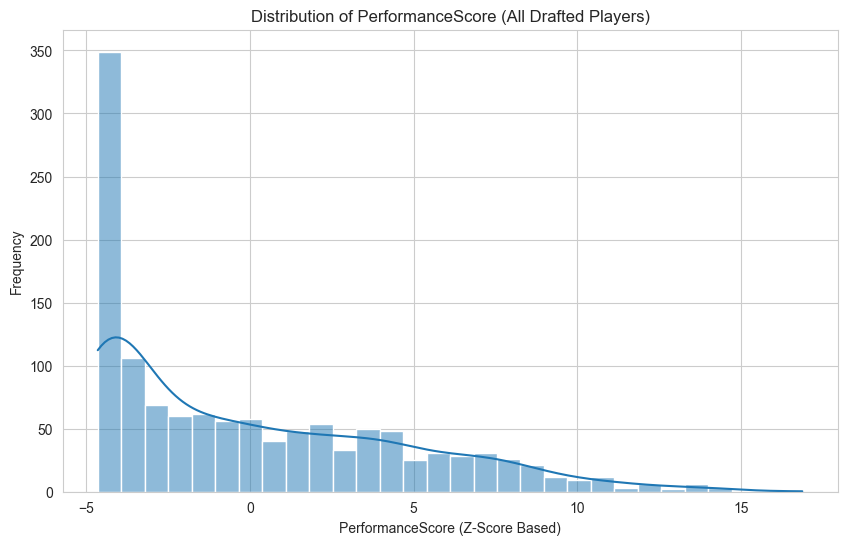

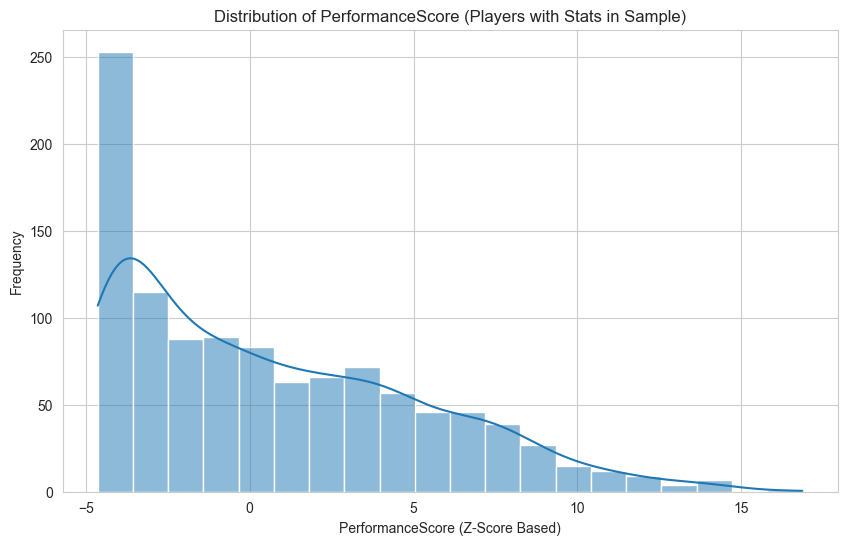

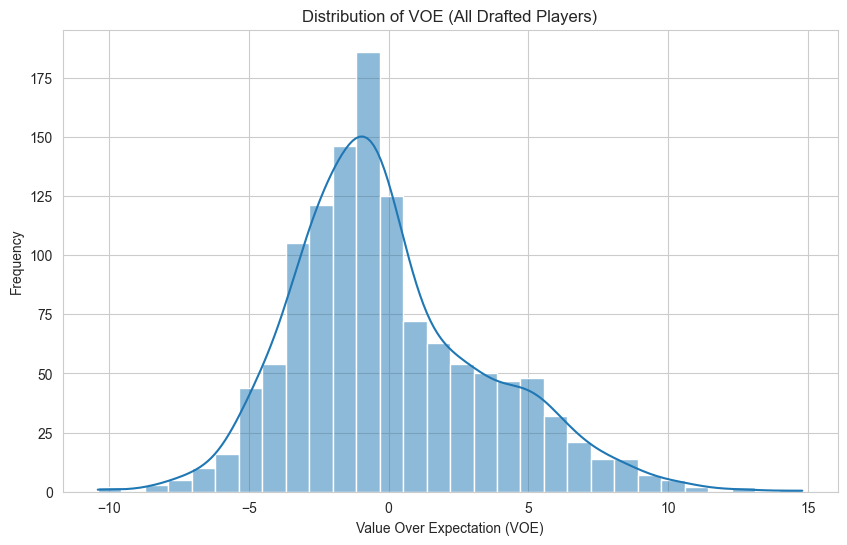

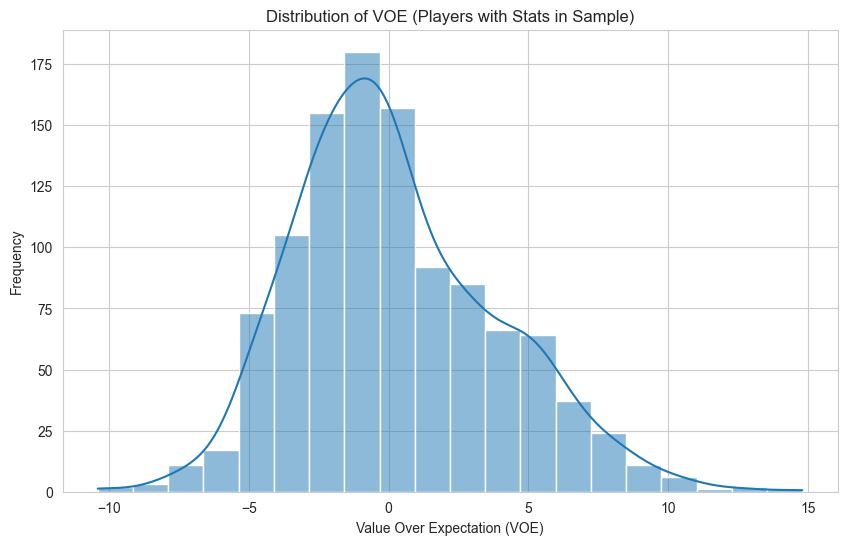

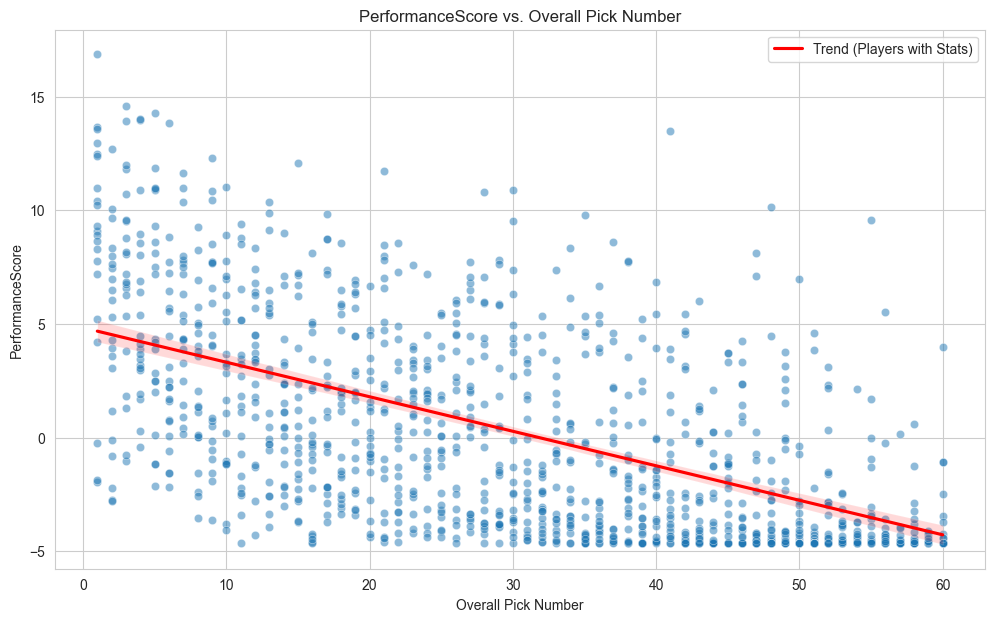

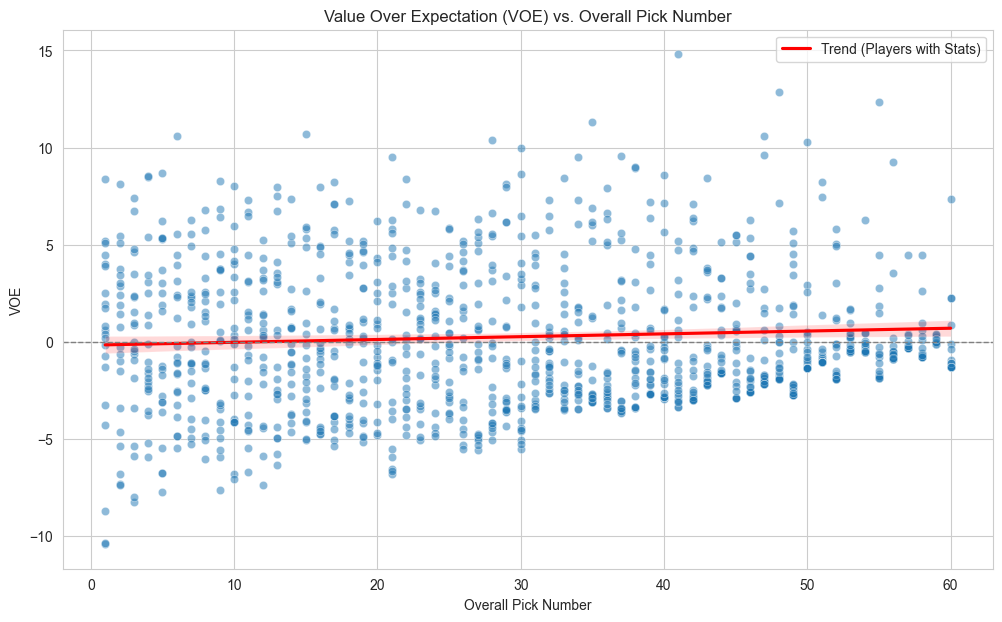

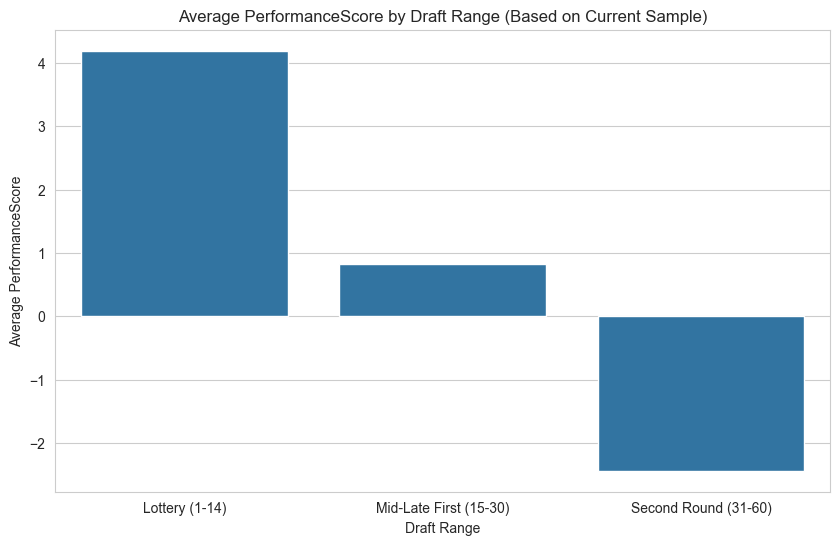

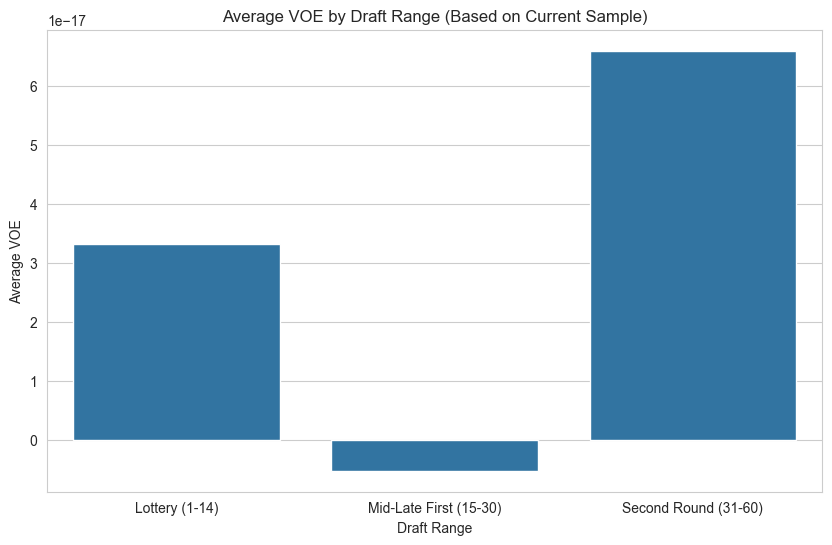

In [17]:
# Cell 17: Initial EDA on PerformanceScore and VOE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 15)
# Or load from SQLite if starting a new session:
# try:
#     player_summary_for_analysis_df
# except NameError:
#     print("player_summary_for_analysis_df not found in memory, loading from SQLite...")
#     db_file_name = "nba_draft_analysis.sqlite"
#     conn = sqlite3.connect(db_file_name)
#     player_summary_for_analysis_df = pd.read_sql_query("SELECT * FROM player_summary", conn)
#     conn.close()
#     print("Loaded from SQLite.")


if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Initial Exploratory Data Analysis (EDA) on PerformanceScore and VOE ---")
    
    df_to_analyze = player_summary_for_analysis_df.copy()

    # Set a style for plots
    sns.set_style("whitegrid")

    # 1. Distribution of PerformanceScore
    plt.figure(figsize=(10, 6))
    sns.histplot(df_to_analyze['PerformanceScore'], kde=True, bins=30)
    plt.title('Distribution of PerformanceScore (All Drafted Players)')
    plt.xlabel('PerformanceScore (Z-Score Based)')
    plt.ylabel('Frequency')
    plt.show()

    # For players who actually played (NUM_SEASONS_PLAYED_IN_DATA > 0)
    # The 'NUM_SEASONS_PLAYED_IN_DATA' column in your df_to_analyze is float due to fillna(0).
    # Let's make sure to filter correctly based on it.
    df_played = df_to_analyze[df_to_analyze['NUM_SEASONS_PLAYED_IN_DATA'] > 0]
    if not df_played.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_played['PerformanceScore'], kde=True, bins=20)
        plt.title('Distribution of PerformanceScore (Players with Stats in Sample)')
        plt.xlabel('PerformanceScore (Z-Score Based)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No players with actual stats (NUM_SEASONS_PLAYED_IN_DATA > 0) found for PerformanceScore distribution.")

    # 2. Distribution of VOE (Value Over Expectation)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_to_analyze['VOE'], kde=True, bins=30)
    plt.title('Distribution of VOE (All Drafted Players)')
    plt.xlabel('Value Over Expectation (VOE)')
    plt.ylabel('Frequency')
    plt.show()

    if not df_played.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_played['VOE'], kde=True, bins=20)
        plt.title('Distribution of VOE (Players with Stats in Sample)')
        plt.xlabel('Value Over Expectation (VOE)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No players with actual stats found for VOE distribution.")


    # 3. PerformanceScore vs. OVERALL_PICK
    plt.figure(figsize=(12, 7))
    # Scatter plot for all players. Players with 0 stats will cluster at the bottom.
    sns.scatterplot(data=df_to_analyze, x='OVERALL_PICK', y='PerformanceScore', alpha=0.5)
    # Add a regression line to see the trend better (for players with stats)
    if not df_played.empty:
        sns.regplot(data=df_played, x='OVERALL_PICK', y='PerformanceScore', scatter=False, color='red', label='Trend (Players with Stats)')
    plt.title('PerformanceScore vs. Overall Pick Number')
    plt.xlabel('Overall Pick Number')
    plt.ylabel('PerformanceScore')
    plt.legend()
    plt.show()

    # 4. VOE vs. OVERALL_PICK
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df_to_analyze, x='OVERALL_PICK', y='VOE', alpha=0.5)
    if not df_played.empty:
        sns.regplot(data=df_played, x='OVERALL_PICK', y='VOE', scatter=False, color='red', label='Trend (Players with Stats)')
    plt.title('Value Over Expectation (VOE) vs. Overall Pick Number')
    plt.xlabel('Overall Pick Number')
    plt.ylabel('VOE')
    plt.axhline(0, color='grey', linestyle='--', lw=1) # Line at VOE = 0
    plt.legend()
    plt.show()

    # 5. Average PerformanceScore by Draft Pick Range (e.g., Lottery, Mid-First, Late-First)
    # (Second round picks are not included in this example, as salary scale mainly for first round)
    bins = [0, 14, 30, 61] # Lottery (1-14), Mid-Late First (15-30), Second Round (31-60, though we only have up to 60 picks in OVERALL_PICK)
    labels = ['Lottery (1-14)', 'Mid-Late First (15-30)', 'Second Round (31-60)']
    
    # Create a temporary column for draft range in the full df_to_analyze
    # This ensures even players with 0 performance are categorized
    df_to_analyze_with_ranges = df_to_analyze.copy()
    df_to_analyze_with_ranges['DRAFT_RANGE'] = pd.cut(df_to_analyze_with_ranges['OVERALL_PICK'], bins=bins, labels=labels, right=True)
    
    avg_perf_by_range = df_to_analyze_with_ranges.groupby('DRAFT_RANGE', observed=False)['PerformanceScore'].mean().reset_index()
    avg_voe_by_range = df_to_analyze_with_ranges.groupby('DRAFT_RANGE', observed=False)['VOE'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_perf_by_range, x='DRAFT_RANGE', y='PerformanceScore')
    plt.title('Average PerformanceScore by Draft Range (Based on Current Sample)')
    plt.ylabel('Average PerformanceScore')
    plt.xlabel('Draft Range')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_voe_by_range, x='DRAFT_RANGE', y='VOE')
    plt.title('Average VOE by Draft Range (Based on Current Sample)')
    plt.ylabel('Average VOE')
    plt.xlabel('Draft Range')
    plt.show()

else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 15 was run successfully.")

--- Correlation Analysis and Outlier Identification ---


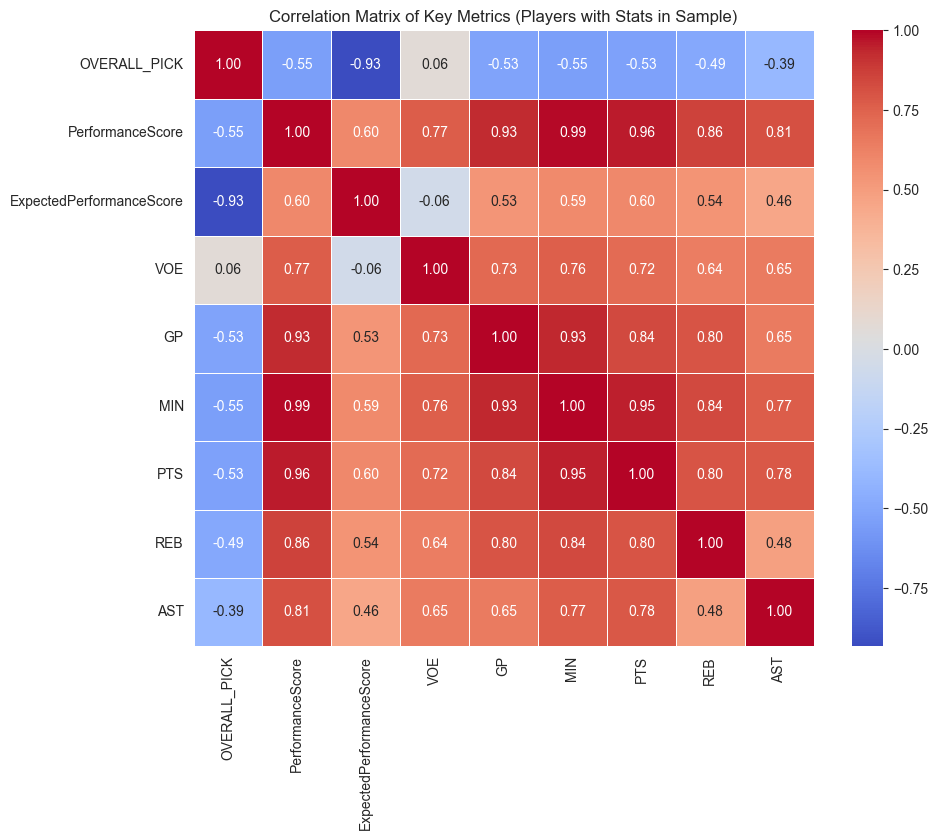


Key Observations from Correlation Matrix (example interpretations):
- Correlation between OVERALL_PICK and PerformanceScore: -0.55
  (A negative value is expected: lower pick number (e.g., 1st) should correlate with higher performance).
- Correlation between OVERALL_PICK and VOE: 0.06
  (Ideally, this should be low, meaning VOE is not strongly dependent on draft pick number itself).

--- Top 10 Potential 'Steals' by VOE (Players with Stats in Sample) ---


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ExpectedPerformanceScore,VOE,GP,PTS
869,Nikola Jokić,2014,41,13.494185,-1.312286,14.806472,381.0,6462.0
456,Marc Gasol,2007,48,10.146275,-2.712561,12.858836,377.0,5013.0
169,Luis Scola,2002,55,9.576171,-2.789733,12.365904,386.0,5597.0
743,Draymond Green,2012,35,9.783915,-1.534078,11.317992,397.0,3566.0
783,Giannis Antetokounmpo,2013,15,12.084518,1.361943,10.722576,393.0,6751.0
395,Paul Millsap,2006,47,8.110574,-2.485888,10.596462,398.0,4517.0
714,Damian Lillard,2012,6,13.859715,3.284609,10.575107,396.0,8880.0
85,Tony Parker,2001,28,10.793780,0.426086,10.367693,394.0,5914.0
338,Ryan Gomes,2005,50,6.965446,-3.311162,10.276608,374.0,4299.0
87,Gilbert Arenas,2001,30,10.874718,0.880531,9.994187,344.0,7470.0



--- Bottom 10 Potential 'Busts' by VOE (Players with Stats in Sample, higher pick expected more) ---


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ExpectedPerformanceScore,VOE,GP,PTS
409,Greg Oden,2007,1,-1.930200,8.481838,-10.412039,105.0,840.0
769,Anthony Bennett,2013,1,-1.884239,8.481838,-10.366077,151.0,658.0
1009,Markelle Fultz,2017,1,-0.227800,8.481838,-8.709638,131.0,1423.0
351,Adam Morrison,2006,3,-1.031307,7.207032,-8.238339,161.0,1200.0
891,Jahlil Okafor,2015,3,-0.780523,7.207032,-7.987555,131.0,1694.0
119,Nikoloz Tskitishvili,2002,5,-2.134601,5.607019,-7.741620,155.0,471.0
357,Patrick O'Bryant,2006,9,-3.629967,3.986208,-7.616175,79.0,167.0
530,Hasheem Thabeet,2009,2,-2.805216,4.571504,-7.376720,120.0,267.0
300,Yaroslav Korolev,2005,12,-4.272428,3.095875,-7.368303,34.0,39.0
173,Darko Milicic,2003,2,-2.754395,4.571504,-7.325898,126.0,381.0



--- Reminder ---
To calculate ROI (Return on Investment = PerformanceScore / Rookie_Salary),
you will need to collect the 'Rookie Salary Scale Data' (Step 1c of your project plan).
Please focus on researching and compiling that data into a CSV file with columns like:
  'DRAFT_YEAR', 'OVERALL_PICK', 'ROOKIE_SALARY_YEAR_1'


In [18]:
# Cell 18: Correlation Analysis and Outlier Identification

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 15)
if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Correlation Analysis and Outlier Identification ---")
    
    df_to_analyze = player_summary_for_analysis_df.copy()

    # 1. Correlation Analysis
    # Select key numeric columns for correlation
    # We'll focus on players who actually played for meaningful correlations with performance stats
    df_played = df_to_analyze[df_to_analyze['NUM_SEASONS_PLAYED_IN_DATA'] > 0]
    
    if not df_played.empty:
        correlation_cols = [
            'OVERALL_PICK', 
            'PerformanceScore', 
            'ExpectedPerformanceScore', 
            'VOE',
            'GP', # Total Games Played (sum over N seasons)
            'MIN',# Total Minutes
            'PTS',# Total Points
            'REB',# Total Rebounds
            'AST' # Total Assists
        ]
        # Ensure all selected columns exist in df_played
        valid_correlation_cols = [col for col in correlation_cols if col in df_played.columns]
        
        correlation_matrix = df_played[valid_correlation_cols].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Key Metrics (Players with Stats in Sample)')
        plt.show()

        print("\nKey Observations from Correlation Matrix (example interpretations):")
        if 'OVERALL_PICK' in correlation_matrix and 'PerformanceScore' in correlation_matrix:
            op_ps_corr = correlation_matrix.loc['OVERALL_PICK', 'PerformanceScore']
            print(f"- Correlation between OVERALL_PICK and PerformanceScore: {op_ps_corr:.2f}")
            print("  (A negative value is expected: lower pick number (e.g., 1st) should correlate with higher performance).")
        if 'OVERALL_PICK' in correlation_matrix and 'VOE' in correlation_matrix:
            op_voe_corr = correlation_matrix.loc['OVERALL_PICK', 'VOE']
            print(f"- Correlation between OVERALL_PICK and VOE: {op_voe_corr:.2f}")
            print("  (Ideally, this should be low, meaning VOE is not strongly dependent on draft pick number itself).")

    else:
        print("No players with actual stats (NUM_SEASONS_PLAYED_IN_DATA > 0) found for correlation analysis.")

    # 2. Outlier Identification (Steals and Busts based on VOE)
    # We will look at players with stats (NUM_SEASONS_PLAYED_IN_DATA > 0)
    # as VOE for non-playing players is primarily driven by their pick's expectation.
    
    if not df_played.empty:
        N_outliers = 10 # Number of top/bottom players to list

        print(f"\n--- Top {N_outliers} Potential 'Steals' by VOE (Players with Stats in Sample) ---")
        top_steals = df_played.sort_values(by='VOE', ascending=False).head(N_outliers)
        display(top_steals[['PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'PerformanceScore', 'ExpectedPerformanceScore', 'VOE', 'GP', 'PTS']])

        print(f"\n--- Bottom {N_outliers} Potential 'Busts' by VOE (Players with Stats in Sample, higher pick expected more) ---")
        # Filter for higher picks (e.g., first round) who underperformed
        # For a more general "bust" list from current sample, we can just sort all players with stats by VOE
        potential_busts = df_played.sort_values(by='VOE', ascending=True).head(N_outliers)
        display(potential_busts[['PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'PerformanceScore', 'ExpectedPerformanceScore', 'VOE', 'GP', 'PTS']])
    else:
        print("No players with actual stats found for outlier identification.")
        
    # Reminder for next steps for ROI
    print("\n--- Reminder ---")
    print("To calculate ROI (Return on Investment = PerformanceScore / Rookie_Salary),")
    print("you will need to collect the 'Rookie Salary Scale Data' (Step 1c of your project plan).")
    print("Please focus on researching and compiling that data into a CSV file with columns like:")
    print("  'DRAFT_YEAR', 'OVERALL_PICK', 'ROOKIE_SALARY_YEAR_1'")

else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 15 was run successfully.")

## 1.4. Player Rookie Salary Data
Loads the manually compiled CSV containing historical rookie salary scales.

In [19]:
# Cell 19: Load and Inspect Rookie Salary Data

import pandas as pd
import numpy as np # For NaN handling

# Define the filename
salary_csv_file = "rookie_salaries.csv" 

try:
    print(f"--- Loading Rookie Salary Data from: {salary_csv_file} ---")
    salaries_df = pd.read_csv(salary_csv_file)
    
    print(f"\nSuccessfully loaded {salary_csv_file}")
    print(f"Shape of salaries_df: {salaries_df.shape}")
    
    print("\n--- salaries_df Info ---")
    salaries_df.info()
    
    print("\n--- First 5 rows of salaries_df ---")
    display(salaries_df.head())
    
    print("\n--- Last 5 rows of salaries_df ---")
    display(salaries_df.tail())
    
    # Check for missing values specifically in ROOKIE_SALARY_YEAR_1
    print("\n--- Missing Value Check for ROOKIE_SALARY_YEAR_1 ---")
    missing_salaries = salaries_df['ROOKIE_SALARY_YEAR_1'].isna().sum()
    print(f"Number of missing values in 'ROOKIE_SALARY_YEAR_1': {missing_salaries}")
    if missing_salaries > 0:
        print("Rows with missing 'ROOKIE_SALARY_YEAR_1':")
        display(salaries_df[salaries_df['ROOKIE_SALARY_YEAR_1'].isna()])

    # Ensure ROOKIE_SALARY_YEAR_1 is numeric.
    # If it's an object type due to blanks or non-numeric characters, convert it.
    if salaries_df['ROOKIE_SALARY_YEAR_1'].dtype == 'object':
        print("\n'ROOKIE_SALARY_YEAR_1' is an object type. Attempting conversion to numeric...")
        salaries_df['ROOKIE_SALARY_YEAR_1'] = pd.to_numeric(salaries_df['ROOKIE_SALARY_YEAR_1'], errors='coerce')
        print("Conversion attempted. New Dtype:", salaries_df['ROOKIE_SALARY_YEAR_1'].dtype)
        new_missing_salaries = salaries_df['ROOKIE_SALARY_YEAR_1'].isna().sum()
        print(f"Number of missing values after coercion: {new_missing_salaries}")
        if new_missing_salaries > missing_salaries:
            print("Additional NaNs were introduced during conversion due to non-numeric values.")

    if pd.api.types.is_numeric_dtype(salaries_df['ROOKIE_SALARY_YEAR_1']):
        print("\n--- Descriptive Statistics for ROOKIE_SALARY_YEAR_1 ---")
        display(salaries_df['ROOKIE_SALARY_YEAR_1'].describe())
    else:
        print("\n'ROOKIE_SALARY_YEAR_1' is not numeric even after attempted coercion. Please check the CSV for non-numeric entries.")

    print("\n--- Data types of columns after potential cleaning: ---")
    salaries_df.info()

except FileNotFoundError:
    print(f"ERROR: File not found: '{salary_csv_file}'. Please ensure it's in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Loading Rookie Salary Data from: rookie_salaries.csv ---

Successfully loaded rookie_salaries.csv
Shape of salaries_df: (630, 3)

--- salaries_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DRAFT_YEAR            630 non-null    int64  
 1   OVERALL_PICK          630 non-null    int64  
 2   ROOKIE_SALARY_YEAR_1  624 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 14.9 KB

--- First 5 rows of salaries_df ---


,DRAFT_YEAR,OVERALL_PICK,ROOKIE_SALARY_YEAR_1
0,2000,1,2813300.0
1,2000,2,2517100.0
2,2000,3,2260400.0
3,2000,4,2037900.0
4,2000,5,1845500.0



--- Last 5 rows of salaries_df ---


,DRAFT_YEAR,OVERALL_PICK,ROOKIE_SALARY_YEAR_1
625,2020,26,1696500.0
626,2020,27,1647500.0
627,2020,28,1637300.0
628,2020,29,1625500.0
629,2020,30,1613700.0



--- Missing Value Check for ROOKIE_SALARY_YEAR_1 ---
Number of missing values in 'ROOKIE_SALARY_YEAR_1': 6
Rows with missing 'ROOKIE_SALARY_YEAR_1':


,DRAFT_YEAR,OVERALL_PICK,ROOKIE_SALARY_YEAR_1
29,2000,30,NaN
59,2001,30,NaN
89,2002,30,NaN
119,2003,30,NaN
149,2004,30,NaN
179,2005,30,NaN



--- Descriptive Statistics for ROOKIE_SALARY_YEAR_1 ---


count    6.240000e+02
mean     1.754508e+06
std      1.101741e+06
min      5.624000e+05
25%      9.636000e+05
50%      1.398600e+06
75%      2.178925e+06
max      8.131200e+06
Name: ROOKIE_SALARY_YEAR_1, dtype: float64


--- Data types of columns after potential cleaning: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DRAFT_YEAR            630 non-null    int64  
 1   OVERALL_PICK          630 non-null    int64  
 2   ROOKIE_SALARY_YEAR_1  624 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 14.9 KB


In [20]:
# Cell 20: Merge Salary Data and Calculate ROI

import pandas as pd
import numpy as np # For np.nan

# Ensure player_summary_for_analysis_df (from Cell 15) and salaries_df (from Cell 19) are loaded
if 'player_summary_for_analysis_df' in locals() and \
   'salaries_df' in locals() and \
   not player_summary_for_analysis_df.empty and \
   not salaries_df.empty:

    print("--- Merging Salary Data and Calculating ROI ---")
    
    # Make a copy to work with
    df_for_roi = player_summary_for_analysis_df.copy()
    
    print(f"Shape of df_for_roi (before salary merge): {df_for_roi.shape}")
    print(f"Shape of salaries_df: {salaries_df.shape}")

    # 1. Merge salary data with the player summary data
    # We merge on DRAFT_YEAR and OVERALL_PICK
    # We use a left merge to keep all players from df_for_roi
    df_with_salaries = pd.merge(
        df_for_roi,
        salaries_df,
        on=['DRAFT_YEAR', 'OVERALL_PICK'],
        how='left' 
    )
    
    print(f"\nShape of df_with_salaries (after salary merge): {df_with_salaries.shape}")
    # Check how many players got a salary matched
    matched_salaries_count = df_with_salaries['ROOKIE_SALARY_YEAR_1'].notna().sum()
    print(f"Number of players with matched rookie salary data: {matched_salaries_count}")
    # Expected: 624 (from salaries_df) if all are unique and present in df_for_roi's first round picks.
    # Actual number might be slightly less if some DRAFT_YEAR/OVERALL_PICK combos from salaries_df weren't in df_for_roi (unlikely).

    # 2. Calculate ROI (Return on Investment)
    # ROI = PerformanceScore / ROOKIE_SALARY_YEAR_1
    # Handle cases where ROOKIE_SALARY_YEAR_1 might be 0 or NaN (though min was >0, NaN is possible)
    # PerformanceScore can be negative. Salary is positive. ROI can be negative.
    df_with_salaries['ROI'] = np.where(
        (df_with_salaries['ROOKIE_SALARY_YEAR_1'].notna()) & (df_with_salaries['ROOKIE_SALARY_YEAR_1'] > 0),
        df_with_salaries['PerformanceScore'] / df_with_salaries['ROOKIE_SALARY_YEAR_1'],
        np.nan # ROI is NaN if no salary or salary is zero
    )
    
    # For easier interpretation, ROI is often scaled (e.g., per million dollars of salary)
    # but raw ratio is fine to start. Let's also create a scaled version.
    # Assuming PerformanceScore is unitless (sum of z-scores).
    # ROI_scaled could be "PerformanceScore points per $1M of salary"
    df_with_salaries['ROI_scaled'] = df_with_salaries['ROI'] * 1_000_000


    print("\n--- DataFrame with ROI Calculated ---")
    print("Info for df_with_salaries:")
    df_with_salaries.info()
    
    print("\nDescriptive statistics for ROI and ROI_scaled (for those with salary):")
    display(df_with_salaries[['ROI', 'ROI_scaled']].describe())

    # Show top players by ROI (who are first-round picks and have salary data)
    print("\nTop 15 Players by Scaled ROI (First-Round Picks with Salary Data from Sample):")
    # Filter for those where ROI is calculated (i.e., had salary)
    # and also played (NUM_SEASONS_PLAYED_IN_DATA > 0 for meaningful ROI)
    top_roi_players = df_with_salaries[
        (df_with_salaries['ROI'].notna()) & 
        (df_with_salaries['NUM_SEASONS_PLAYED_IN_DATA'] > 0)
    ].sort_values(by='ROI_scaled', ascending=False)
    
    cols_to_show_roi = ['PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 
                        'PerformanceScore', 'ROOKIE_SALARY_YEAR_1', 'VOE', 'ROI_scaled']
    display(top_roi_players[cols_to_show_roi].head(15))

    print("\nBottom 5 Players by Scaled ROI (First-Round Picks with Salary Data from Sample who played):")
    bottom_roi_players = df_with_salaries[
        (df_with_salaries['ROI'].notna()) & 
        (df_with_salaries['NUM_SEASONS_PLAYED_IN_DATA'] > 0)
    ].sort_values(by='ROI_scaled', ascending=True)
    display(bottom_roi_players[cols_to_show_roi].head(5))
    
    # Assign back to our main summary DataFrame
    player_summary_for_analysis_df = df_with_salaries.copy()
    print("\n'ROOKIE_SALARY_YEAR_1', 'ROI', and 'ROI_scaled' columns added to 'player_summary_for_analysis_df'.")

else:
    print("ERROR: 'player_summary_for_analysis_df' or 'salaries_df' not found or empty. Please run previous cells.")

--- Merging Salary Data and Calculating ROI ---
Shape of df_for_roi (before salary merge): (1249, 37)
Shape of salaries_df: (630, 3)

Shape of df_with_salaries (after salary merge): (1249, 38)
Number of players with matched rookie salary data: 624

--- DataFrame with ROI Calculated ---
Info for df_with_salaries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERSON_ID                   1249 non-null   int64  
 1   PLAYER_NAME                 1249 non-null   object 
 2   DRAFT_YEAR                  1249 non-null   int64  
 3   OVERALL_PICK                1249 non-null   int64  
 4   ROUND_NUMBER                1249 non-null   int64  
 5   ROUND_PICK                  1249 non-null   int64  
 6   GP                          1249 non-null   float64
 7   GS                          1249 non-null   float64
 8   MIN 

,ROI,ROI_scaled
count,6.240000e+02,624.000000
mean,1.210613e-06,1.210613
std,3.371044e-06,3.371044
min,-7.542250e-06,-7.542250
25%,-7.862527e-07,-0.786253
50%,1.084532e-06,1.084532
75%,3.085506e-06,3.085506
max,1.818665e-05,18.186655



Top 15 Players by Scaled ROI (First-Round Picks with Salary Data from Sample):


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ROOKIE_SALARY_YEAR_1,VOE,ROI_scaled
85,Tony Parker,2001,28,10.793780,593500.0,10.367693,18.186655
369,Rajon Rondo,2006,21,11.736856,918900.0,9.541952,12.772724
200,Josh Howard,2003,29,7.802179,642700.0,8.117025,12.139691
84,Jamaal Tinsley,2001,27,6.493314,597200.0,5.075459,10.872930
137,Tayshaun Prince,2002,23,7.602761,721500.0,6.768590,10.537438
310,Jarrett Jack,2005,22,8.576638,849500.0,8.391575,10.096102
86,Trenton Hassell,2001,29,5.867788,589200.0,6.182634,9.958907
20,Morris Peterson,2000,21,7.012411,714800.0,4.817507,9.810312
192,Boris Diaw,2003,21,7.997794,816900.0,5.802891,9.790420
246,Josh Smith,2004,17,9.843262,1017700.0,8.210957,9.672066



Bottom 5 Players by Scaled ROI (First-Round Picks with Salary Data from Sample who played):


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ROOKIE_SALARY_YEAR_1,VOE,ROI_scaled
27,Erick Barkley,2000,28,-4.219728,566500.0,-4.645814,-7.448769
197,Ndudi Ebi,2003,26,-4.423295,670800.0,-5.300008,-6.594059
25,Mamadou N'diaye,2000,26,-3.615725,587000.0,-4.492438,-6.159668
78,Joseph Forte,2001,21,-4.348484,748800.0,-6.543388,-5.807270
141,Chris Jefferies,2002,27,-3.547087,624300.0,-4.964941,-5.681702



'ROOKIE_SALARY_YEAR_1', 'ROI', and 'ROI_scaled' columns added to 'player_summary_for_analysis_df'.


--- Exploratory Data Analysis (EDA) on Return on Investment (ROI) ---


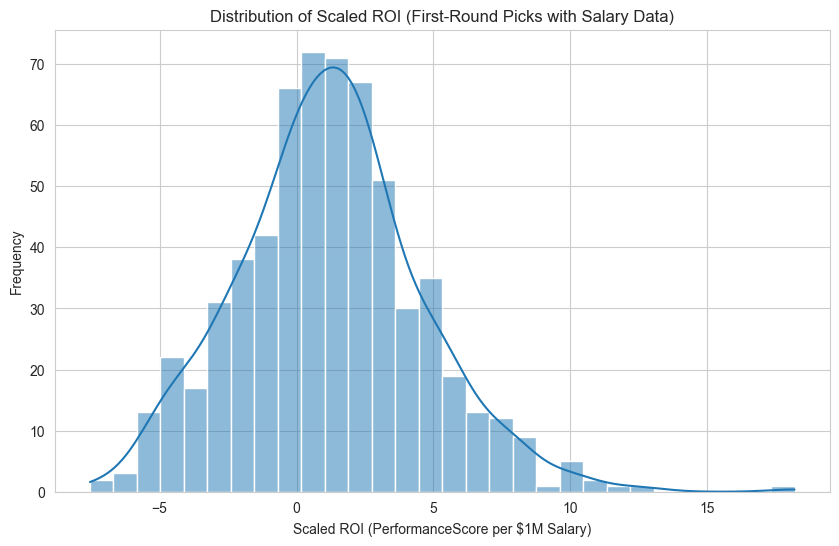

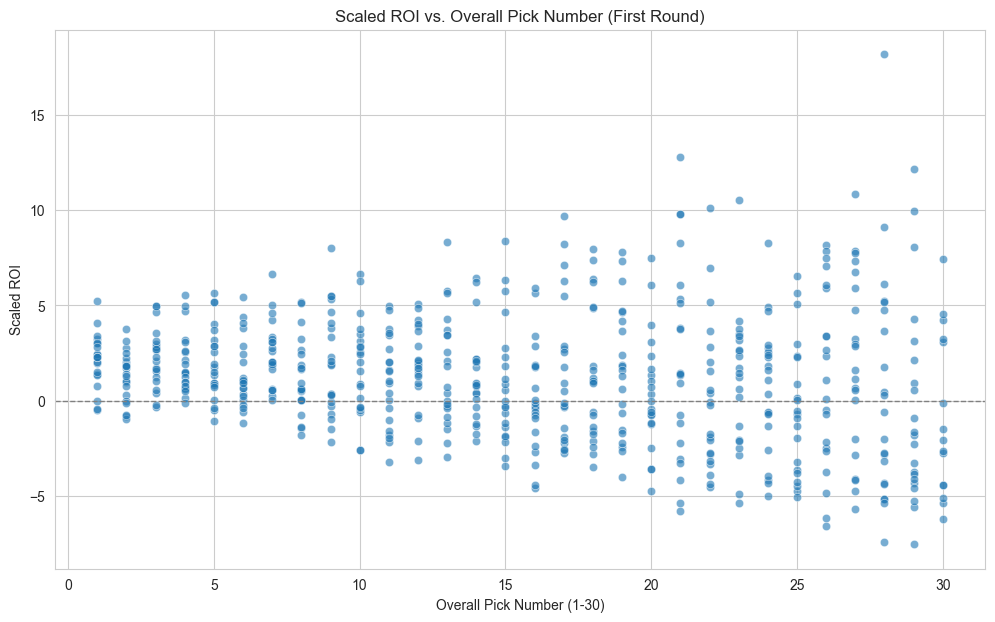

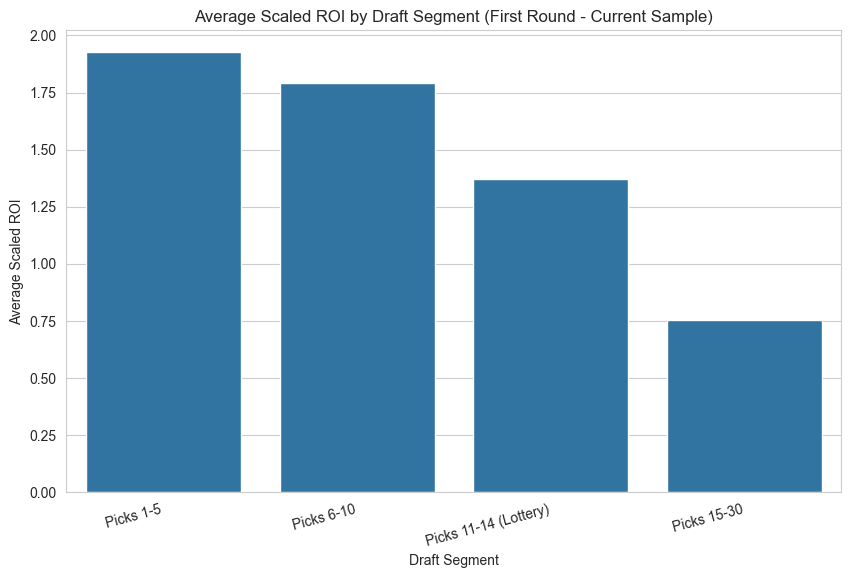


Average Scaled ROI by Draft Segment:


,DRAFT_SEGMENT_ROI,ROI_scaled
0,Picks 1-5,1.926139
1,Picks 6-10,1.793475
2,Picks 11-14 (Lottery),1.372824
3,Picks 15-30,0.756200


In [21]:
# Cell 21: Exploratory Data Analysis (EDA) on ROI

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 20)
if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Exploratory Data Analysis (EDA) on Return on Investment (ROI) ---")
    
    # Work with a copy, and filter for players with valid ROI values (first-rounders with salaries)
    df_for_roi_eda = player_summary_for_analysis_df[player_summary_for_analysis_df['ROI_scaled'].notna()].copy()

    if not df_for_roi_eda.empty:
        # Set a style for plots
        sns.set_style("whitegrid")

        # 1. Distribution of ROI_scaled
        plt.figure(figsize=(10, 6))
        sns.histplot(df_for_roi_eda['ROI_scaled'], kde=True, bins=30)
        plt.title('Distribution of Scaled ROI (First-Round Picks with Salary Data)')
        plt.xlabel('Scaled ROI (PerformanceScore per $1M Salary)')
        plt.ylabel('Frequency')
        plt.show()

        # 2. ROI_scaled vs. OVERALL_PICK
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df_for_roi_eda, x='OVERALL_PICK', y='ROI_scaled', alpha=0.6)
        # Optionally, add a regression line to see the trend
        # sns.regplot(data=df_for_roi_eda, x='OVERALL_PICK', y='ROI_scaled', scatter=False, color='red', order=2) # order=2 for a potential curve
        plt.title('Scaled ROI vs. Overall Pick Number (First Round)')
        plt.xlabel('Overall Pick Number (1-30)')
        plt.ylabel('Scaled ROI')
        plt.axhline(0, color='grey', linestyle='--', lw=1) # Line at ROI = 0
        plt.show()

        # 3. Average Scaled ROI by Draft Pick Segment (e.g., Top 5, 6-10, 11-14 (Lottery), 15-30)
        # Define bins and labels for first-round pick segments
        # Max OVERALL_PICK in df_for_roi_eda should be around 30
        bins = [0, 5, 10, 14, 30] 
        labels = ['Picks 1-5', 'Picks 6-10', 'Picks 11-14 (Lottery)', 'Picks 15-30']
        
        df_for_roi_eda['DRAFT_SEGMENT_ROI'] = pd.cut(df_for_roi_eda['OVERALL_PICK'], bins=bins, labels=labels, right=True)
        
        avg_roi_by_segment = df_for_roi_eda.groupby('DRAFT_SEGMENT_ROI', observed=False)['ROI_scaled'].mean().reset_index()
        # Order the segments for plotting
        avg_roi_by_segment['DRAFT_SEGMENT_ROI'] = pd.Categorical(avg_roi_by_segment['DRAFT_SEGMENT_ROI'], categories=labels, ordered=True)
        avg_roi_by_segment.sort_values('DRAFT_SEGMENT_ROI', inplace=True)


        plt.figure(figsize=(10, 6))
        sns.barplot(data=avg_roi_by_segment, x='DRAFT_SEGMENT_ROI', y='ROI_scaled')
        plt.title('Average Scaled ROI by Draft Segment (First Round - Current Sample)')
        plt.ylabel('Average Scaled ROI')
        plt.xlabel('Draft Segment')
        plt.xticks(rotation=15, ha='right')
        plt.show()
        
        print("\nAverage Scaled ROI by Draft Segment:")
        display(avg_roi_by_segment)

    else:
        print("No players with valid ROI data found for EDA. Ensure salary data was merged correctly.")
else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 20 was run successfully.")

In [22]:
# Cell 22: Identifying Top and Bottom ROI Picks

import pandas as pd

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 20)
if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Identifying Top and Bottom ROI Picks (Based on Current Sample) ---")
    
    # Create a working copy
    df_roi_analysis = player_summary_for_analysis_df.copy()

    # Filter for players with valid ROI_scaled values (first-rounders with salaries)
    # and who actually played at least one season (NUM_SEASONS_PLAYED_IN_DATA > 0)
    df_roi_candidates = df_roi_analysis[
        (df_roi_analysis['ROI_scaled'].notna()) & 
        (df_roi_analysis['NUM_SEASONS_PLAYED_IN_DATA'] > 0)
    ].copy()

    if not df_roi_candidates.empty:
        N_to_display = 15 # Number of top/bottom players to display

        # Relevant columns to show
        cols_to_display = ['PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 
                           'PerformanceScore', 'ROOKIE_SALARY_YEAR_1', 'VOE', 'ROI_scaled', 
                           'NUM_SEASONS_PLAYED_IN_DATA', 'GP', 'PTS']

        print(f"\n--- Top {N_to_display} Value Picks by Scaled ROI ---")
        top_roi_picks = df_roi_candidates.sort_values(by='ROI_scaled', ascending=False).head(N_to_display)
        display(top_roi_picks[cols_to_display])

        print(f"\n--- Bottom {N_to_display} Poor Value Picks by Scaled ROI (Higher Pick, Lower ROI) ---")
        # For "poor value", we are particularly interested in players who had substantial salaries (e.g. earlier picks)
        # but delivered low performance. Sorting by ROI ascending already captures this.
        bottom_roi_picks = df_roi_candidates.sort_values(by='ROI_scaled', ascending=True).head(N_to_display)
        display(bottom_roi_picks[cols_to_display])
        
        # You could also specifically look at lottery picks (e.g., OVERALL_PICK <= 14) with low ROI
        print(f"\n--- Bottom {N_to_display} Lottery Picks (1-14) by Scaled ROI ---")
        bottom_lottery_roi = df_roi_candidates[df_roi_candidates['OVERALL_PICK'] <= 14].sort_values(by='ROI_scaled', ascending=True).head(N_to_display)
        if not bottom_lottery_roi.empty:
            display(bottom_lottery_roi[cols_to_display])
        else:
            print("No lottery picks found in the current sample with valid ROI to display for 'bottom lottery ROI'.")

    else:
        print("No players with valid ROI data and recorded playing time found for this analysis.")
        
    print("\n--- Next Steps Reminder ---")
    print("1. Consider exploring Kaggle datasets to source PER and WS to create a more robust PerformanceScore.")
    print("2. Plan and execute the full data fetch for all players (approx. 744 with stats) ensuring API politeness.")
    print("3. Once you have the full dataset and potentially PER/WS, you will re-run the analysis for more definitive insights.")

else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 20 was run successfully.")

--- Identifying Top and Bottom ROI Picks (Based on Current Sample) ---

--- Top 15 Value Picks by Scaled ROI ---


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ROOKIE_SALARY_YEAR_1,VOE,ROI_scaled,NUM_SEASONS_PLAYED_IN_DATA,GP,PTS
85,Tony Parker,2001,28,10.793780,593500.0,10.367693,18.186655,5.0,394.0,5914.0
369,Rajon Rondo,2006,21,11.736856,918900.0,9.541952,12.772724,5.0,384.0,4099.0
200,Josh Howard,2003,29,7.802179,642700.0,8.117025,12.139691,5.0,348.0,5290.0
84,Jamaal Tinsley,2001,27,6.493314,597200.0,5.075459,10.872930,5.0,287.0,2755.0
137,Tayshaun Prince,2002,23,7.602761,721500.0,6.768590,10.537438,5.0,370.0,4511.0
310,Jarrett Jack,2005,22,8.576638,849500.0,8.391575,10.096102,5.0,404.0,4291.0
86,Trenton Hassell,2001,29,5.867788,589200.0,6.182634,9.958907,5.0,400.0,2680.0
20,Morris Peterson,2000,21,7.012411,714800.0,4.817507,9.810312,5.0,389.0,4490.0
192,Boris Diaw,2003,21,7.997794,816900.0,5.802891,9.790420,5.0,378.0,3170.0
246,Josh Smith,2004,17,9.843262,1017700.0,8.210957,9.672066,5.0,376.0,5262.0



--- Bottom 15 Poor Value Picks by Scaled ROI (Higher Pick, Lower ROI) ---


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ROOKIE_SALARY_YEAR_1,VOE,ROI_scaled,NUM_SEASONS_PLAYED_IN_DATA,GP,PTS
27,Erick Barkley,2000,28,-4.219728,566500.0,-4.645814,-7.448769,2.0,27.0,77.0
197,Ndudi Ebi,2003,26,-4.423295,670800.0,-5.300008,-6.594059,2.0,19.0,40.0
25,Mamadou N'diaye,2000,26,-3.615725,587000.0,-4.492438,-6.159668,4.0,55.0,242.0
78,Joseph Forte,2001,21,-4.348484,748800.0,-6.543388,-5.807270,2.0,25.0,30.0
141,Chris Jefferies,2002,27,-3.547087,624300.0,-4.964941,-5.681702,2.0,72.0,281.0
317,Wayne Simien,2005,29,-3.883544,696300.0,-3.568698,-5.577401,2.0,51.0,169.0
498,J.R. Giddens,2008,30,-4.154987,771000.0,-5.035518,-5.389088,2.0,38.0,73.0
250,Pavel Podkolzin,2004,21,-4.578294,850900.0,-6.773198,-5.380531,2.0,6.0,4.0
252,Sergei Monia,2004,23,-4.210444,784200.0,-5.044615,-5.369094,1.0,26.0,77.0
437,Alando Tucker,2007,29,-3.935834,749900.0,-3.620988,-5.248478,3.0,51.0,211.0



--- Bottom 15 Lottery Picks (1-14) by Scaled ROI ---


,PLAYER_NAME,DRAFT_YEAR,OVERALL_PICK,PerformanceScore,ROOKIE_SALARY_YEAR_1,VOE,ROI_scaled,NUM_SEASONS_PLAYED_IN_DATA,GP,PTS
300,Yaroslav Korolev,2005,12,-4.272428,1367800.0,-7.368303,-3.123576,2.0,34.0,39.0
127,Marcus Haislip,2002,13,-3.375422,1149500.0,-5.765675,-2.936426,4.0,89.0,311.0
239,Luke Jackson,2004,10,-3.815922,1457300.0,-6.782020,-2.618488,3.0,59.0,173.0
358,Mouhamed Sene,2006,10,-4.064680,1573900.0,-7.030778,-2.582553,3.0,47.0,103.0
961,Georgios Papagiannis,2016,13,-3.921344,1773200.0,-6.311597,-2.211451,2.0,39.0,160.0
357,Patrick O'Bryant,2006,9,-3.629967,1656800.0,-7.616175,-2.190951,3.0,79.0,167.0
10,Jerome Moiso,2000,11,-2.517775,1161900.0,-4.586638,-2.166946,5.0,133.0,372.0
13,Mateen Cleaves,2000,14,-2.107192,997100.0,-3.730781,-2.113320,5.0,140.0,536.0
241,Robert Swift,2004,12,-2.771351,1315200.0,-5.867226,-2.107171,4.0,97.0,416.0
599,Cole Aldrich,2010,11,-3.395003,1716700.0,-5.463866,-1.977633,3.0,89.0,175.0



--- Next Steps Reminder ---
1. Consider exploring Kaggle datasets to source PER and WS to create a more robust PerformanceScore.
2. Plan and execute the full data fetch for all players (approx. 744 with stats) ensuring API politeness.
3. Once you have the full dataset and potentially PER/WS, you will re-run the analysis for more definitive insights.


--- Deeper EDA on ROI and VOE by Draft Year and Pick Ranges ---


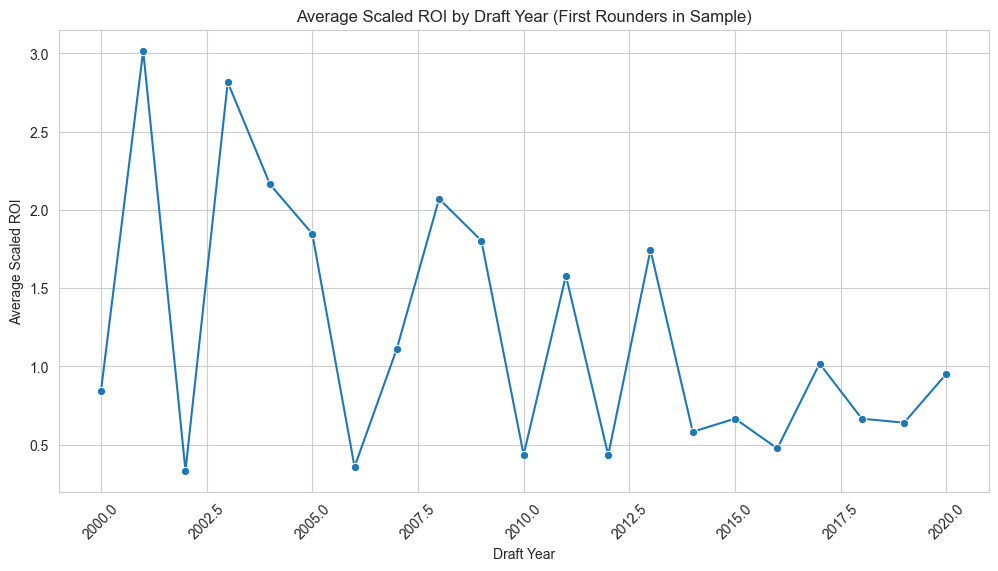


Average Scaled ROI by Draft Year (Sample):


,DRAFT_YEAR,ROI_scaled
0,2000,0.839193
1,2001,3.017938
2,2002,0.332869
3,2003,2.815949
4,2004,2.162833
5,2005,1.847481
6,2006,0.357402
7,2007,1.112323
8,2008,2.071118
9,2009,1.803418


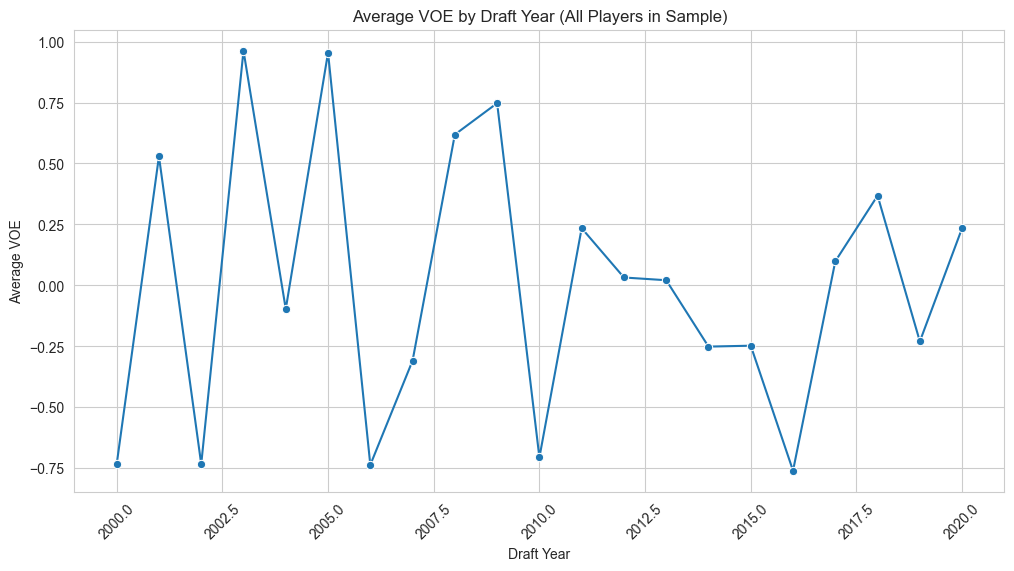


Average VOE by Draft Year (Sample):


,DRAFT_YEAR,VOE
0,2000,-0.734412
1,2001,0.529054
2,2002,-0.733439
3,2003,0.962821
4,2004,-0.097257
5,2005,0.954717
6,2006,-0.736743
7,2007,-0.308904
8,2008,0.618759
9,2009,0.747474


/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_35374/456614800.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi_present['PICK_BIN_GRANULAR'] = pd.cut(df_roi_present['OVERALL_PICK'], bins=bins_granular, labels=labels_granular, right=True)


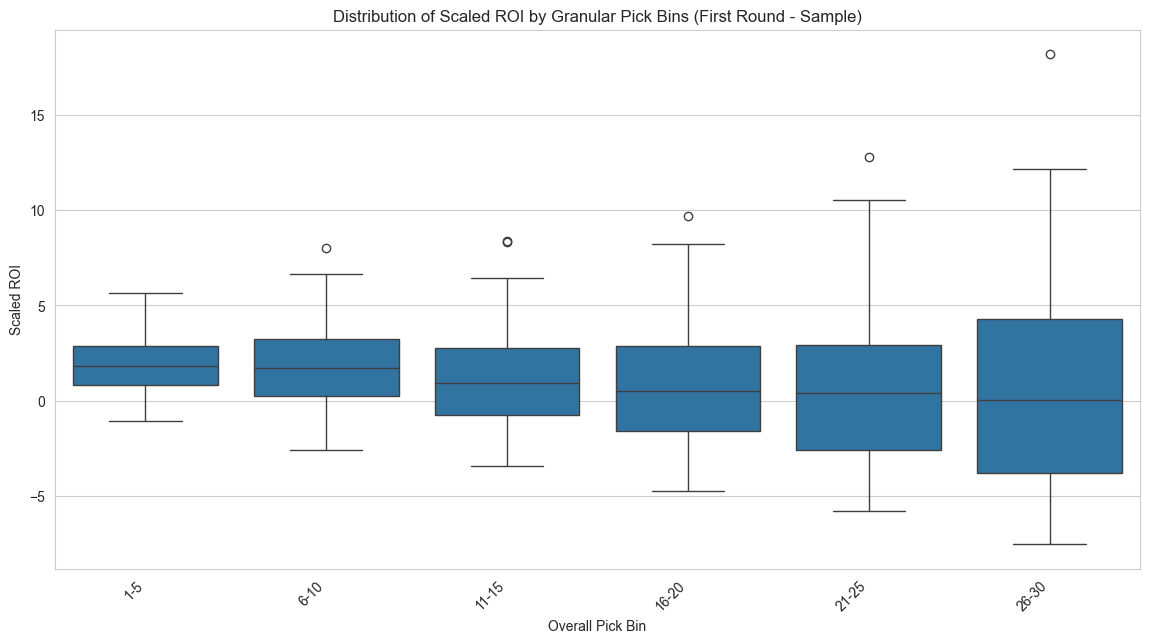


Median Scaled ROI by Granular Pick Bins (Sample):


,PICK_BIN_GRANULAR,ROI_scaled
0,1-5,1.811613
1,6-10,1.699762
2,11-15,0.938880
3,16-20,0.500827
4,21-25,0.376200
5,26-30,0.045627



Successfully saved a sample summary for Tableau: nba_draft_summary_for_tableau_sample.csv
It contains 1249 players with their summary stats and engineered features.


In [23]:
# Cell 23: Deeper EDA - ROI/VOE by Draft Year and Pick Ranges

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 20)
if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- Deeper EDA on ROI and VOE by Draft Year and Pick Ranges ---")
    
    df_eda = player_summary_for_analysis_df.copy()

    # Filter for players with calculated ROI (first-rounders with salary)
    df_roi_present = df_eda[df_eda['ROI_scaled'].notna()]

    # 1. Average ROI_scaled by DRAFT_YEAR
    if not df_roi_present.empty:
        avg_roi_by_year = df_roi_present.groupby('DRAFT_YEAR')['ROI_scaled'].mean().reset_index()
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=avg_roi_by_year, x='DRAFT_YEAR', y='ROI_scaled', marker='o')
        plt.title('Average Scaled ROI by Draft Year (First Rounders in Sample)')
        plt.xlabel('Draft Year')
        plt.ylabel('Average Scaled ROI')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        
        print("\nAverage Scaled ROI by Draft Year (Sample):")
        display(avg_roi_by_year)
    else:
        print("No players with ROI data to analyze by draft year.")

    # 2. Average VOE by DRAFT_YEAR (for all players with a PerformanceScore)
    # We can use all players for VOE as PerformanceScore is calculated for everyone (0 for non-players)
    # and ExpectedPerformanceScore is also for everyone.
    avg_voe_by_year = df_eda.groupby('DRAFT_YEAR')['VOE'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=avg_voe_by_year, x='DRAFT_YEAR', y='VOE', marker='o')
    plt.title('Average VOE by Draft Year (All Players in Sample)')
    plt.xlabel('Draft Year')
    plt.ylabel('Average VOE')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
    print("\nAverage VOE by Draft Year (Sample):")
    display(avg_voe_by_year)

    # 3. Boxplot of ROI_scaled for more granular pick ranges (e.g., every 5 picks for first round)
    if not df_roi_present.empty:
        # Create more granular pick bins for first round
        bins_granular = [0, 5, 10, 15, 20, 25, 30]
        labels_granular = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
        df_roi_present['PICK_BIN_GRANULAR'] = pd.cut(df_roi_present['OVERALL_PICK'], bins=bins_granular, labels=labels_granular, right=True)
        
        plt.figure(figsize=(14, 7))
        sns.boxplot(data=df_roi_present, x='PICK_BIN_GRANULAR', y='ROI_scaled', order=labels_granular)
        plt.title('Distribution of Scaled ROI by Granular Pick Bins (First Round - Sample)')
        plt.xlabel('Overall Pick Bin')
        plt.ylabel('Scaled ROI')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        print("\nMedian Scaled ROI by Granular Pick Bins (Sample):")
        display(df_roi_present.groupby('PICK_BIN_GRANULAR', observed=False)['ROI_scaled'].median().reset_index())
        
    # Prepare for saving the current development dataset for Tableau exploration
    # This DataFrame has one row per drafted player, ideal for an overview.
    output_csv_for_tableau = "nba_draft_summary_for_tableau_sample.csv"
    try:
        # Select relevant columns for Tableau (can be adjusted)
        cols_for_tableau = [
            'PERSON_ID', 'PLAYER_NAME', 'DRAFT_YEAR', 'OVERALL_PICK', 'ROUND_NUMBER', 'ROUND_PICK',
            'PerformanceScore', 'ExpectedPerformanceScore', 'VOE', 
            'ROOKIE_SALARY_YEAR_1', 'ROI', 'ROI_scaled',
            'NUM_SEASONS_PLAYED_IN_DATA', 'GP', 'MIN', 'PTS', 'REB', 'AST'
        ]
        # Ensure all selected columns actually exist in df_eda
        final_cols_for_tableau = [col for col in cols_for_tableau if col in df_eda.columns]
        
        df_eda[final_cols_for_tableau].to_csv(output_csv_for_tableau, index=False)
        print(f"\nSuccessfully saved a sample summary for Tableau: {output_csv_for_tableau}")
        print(f"It contains {len(df_eda)} players with their summary stats and engineered features.")
    except Exception as e:
        print(f"\nError saving summary for Tableau: {e}")


else:
    print("ERROR: 'player_summary_for_analysis_df' not found or is empty. Please ensure Cell 20 was run successfully.")

In [24]:
# Diagnostic Cell for PlayerDashboardByYearOverYear

from nba_api.stats.endpoints import PlayerDashboardByYearOverYear
import pandas as pd
from IPython.display import display

# Use a known player ID (e.g., LeBron James: 2544)
test_player_id = 2544
test_player_name = "LeBron James"

# Parameters based on help() output
# We want 'Advanced' stats, 'PerGame'
target_measure_type = 'Advanced'
target_per_mode = 'PerGame'
target_season_type = 'Regular Season'

print(f"Attempting to fetch PlayerDashboardByYearOverYear for {test_player_name} (ID: {test_player_id})...")
print(f"  MeasureType: {target_measure_type}, PerMode: {target_per_mode}, SeasonType: {target_season_type}")

df_player_yearly_stats = None # Initialize

try:
    dashboard = PlayerDashboardByYearOverYear(
        player_id=str(test_player_id),
        measure_type_detailed=target_measure_type,
        per_mode_detailed=target_per_mode,
        season_type_playoffs=target_season_type
        # We'll let 'season' use its default or implicit behavior for year-over-year
        # league_id_nullable defaults to '00' usually, so can be omitted unless issues.
    )
    
    # The expected data table is 'ByYearPlayerDashboard'
    # In nba_api, this often translates to an attribute like profile_info.by_year_player_dashboard
    # Or we access it through data_sets using the name if that's how this endpoint is structured.
    # Let's try direct attribute first, then data_sets list if that fails.

    data_frame_name_to_access = 'ByYearPlayerDashboard'
    snake_case_attribute_name = "by_year_player_dashboard" # Common conversion

    if hasattr(dashboard, snake_case_attribute_name):
        print(f"\nAccessing via attribute: {snake_case_attribute_name}")
        df_player_yearly_stats = getattr(dashboard, snake_case_attribute_name).get_data_frame()
    elif hasattr(dashboard, 'data_sets') and dashboard.data_sets:
        print(f"\nAccessing via data_sets list. Available tables from data_sets:")
        found_in_datasets = False
        for ds in dashboard.data_sets:
            # Assuming DataSet objects might not have a .name, we check expected_data if available
            # Or just try to find the one we expect by its known name from help()
            if hasattr(dashboard, 'expected_data') and data_frame_name_to_access in dashboard.expected_data:
                 if dashboard.expected_data[data_frame_name_to_access] == dashboard.data_sets.index(ds): # Check if index matches
                    df_player_yearly_stats = ds.get_data_frame()
                    found_in_datasets = True
                    print(f"  Found and used table '{data_frame_name_to_access}' from data_sets.")
                    break
            # If expected_data isn't structured with indices or name isn't there,
            # and if DataSet objects don't have .name, we might have to guess by index if only one table is expected.
            # The help() showed expected_data = {'ByYearPlayerDashboard': ...}, suggesting one main table.
        if not found_in_datasets and len(dashboard.data_sets) == 1: # If only one dataset, assume it's the one.
             print(f"  Only one table in data_sets. Assuming it's '{data_frame_name_to_access}'.")
             df_player_yearly_stats = dashboard.data_sets[0].get_data_frame()
        elif not found_in_datasets:
            print(f"  Could not definitively identify '{data_frame_name_to_access}' in data_sets. Will try get_data_frames()[0].")
            # Fallback to get_data_frames()[0] if other methods didn't work
            if dashboard.get_data_frames():
                 df_player_yearly_stats = dashboard.get_data_frames()[0]


    if df_player_yearly_stats is not None and not df_player_yearly_stats.empty:
        print(f"\nSuccessfully fetched data for {data_frame_name_to_access}!")
        print(f"Shape of the DataFrame: {df_player_yearly_stats.shape}")
        
        print("\nALL Columns available:")
        all_cols = list(df_player_yearly_stats.columns)
        for i, col_name in enumerate(all_cols):
            print(f"{i+1:02d}: {col_name}")

        print("\nFirst 5 rows of the data:")
        display(df_player_yearly_stats.head())

        # Now, let's specifically look for PER and WS and other advanced stats
        print("\n--- Searching for PER, WS, and other key advanced stats ---")
        
        found_stats = {}
        stats_to_search = {
            'PER': ['PER'], 
            'WS': ['WS', 'WIN_SHARES', 'E_WS'],
            'TS_PCT': ['TS_PCT', 'TS%'], # True Shooting %
            'USG_PCT': ['USG_PCT', 'USG%'], # Usage %
            'OFF_RATING': ['OFF_RATING', 'E_OFF_RATING'], # Offensive Rating
            'DEF_RATING': ['DEF_RATING', 'E_DEF_RATING'], # Defensive Rating
            'NET_RATING': ['NET_RATING', 'E_NET_RATING'], # Net Rating
            'PIE': ['PIE'] # Player Impact Estimate
        }

        for stat_key, possible_names in stats_to_search.items():
            for actual_col_name in df_player_yearly_stats.columns:
                if actual_col_name.upper() in [name.upper() for name in possible_names]:
                    found_stats[stat_key] = actual_col_name
                    print(f"  Found potential {stat_key} column: '{actual_col_name}'")
                    break 
            if stat_key not in found_stats:
                print(f"  {stat_key} column not found under common names.")
        
        print("\n--- Summary of Advanced Stats Found ---")
        if found_stats:
            for stat, col_name in found_stats.items():
                print(f"  {stat}: Found as '{col_name}'")
            # Display these columns for the first few seasons if found
            cols_to_show_adv = ['GROUP_VALUE'] + [name for name in found_stats.values() if name] # GROUP_VALUE is often the Season
            if 'SEASON_ID' in df_player_yearly_stats.columns: # If SEASON_ID exists, prefer it
                cols_to_show_adv = ['SEASON_ID'] + [name for name in found_stats.values() if name]
            
            # Ensure all columns in cols_to_show_adv actually exist in df_player_yearly_stats
            cols_to_show_adv = [col for col in cols_to_show_adv if col in df_player_yearly_stats.columns]

            if cols_to_show_adv: # if there's at least a season identifier and some found stats
                print("\nSample of advanced stats found (first 5 seasons shown):")
                display(df_player_yearly_stats[cols_to_show_adv].head())
        else:
            print("No key advanced stats (PER, WS, TS_PCT, USG_PCT, Ratings, PIE) found with common names.")

    elif df_player_yearly_stats is not None and df_player_yearly_stats.empty:
        print(f"Data was fetched for '{data_frame_name_to_access}', but the DataFrame is empty.")
    else: # df_player_yearly_stats is None
        print(f"Could not retrieve the '{data_frame_name_to_access}' DataFrame from PlayerDashboardByYearOverYear.")
        print("This might mean the direct attribute access failed and data_sets was also not processed as expected.")
        print("Consider printing dir(dashboard) to see all available attributes.")

except Exception as e:
    print(f"\nAn error occurred: {e}")

Attempting to fetch PlayerDashboardByYearOverYear for LeBron James (ID: 2544)...
  MeasureType: Advanced, PerMode: PerGame, SeasonType: Regular Season

Accessing via attribute: by_year_player_dashboard

Successfully fetched data for ByYearPlayerDashboard!
Shape of the DataFrame: (22, 77)

ALL Columns available:
01: GROUP_SET
02: GROUP_VALUE
03: TEAM_ID
04: TEAM_ABBREVIATION
05: MAX_GAME_DATE
06: GP
07: W
08: L
09: W_PCT
10: MIN
11: E_OFF_RATING
12: OFF_RATING
13: sp_work_OFF_RATING
14: E_DEF_RATING
15: DEF_RATING
16: sp_work_DEF_RATING
17: E_NET_RATING
18: NET_RATING
19: sp_work_NET_RATING
20: AST_PCT
21: AST_TO
22: AST_RATIO
23: OREB_PCT
24: DREB_PCT
25: REB_PCT
26: TM_TOV_PCT
27: E_TOV_PCT
28: EFG_PCT
29: TS_PCT
30: USG_PCT
31: E_USG_PCT
32: E_PACE
33: PACE
34: PACE_PER40
35: sp_work_PACE
36: PIE
37: POSS
38: FGM
39: FGA
40: FGM_PG
41: FGA_PG
42: FG_PCT
43: GP_RANK
44: W_RANK
45: L_RANK
46: W_PCT_RANK
47: MIN_RANK
48: E_OFF_RATING_RANK
49: OFF_RATING_RANK
50: sp_work_OFF_RATING_RANK


,GROUP_SET,GROUP_VALUE,TEAM_ID,TEAM_ABBREVIATION,MAX_GAME_DATE,GP,W,L,W_PCT,MIN,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
0,By Year,2024-25,1610612747,LAL,2025-04-11T00:00:00,70,44,26,0.629,34.9,...,17,7,6,6,20,14,16,20,19,10
1,By Year,2023-24,1610612747,LAL,2024-04-14T00:00:00,71,41,30,0.577,35.3,...,21,4,3,3,21,13,17,16,20,5
2,By Year,2022-23,1610612747,LAL,2023-04-09T00:00:00,55,30,25,0.545,35.5,...,5,2,2,2,18,20,19,3,2,14
3,By Year,2021-22,1610612747,LAL,2022-04-01T00:00:00,56,25,31,0.446,37.2,...,6,5,5,5,17,16,18,1,4,7
4,By Year,2020-21,1610612747,LAL,2021-05-16T00:00:00,45,30,15,0.667,33.4,...,8,6,7,7,10,22,22,19,17,9



--- Searching for PER, WS, and other key advanced stats ---
  PER column not found under common names.
  WS column not found under common names.
  Found potential TS_PCT column: 'TS_PCT'
  Found potential USG_PCT column: 'USG_PCT'
  Found potential OFF_RATING column: 'E_OFF_RATING'
  Found potential DEF_RATING column: 'E_DEF_RATING'
  Found potential NET_RATING column: 'E_NET_RATING'
  Found potential PIE column: 'PIE'

--- Summary of Advanced Stats Found ---
  TS_PCT: Found as 'TS_PCT'
  USG_PCT: Found as 'USG_PCT'
  OFF_RATING: Found as 'E_OFF_RATING'
  DEF_RATING: Found as 'E_DEF_RATING'
  NET_RATING: Found as 'E_NET_RATING'
  PIE: Found as 'PIE'

Sample of advanced stats found (first 5 seasons shown):


,GROUP_VALUE,TS_PCT,USG_PCT,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,PIE
0,2024-25,0.604,0.291,113.3,113.0,0.3,0.169
1,2023-24,0.630,0.285,116.1,112.3,3.8,0.169
2,2022-23,0.583,0.322,114.6,110.9,3.7,0.172
3,2021-22,0.619,0.317,110.1,112.0,-1.9,0.180
4,2020-21,0.602,0.310,111.8,102.6,9.1,0.191


In [25]:
# Cell to get help documentation for PlayerDashboardByYearOverYear
from nba_api.stats.endpoints import PlayerDashboardByYearOverYear

help(PlayerDashboardByYearOverYear)

Help on class PlayerDashboardByYearOverYear in module nba_api.stats.endpoints.playerdashboardbyyearoveryear:

class PlayerDashboardByYearOverYear(nba_api.stats.endpoints._base.Endpoint)
 |  PlayerDashboardByYearOverYear(player_id, last_n_games='0', measure_type_detailed='Base', month='0', opponent_team_id=0, pace_adjust='N', per_mode_detailed='Totals', period='0', plus_minus='N', rank='N', season='2024-25', season_type_playoffs='Regular Season', date_from_nullable='', date_to_nullable='', game_segment_nullable='', league_id_nullable='', location_nullable='', outcome_nullable='', po_round_nullable='', season_segment_nullable='', shot_clock_range_nullable='', vs_conference_nullable='', vs_division_nullable='', proxy=None, headers=None, timeout=30, get_request=True)
 |
 |  Method resolution order:
 |      PlayerDashboardByYearOverYear
 |      nba_api.stats.endpoints._base.Endpoint
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, player_id, last_n_games='0', measu

## 1.3. Player Performance Stats (Advanced - Sample)
This section fetches season-by-season *advanced* statistics for the sample of players using `PlayerDashboardByYearOverYear`.
It targets the first 5 seasons and extracts metrics like TS%, USG%, Net Ratings, PIE, etc.

In [28]:
# Cell 24: Fetch Advanced Stats (TS%, USG%, Ratings, PIE) using PlayerDashboardByYearOverYear

import pandas as pd
import time
from nba_api.stats.endpoints import PlayerDashboardByYearOverYear
from IPython.display import display # For Jupyter

# --- Configuration ---
# Use the list of PERSON_IDs from players who have traditional stats in our summary
if 'player_summary_for_analysis_df' not in locals() or player_summary_for_analysis_df.empty:
    print("ERROR: 'player_summary_for_analysis_df' is not available or empty. Please run up to Cell 15/20.")
    # This list should contain IDs of players for whom we want to fetch advanced stats
    # Typically, these are players for whom we already have traditional stats.
    players_to_fetch_ids = [] 
else:
    # Get IDs of players for whom traditional stats were successfully aggregated in Cell 13
    # (NUM_SEASONS_PLAYED_IN_DATA > 0 ensures they played)
    players_to_fetch_ids = player_summary_for_analysis_df[
        player_summary_for_analysis_df['NUM_SEASONS_PLAYED_IN_DATA'] > 0
    ]['PERSON_ID'].unique()

print(f"Found {len(players_to_fetch_ids)} unique players with existing traditional stats to fetch new advanced stats for.")

N_SEASONS_TO_KEEP = 5  # We want the first 5 seasons of these advanced stats
API_DELAY_ADV_FETCH = 10 # Seconds to wait between API calls (adjust as needed for API politeness)

# Define columns we want to extract from the 'ByYearPlayerDashboard' table from PlayerDashboardByYearOverYear
# GROUP_VALUE is the season string (e.g., '2003-04').
adv_cols_to_extract = [
    'GROUP_VALUE', # Typically the season string like '2000-01'
    'GP', 'MIN',   # Games Played and Minutes (often per game in 'PerGame' mode)
    'TS_PCT',      # True Shooting Percentage
    'USG_PCT',     # Usage Percentage
    'OFF_RATING', 'E_OFF_RATING', # Offensive Ratings
    'DEF_RATING', 'E_DEF_RATING', # Defensive Ratings
    'NET_RATING', 'E_NET_RATING', # Net Ratings
    'AST_PCT',     # Assist Percentage
    'OREB_PCT', 'DREB_PCT', 'REB_PCT', # Rebound Percentages
    'TM_TOV_PCT', 'E_TOV_PCT',      # Turnover Percentages (TM_TOV_PCT is often labeled as just TOV_PCT too)
    'EFG_PCT',     # Effective Field Goal Percentage
    'PACE', 'E_PACE',              # Pace
    'PIE'                          # Player Impact Estimate
]

all_players_advanced_stats_list = [] # To store DataFrames for each player's advanced stats
failed_advanced_fetches = []         # To log players for whom advanced stats fetch failed

if players_to_fetch_ids.size > 0: 
    print(f"\nStarting to fetch advanced stats using PlayerDashboardByYearOverYear for {len(players_to_fetch_ids)} players...")
    print(f"Keeping first {N_SEASONS_TO_KEEP} seasons. API Delay: {API_DELAY_ADV_FETCH} seconds.\n")

    for i, player_id_val in enumerate(players_to_fetch_ids): # Renamed to player_id_val to avoid conflict if 'player_id' is a column
        # Get player name for logging (optional, from your draft_df or player_summary_df)
        player_name_log = ""
        if 'player_summary_for_analysis_df' in locals():
            name_series = player_summary_for_analysis_df[player_summary_for_analysis_df['PERSON_ID'] == player_id_val]['PLAYER_NAME']
            if not name_series.empty:
                player_name_log = name_series.iloc[0]
        
        print(f"Fetching for Player ID: {player_id_val} ({player_name_log}) - {i+1} of {len(players_to_fetch_ids)}")

        try:
            dashboard = PlayerDashboardByYearOverYear(
                player_id=str(player_id_val),
                measure_type_detailed='Advanced', # Fetches advanced set of stats
                per_mode_detailed='PerGame',      # Fetches per-game stats
                season_type_playoffs='Regular Season' # Focus on regular season
            )
            
            # The primary data table is 'ByYearPlayerDashboard', accessed via snake_case attribute
            df_player_all_seasons_adv = dashboard.by_year_player_dashboard.get_data_frame()

            if not df_player_all_seasons_adv.empty:
                # Ensure 'GROUP_VALUE' (season identifier) is present
                if 'GROUP_VALUE' not in df_player_all_seasons_adv.columns:
                    print(f"  Warning: 'GROUP_VALUE' (season identifier) not found for player {player_id_val}. Skipping.")
                    failed_advanced_fetches.append({'player_id': player_id_val, 'reason': 'GROUP_VALUE_missing'})
                    if i < len(players_to_fetch_ids) - 1: time.sleep(API_DELAY_ADV_FETCH) # Still sleep
                    continue

                # Select only the columns we defined in adv_cols_to_extract that are actually available
                available_adv_cols = [col for col in adv_cols_to_extract if col in df_player_all_seasons_adv.columns]
                # Ensure GROUP_VALUE is included if it exists, as it's vital for season parsing
                if 'GROUP_VALUE' in df_player_all_seasons_adv.columns and 'GROUP_VALUE' not in available_adv_cols:
                    available_adv_cols.append('GROUP_VALUE')
                
                df_player_seasons_subset = df_player_all_seasons_adv[available_adv_cols].copy()
                
                # Add PERSON_ID for easy identification and merging later
                df_player_seasons_subset['PERSON_ID'] = player_id_val 

                # Define function to parse season start year from GROUP_VALUE (e.g., '2003-04' -> 2003)
                def get_start_year_from_group_value(group_value_str):
                    if pd.isna(group_value_str) or not isinstance(group_value_str, str) or '-' not in group_value_str:
                        return pd.NA
                    try:
                        return int(group_value_str.split('-')[0])
                    except:
                        return pd.NA
                
                df_player_seasons_subset['SEASON_START_YEAR'] = df_player_seasons_subset['GROUP_VALUE'].apply(get_start_year_from_group_value)
                
                # Drop rows where season could not be parsed, then convert to integer
                df_player_seasons_subset.dropna(subset=['SEASON_START_YEAR'], inplace=True)
                if not df_player_seasons_subset.empty: 
                    df_player_seasons_subset['SEASON_START_YEAR'] = df_player_seasons_subset['SEASON_START_YEAR'].astype(int)
                    
                    # Sort by season and take the first N_SEASONS_TO_KEEP
                    df_player_seasons_subset_sorted = df_player_seasons_subset.sort_values(by='SEASON_START_YEAR', ascending=True)
                    df_player_first_n = df_player_seasons_subset_sorted.head(N_SEASONS_TO_KEEP)
                    
                    all_players_advanced_stats_list.append(df_player_first_n)
                    print(f"  Successfully processed and kept {len(df_player_first_n)} season(s) of advanced stats.")
                else:
                    print(f"  No valid seasons found after parsing GROUP_VALUE for player {player_id_val}.")
                    failed_advanced_fetches.append({'player_id': player_id_val, 'reason': 'NoValidSeasonsAfterParse'})
            else:
                print(f"  No 'ByYearPlayerDashboard' data returned for player {player_id_val} (DataFrame was empty).")
                failed_advanced_fetches.append({'player_id': player_id_val, 'reason': 'EmptyByYearDashboard'})
                
        except Exception as e:
            print(f"  Error fetching advanced stats for Player ID {player_id_val}: {e}")
            failed_advanced_fetches.append({'player_id': player_id_val, 'player_name': player_name_log, 'reason': str(e)})
        
        # API delay
        if i < len(players_to_fetch_ids) - 1: # Don't sleep after the last player
            print(f"  Waiting for {API_DELAY_ADV_FETCH} seconds...")
            time.sleep(API_DELAY_ADV_FETCH)

    # Combine all player advanced stats into one DataFrame
    if all_players_advanced_stats_list:
        player_adv_stats_first_5_df = pd.concat(all_players_advanced_stats_list, ignore_index=True)
        print("\n--- Combined DataFrame of Advanced Stats for First N Seasons (Sample) ---")
        print(f"Shape: {player_adv_stats_first_5_df.shape}")
        print("Info:")
        player_adv_stats_first_5_df.info()
        print("\nFirst 5 rows (example):")
        display(player_adv_stats_first_5_df.head())
        
        # Optional: Save this intermediate DataFrame if the fetch is long
        adv_stats_csv_name = "player_advanced_stats_sample_first_5_seasons.csv"
        player_adv_stats_first_5_df.to_csv(adv_stats_csv_name, index=False)
        print(f"Saved advanced stats sample to {adv_stats_csv_name}")
        
    else:
        print("\nNo advanced stats were successfully fetched for any player in the sample.")
        player_adv_stats_first_5_df = pd.DataFrame() # Ensure it's defined for subsequent cells

    if failed_advanced_fetches:
        print("\n--- Players for whom advanced stats fetch failed (if any): ---")
        for failed_fetch in failed_advanced_fetches:
            print(f"  Player ID: {failed_fetch['player_id']}, Reason: {failed_fetch['reason']}")
else:
    print("No players identified to fetch advanced stats for (check 'players_to_fetch_ids' from Cell 5).")

Found 1092 unique players with existing traditional stats to fetch new advanced stats for.

Starting to fetch advanced stats using PlayerDashboardByYearOverYear for 1092 players...
Keeping first 5 seasons. API Delay: 10 seconds.

Fetching for Player ID: 2030 (Kenyon Martin) - 1 of 1092
  Successfully processed and kept 5 season(s) of advanced stats.
  Waiting for 10 seconds...
Fetching for Player ID: 2031 (Stromile Swift) - 2 of 1092
  Successfully processed and kept 5 season(s) of advanced stats.
  Waiting for 10 seconds...
Fetching for Player ID: 2032 (Darius Miles) - 3 of 1092
  Successfully processed and kept 5 season(s) of advanced stats.
  Waiting for 10 seconds...
Fetching for Player ID: 2033 (Marcus Fizer) - 4 of 1092
  Successfully processed and kept 5 season(s) of advanced stats.
  Waiting for 10 seconds...
Fetching for Player ID: 2034 (Mike Miller) - 5 of 1092
  Successfully processed and kept 5 season(s) of advanced stats.
  Waiting for 10 seconds...
Fetching for Player ID:

,GROUP_VALUE,GP,MIN,TS_PCT,USG_PCT,OFF_RATING,E_OFF_RATING,DEF_RATING,E_DEF_RATING,NET_RATING,...,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,PACE,E_PACE,PIE,PERSON_ID,SEASON_START_YEAR
0,2000-01,68,33.4,0.472,0.198,97.7,96.7,103.8,103.1,-6.2,...,0.169,0.112,12.2,12.2,0.446,93.96,94.77,0.084,2030,2000
1,2001-02,73,34.3,0.503,0.220,104.1,102.9,97.6,96.7,6.4,...,0.107,0.076,11.9,11.9,0.470,94.68,95.68,0.088,2030,2001
2,2002-03,77,34.1,0.511,0.246,104.2,102.8,95.9,95.4,8.3,...,0.183,0.124,11.7,11.8,0.475,93.48,94.38,0.119,2030,2002
3,2003-04,65,34.7,0.528,0.246,98.9,98.4,93.9,93.3,4.9,...,0.217,0.140,12.4,12.4,0.492,91.64,92.15,0.145,2030,2003
4,2004-05,70,32.6,0.521,0.232,104.5,103.3,102.6,101.6,1.9,...,0.163,0.116,11.0,10.9,0.490,94.34,95.38,0.118,2030,2004



--- Players for whom advanced stats fetch failed (if any): ---
  Player ID: 101153, Reason: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)


In [34]:
# Cell 24b: Retry Fetching Advanced Stats for Specifically Failed Player(s)

import pandas as pd
import time
from nba_api.stats.endpoints import PlayerDashboardByYearOverYear
from IPython.display import display

# --- Configuration for the Retry ---
player_id_to_retry = 101153 # The ID that failed
player_name_for_retry_log = "Player 101153 (Retry)" # Placeholder, or look up from draft_df if needed

# Ensure player_summary_for_analysis_df is available to get the name if desired
if 'player_summary_for_analysis_df' in locals():
    name_series = player_summary_for_analysis_df[player_summary_for_analysis_df['PERSON_ID'] == player_id_to_retry]['PLAYER_NAME']
    if not name_series.empty:
        player_name_for_retry_log = name_series.iloc[0]

N_SEASONS_TO_KEEP = 5  # Consistent with your previous fetch
API_DELAY_RETRY = 10   # Use a cautious delay for this single retry

# Columns to extract (same as in your original Cell 24)
adv_cols_to_extract = [
    'GROUP_VALUE', 'GP', 'MIN', 'TS_PCT', 'USG_PCT', 
    'OFF_RATING', 'E_OFF_RATING', 'DEF_RATING', 'E_DEF_RATING', 
    'NET_RATING', 'E_NET_RATING', 'AST_PCT', 'OREB_PCT', 
    'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 
    'EFG_PCT', 'PACE', 'E_PACE', 'PIE'
]

newly_fetched_player_stats_list = [] # To store stats for the retried player

print(f"Attempting to re-fetch advanced stats for Player ID: {player_id_to_retry} ({player_name_for_retry_log})...")
print(f"Keeping first {N_SEASONS_TO_KEEP} seasons. API Delay (if multiple retries): {API_DELAY_RETRY} seconds.\n")

try:
    dashboard = PlayerDashboardByYearOverYear(
        player_id=str(player_id_to_retry),
        measure_type_detailed='Advanced',
        per_mode_detailed='PerGame',
        season_type_playoffs='Regular Season',
        timeout=60 # Increased timeout for a single problematic fetch
    )
    
    df_player_all_seasons_adv_retry = dashboard.by_year_player_dashboard.get_data_frame()

    if not df_player_all_seasons_adv_retry.empty:
        if 'GROUP_VALUE' not in df_player_all_seasons_adv_retry.columns:
            print(f"  Warning: 'GROUP_VALUE' (season identifier) not found for player {player_id_to_retry}. Skipping.")
            # No need to append to failed_advanced_fetches here as it's a targeted retry
        else:
            available_adv_cols_retry = [col for col in adv_cols_to_extract if col in df_player_all_seasons_adv_retry.columns]
            if 'GROUP_VALUE' in df_player_all_seasons_adv_retry.columns and 'GROUP_VALUE' not in available_adv_cols_retry:
                available_adv_cols_retry.append('GROUP_VALUE')
            
            df_player_seasons_subset_retry = df_player_all_seasons_adv_retry[available_adv_cols_retry].copy()
            df_player_seasons_subset_retry['PERSON_ID'] = player_id_to_retry 

            def get_start_year_from_group_value(group_value_str):
                if pd.isna(group_value_str) or not isinstance(group_value_str, str) or '-' not in group_value_str:
                    return pd.NA
                try:
                    return int(group_value_str.split('-')[0])
                except:
                    return pd.NA
            
            df_player_seasons_subset_retry['SEASON_START_YEAR'] = df_player_seasons_subset_retry['GROUP_VALUE'].apply(get_start_year_from_group_value)
            
            df_player_seasons_subset_retry.dropna(subset=['SEASON_START_YEAR'], inplace=True)
            if not df_player_seasons_subset_retry.empty:
                df_player_seasons_subset_retry['SEASON_START_YEAR'] = df_player_seasons_subset_retry['SEASON_START_YEAR'].astype(int)
                df_player_seasons_subset_sorted_retry = df_player_seasons_subset_retry.sort_values(by='SEASON_START_YEAR', ascending=True)
                df_player_first_n_retry = df_player_seasons_subset_sorted_retry.head(N_SEASONS_TO_KEEP)
                
                newly_fetched_player_stats_list.append(df_player_first_n_retry)
                print(f"  Successfully processed and kept {len(df_player_first_n_retry)} season(s) of advanced stats for Player ID {player_id_to_retry}.")
            else:
                print(f"  No valid seasons found after parsing GROUP_VALUE for player {player_id_to_retry}.")
    else:
        print(f"  No 'ByYearPlayerDashboard' data returned for player {player_id_to_retry} on retry (DataFrame was empty).")
        
except Exception as e:
    print(f"  Error during retry for Player ID {player_id_to_retry}: {e}")

# Now, append this to your existing player_adv_stats_first_5_df if data was fetched
if newly_fetched_player_stats_list:
    df_for_missing_player = pd.concat(newly_fetched_player_stats_list, ignore_index=True)
    
    if 'player_adv_stats_first_5_df' in locals() and isinstance(player_adv_stats_first_5_df, pd.DataFrame):
        print(f"\nAppending newly fetched stats for Player ID {player_id_to_retry} to existing 'player_adv_stats_first_5_df'.")
        print(f"Shape of 'player_adv_stats_first_5_df' before append: {player_adv_stats_first_5_df.shape}")
        
        player_adv_stats_first_5_df = pd.concat([player_adv_stats_first_5_df, df_for_missing_player], ignore_index=True)
        
        # Crucial: Deduplicate based on PERSON_ID and SEASON_START_YEAR (or GROUP_VALUE if more robust)
        # This ensures that if the player was somehow partially added before, or if this retry is run multiple times.
        print("Deduplicating 'player_adv_stats_first_5_df'...")
        player_adv_stats_first_5_df.drop_duplicates(subset=['PERSON_ID', 'SEASON_START_YEAR'], keep='last', inplace=True)
        
        print(f"Shape of 'player_adv_stats_first_5_df' after append and deduplication: {player_adv_stats_first_5_df.shape}")
        print("\nUpdated 'player_adv_stats_first_5_df' (showing last few rows, should include new player if successful):")
        display(player_adv_stats_first_5_df.tail())

        # You might want to re-save it to CSV if you were saving it previously
        # adv_stats_csv_name = "player_advanced_stats_sample_first_5_seasons.csv"
        # player_adv_stats_first_5_df.to_csv(adv_stats_csv_name, index=False)
        # print(f"\nRe-saved updated advanced stats sample to {adv_stats_csv_name}")
    else:
        print("'player_adv_stats_first_5_df' not found or not a DataFrame. Storing newly fetched data in it.")
        player_adv_stats_first_5_df = df_for_missing_player
        display(player_adv_stats_first_5_df.head())

else:
    print(f"\nNo advanced stats were successfully fetched for Player ID {player_id_to_retry} in this retry attempt.")

Attempting to re-fetch advanced stats for Player ID: 101153 (Mickael Gelabale)...
Keeping first 5 seasons. API Delay (if multiple retries): 10 seconds.

  Successfully processed and kept 3 season(s) of advanced stats for Player ID 101153.

Appending newly fetched stats for Player ID 101153 to existing 'player_adv_stats_first_5_df'.
Shape of 'player_adv_stats_first_5_df' before append: (4575, 23)
Deduplicating 'player_adv_stats_first_5_df'...
Shape of 'player_adv_stats_first_5_df' after append and deduplication: (4005, 23)

Updated 'player_adv_stats_first_5_df' (showing last few rows, should include new player if successful):


,GROUP_VALUE,GP,MIN,TS_PCT,USG_PCT,OFF_RATING,E_OFF_RATING,DEF_RATING,E_DEF_RATING,NET_RATING,...,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,PACE,E_PACE,PIE,PERSON_ID,SEASON_START_YEAR
4573,2023-24,61,17.5,0.598,0.170,110.8,110.0,111.1,110.4,-0.3,...,0.091,0.055,3.6,3.6,0.584,97.47,98.16,0.090,1630241,2023
4574,2024-25,71,19.7,0.583,0.140,117.4,116.7,107.1,105.2,10.3,...,0.077,0.052,6.0,6.0,0.567,101.26,102.52,0.069,1630241,2024
4575,2006-07,70,17.7,0.535,0.125,103.9,103.5,105.8,106.3,-1.9,...,0.096,0.073,12.1,12.1,0.483,93.81,93.78,0.059,101153,2006
4576,2007-08,39,11.9,0.509,0.174,98.3,97.1,101.4,102.8,-3.0,...,0.085,0.059,12.1,12.0,0.490,98.69,98.63,0.074,101153,2007
4577,2012-13,36,17.9,0.605,0.115,99.1,99.5,104.0,104.4,-4.8,...,0.108,0.080,8.4,8.4,0.576,93.99,93.59,0.081,101153,2012


In [35]:
adv_stats_csv_name = "player_advanced_stats_sample_first_5_seasons.csv"
player_adv_stats_first_5_df.to_csv(adv_stats_csv_name, index=False)
print(f"Saved advanced stats sample to {adv_stats_csv_name}")

Saved advanced stats sample to player_advanced_stats_sample_first_5_seasons.csv


In [31]:
# Cell 25: Aggregate Advanced Player Stats Over First 5 Seasons

import pandas as pd
import numpy as np

# Ensure player_adv_stats_first_5_df exists from Cell 24
if 'player_adv_stats_first_5_df' in locals() and not player_adv_stats_first_5_df.empty:
    print("--- Aggregating Advanced Player Stats Over Their First 5 Seasons ---")
    
    # This DataFrame already contains the first 5 (or fewer) seasons for each player from Cell 24
    df_to_aggregate = player_adv_stats_first_5_df.copy()

    # Calculate total minutes for each season: GP * MIN (since MIN is per-game from PlayerDashboard)
    # Ensure MIN and GP are numeric, handle potential NaNs before multiplication
    df_to_aggregate['MIN'] = pd.to_numeric(df_to_aggregate['MIN'], errors='coerce').fillna(0)
    df_to_aggregate['GP'] = pd.to_numeric(df_to_aggregate['GP'], errors='coerce').fillna(0)
    df_to_aggregate['SEASON_TOTAL_MIN'] = df_to_aggregate['MIN'] * df_to_aggregate['GP']

    # Define functions for weighted average for relevant metrics
    def weighted_avg(group, avg_name, weight_name):
        d = group[avg_name]
        w = group[weight_name]
        try:
            return (d * w).sum() / w.sum()
        except ZeroDivisionError:
            return np.nan # Handle cases where total weight (e.g., total minutes) is 0

    # Define aggregations
    # For GP and total MIN, we sum. For rates/percentages, we'll do a weighted average by SEASON_TOTAL_MIN.
    # We'll also count the number of seasons they actually played within these 5 years.
    
    # List of columns for which we want a GP-weighted or MIN-weighted average
    # Using E_OFF_RATING, E_DEF_RATING, E_NET_RATING, E_PACE as the primary ratings/pace
    # as PIE, USG_PCT, TS_PCT are often directly usable.
    cols_for_weighted_avg = [
        'TS_PCT', 'USG_PCT', 'E_OFF_RATING', 'E_DEF_RATING', 'E_NET_RATING', 
        'AST_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 
        'E_TOV_PCT', 'EFG_PCT', 'E_PACE', 'PIE'
    ]
    # Ensure these columns are numeric
    for col in cols_for_weighted_avg:
        if col in df_to_aggregate.columns:
             df_to_aggregate[col] = pd.to_numeric(df_to_aggregate[col], errors='coerce') #.fillna(0) # Decide on fillna strategy if needed for weighted avg


    # Group by PERSON_ID and apply aggregations
    # First, sum GP and SEASON_TOTAL_MIN, and count seasons
    player_aggregated_adv_stats_df = df_to_aggregate.groupby('PERSON_ID').agg(
        GP_total=('GP', 'sum'),
        MIN_total=('SEASON_TOTAL_MIN', 'sum'),
        NUM_ADV_SEASONS_PLAYED=('GROUP_VALUE', 'count') # Counts seasons present in this advanced stats df
    ).reset_index()

    # Now, calculate weighted averages for other advanced stats
    for col in cols_for_weighted_avg:
        if col in df_to_aggregate.columns: # Check if column exists
            # Apply weighted average calculation for each player group
            weighted_col_name = f'{col}_wavg'
            
            # Group by PERSON_ID and apply the weighted average function
            # Need to handle cases where a player might have all NaN for a stat, or 0 total minutes
            # The weighted_avg function handles ZeroDivisionError.
            # Ensure the column for weighting (SEASON_TOTAL_MIN) is present and calculated
            if 'SEASON_TOTAL_MIN' in df_to_aggregate.columns:
                w_avg_series = df_to_aggregate.groupby('PERSON_ID').apply(
                    lambda x: weighted_avg(x, col, 'SEASON_TOTAL_MIN'), include_groups=False
                )
                w_avg_df = w_avg_series.reset_index(name=weighted_col_name)
                player_aggregated_adv_stats_df = pd.merge(player_aggregated_adv_stats_df, w_avg_df, on='PERSON_ID', how='left')
            else:
                print(f"Warning: SEASON_TOTAL_MIN column not found, cannot calculate weighted average for {col}")
                player_aggregated_adv_stats_df[weighted_col_name] = np.nan


    print(f"\n--- Aggregated Advanced Stats per Player (First 5 Seasons) ---")
    print(f"Shape: {player_aggregated_adv_stats_df.shape}")
    player_aggregated_adv_stats_df.info()
    print("\nHead of player_aggregated_adv_stats_df:")
    display(player_aggregated_adv_stats_df.head())

    # Merge these new aggregated advanced stats with your main player_summary_for_analysis_df
    if 'player_summary_for_analysis_df' in locals():
        # We need to merge this onto player_summary_for_analysis_df
        # player_summary_for_analysis_df has one row per draftee (1249 rows)
        # player_aggregated_adv_stats_df has one row for each of the ~90 players with these new stats
        
        # Rename PERSON_ID in player_aggregated_adv_stats_df to avoid issues if it's already a column name
        # (though it's the merge key, so it should be fine)
        
        # Select only new advanced stat columns to avoid duplicating GP_total, MIN_total if they were already made
        # from traditional stats. Or, decide which version of GP/MIN totals to keep.
        # Let's assume these new ones based on advanced stats call are what we want for a new PerformanceScore.
        
        # Add a suffix to new stat columns to distinguish them if merging with existing summary
        cols_to_rename = {col: f"{col}_adv" for col in player_aggregated_adv_stats_df.columns if col not in ['PERSON_ID']}
        player_aggregated_adv_stats_df_renamed = player_aggregated_adv_stats_df.rename(columns=cols_to_rename)
        
        player_summary_final_df = pd.merge(
            player_summary_for_analysis_df, # This is your main summary with traditional scores, VOE, ROI
            player_aggregated_adv_stats_df_renamed,
            on='PERSON_ID',
            how='left'
        )
        
        # Fill NaN for new advanced stat columns with 0 for players who didn't have them
        for col in player_aggregated_adv_stats_df_renamed.columns:
            if col != 'PERSON_ID' and col in player_summary_final_df.columns:
                player_summary_final_df[col].fillna(0, inplace=True)

        print("\n--- Final Player Summary (player_summary_final_df) with New Aggregated Advanced Stats ---")
        print(f"Shape: {player_summary_final_df.shape}")
        player_summary_final_df.info()
        print("\nHead showing some original and new advanced stats columns:")
        # Select a few key old and new columns to display
        cols_to_display_final = ['PLAYER_NAME', 'OVERALL_PICK', 'PerformanceScore', 'ROI_scaled']
        for col in player_aggregated_adv_stats_df_renamed.columns:
            if col != 'PERSON_ID' and col in player_summary_final_df.columns: # Add new adv stat columns
                cols_to_display_final.append(col)
        
        display(player_summary_final_df[cols_to_display_final].head())
        
        # This player_summary_final_df will be used to create PerformanceScore_v2
        
    else:
        print("Warning: 'player_summary_for_analysis_df' not found. Cannot merge aggregated advanced stats.")
        player_summary_final_df = player_aggregated_adv_stats_df.copy() # Use what we have

else:
    print("ERROR: 'player_adv_stats_first_5_df' (from Cell 24) not found or is empty.")
    player_summary_final_df = pd.DataFrame()

--- Aggregating Advanced Player Stats Over Their First 5 Seasons ---

--- Aggregated Advanced Stats per Player (First 5 Seasons) ---
Shape: (1091, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERSON_ID               1091 non-null   int64  
 1   GP_total                1091 non-null   int64  
 2   MIN_total               1091 non-null   float64
 3   NUM_ADV_SEASONS_PLAYED  1091 non-null   int64  
 4   TS_PCT_wavg             1091 non-null   float64
 5   USG_PCT_wavg            1091 non-null   float64
 6   E_OFF_RATING_wavg       1091 non-null   float64
 7   E_DEF_RATING_wavg       1091 non-null   float64
 8   E_NET_RATING_wavg       1091 non-null   float64
 9   AST_PCT_wavg            1091 non-null   float64
 10  OREB_PCT_wavg           1091 non-null   float64
 11  DREB_PCT_wavg           1091 non-null   float64


,PERSON_ID,GP_total,MIN_total,NUM_ADV_SEASONS_PLAYED,TS_PCT_wavg,USG_PCT_wavg,E_OFF_RATING_wavg,E_DEF_RATING_wavg,E_NET_RATING_wavg,AST_PCT_wavg,OREB_PCT_wavg,DREB_PCT_wavg,REB_PCT_wavg,TM_TOV_PCT_wavg,E_TOV_PCT_wavg,EFG_PCT_wavg,E_PACE_wavg,PIE_wavg
0,2030,353,11938.3,5,0.507026,0.228739,100.924764,97.925917,2.957828,0.123462,0.059262,0.166997,0.113143,11.835516,11.838395,0.474513,94.496689,0.110561
1,2031,352,7398.3,5,0.524712,0.210509,99.075565,101.900383,-2.824818,0.048822,0.085200,0.150954,0.118673,12.549186,12.610740,0.467630,93.709456,0.102215
2,2032,351,9630.2,5,0.504470,0.196706,98.638270,100.907241,-2.268971,0.126352,0.055893,0.132775,0.095620,14.053638,14.098918,0.479770,92.913804,0.095437
3,2033,286,6004.2,5,0.481334,0.249004,95.721745,104.628647,-8.881087,0.111826,0.061626,0.170852,0.114635,11.783495,11.784468,0.439225,93.077037,0.092844
4,2034,275,8885.6,5,0.539138,0.204400,103.997787,101.391550,2.630202,0.125728,0.022905,0.122370,0.071914,9.455028,9.430449,0.507371,96.264456,0.096648



--- Final Player Summary (player_summary_final_df) with New Aggregated Advanced Stats ---
Shape: (1249, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERSON_ID                   1249 non-null   int64  
 1   PLAYER_NAME                 1249 non-null   object 
 2   DRAFT_YEAR                  1249 non-null   int64  
 3   OVERALL_PICK                1249 non-null   int64  
 4   ROUND_NUMBER                1249 non-null   int64  
 5   ROUND_PICK                  1249 non-null   int64  
 6   GP                          1249 non-null   float64
 7   GS                          1249 non-null   float64
 8   MIN                         1249 non-null   float64
 9   FGM                         1249 non-null   float64
 10  FGA                         1249 non-null   float64
 11  FG3M                        1249 non-n

/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_35374/174541211.py:108: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_summary_final_df[col].fillna(0, inplace=True)


,PLAYER_NAME,OVERALL_PICK,PerformanceScore,ROI_scaled,GP_total_adv,MIN_total_adv,NUM_ADV_SEASONS_PLAYED_adv,TS_PCT_wavg_adv,USG_PCT_wavg_adv,E_OFF_RATING_wavg_adv,...,E_NET_RATING_wavg_adv,AST_PCT_wavg_adv,OREB_PCT_wavg_adv,DREB_PCT_wavg_adv,REB_PCT_wavg_adv,TM_TOV_PCT_wavg_adv,E_TOV_PCT_wavg_adv,EFG_PCT_wavg_adv,E_PACE_wavg_adv,PIE_wavg_adv
0,Kenyon Martin,1,9.087616,3.230233,353.0,11938.3,5.0,0.507026,0.228739,100.924764,...,2.957828,0.123462,0.059262,0.166997,0.113143,11.835516,11.838395,0.474513,94.496689,0.110561
1,Stromile Swift,2,4.299845,1.708253,352.0,7398.3,5.0,0.524712,0.210509,99.075565,...,-2.824818,0.048822,0.085200,0.150954,0.118673,12.549186,12.610740,0.467630,93.709456,0.102215
2,Darius Miles,3,3.823217,1.691390,351.0,9630.2,5.0,0.504470,0.196706,98.638270,...,-2.268971,0.126352,0.055893,0.132775,0.095620,14.053638,14.098918,0.479770,92.913804,0.095437
3,Marcus Fizer,4,2.982446,1.463490,286.0,6004.2,5.0,0.481334,0.249004,95.721745,...,-8.881087,0.111826,0.061626,0.170852,0.114635,11.783495,11.784468,0.439225,93.077037,0.092844
4,Mike Miller,5,2.501586,1.355506,275.0,8885.6,5.0,0.539138,0.204400,103.997787,...,2.630202,0.125728,0.022905,0.122370,0.071914,9.455028,9.430449,0.507371,96.264456,0.096648


In [32]:
# Cell 26: Create PerformanceScore_v2 and Recalculate Dependent Metrics

import pandas as pd
from scipy.stats import zscore
import numpy as np

if 'player_summary_final_df' in locals() and not player_summary_final_df.empty:
    print("--- Creating PerformanceScore_v2 using Advanced Stats ---")
    
    # Work with a copy
    df_for_scoring_v2 = player_summary_final_df.copy()

    # Define the aggregated ADVANCED stat columns (with '_adv' suffix) to use for PerformanceScore_v2
    # Consider metrics that capture efficiency, usage, overall impact, and key contributions.
    # Ensure these columns exist from Cell 25's output.
    adv_stats_for_zscore = [
        'GP_total_adv',                 # Total Games Played (from advanced stats fetch)
        'MIN_total_adv',                # Total Minutes Played (from advanced stats fetch)
        'TS_PCT_wavg_adv',              # True Shooting Percentage (weighted average)
        'USG_PCT_wavg_adv',             # Usage Percentage (weighted average)
        'E_NET_RATING_wavg_adv',        # Estimated Net Rating (weighted average)
        'PIE_wavg_adv',                 # Player Impact Estimate (weighted average)
        'REB_PCT_wavg_adv',             # Total Rebound Percentage (weighted average)
        'AST_PCT_wavg_adv'              # Assist Percentage (weighted average)
        # Add or remove based on what you think is most indicative of overall performance
    ]
    
    # Verify that selected columns exist (they should have been created in Cell 25)
    existing_adv_stats_for_zscore = [col for col in adv_stats_for_zscore if col in df_for_scoring_v2.columns]
    if len(existing_adv_stats_for_zscore) != len(adv_stats_for_zscore):
        print("Warning: Some selected advanced stat columns for z-scoring were not found. Using available ones.")
    print(f"Advanced stats selected for Z-score calculation (PerformanceScore_v2): {existing_adv_stats_for_zscore}")

    # Calculate Z-scores for each of these selected advanced stats
    for col in existing_adv_stats_for_zscore:
        # Ensure column is numeric before zscore (it should be, as 0s were filled for non-players)
        df_for_scoring_v2[f'{col}_zscore_v2'] = zscore(df_for_scoring_v2[col])

    # Create PerformanceScore_v2 by summing the Z-scores
    df_for_scoring_v2['PerformanceScore_v2'] = 0
    zscore_cols_used_v2 = []
    for col in existing_adv_stats_for_zscore:
        z_col_name = f'{col}_zscore_v2'
        if z_col_name in df_for_scoring_v2.columns:
            df_for_scoring_v2['PerformanceScore_v2'] += df_for_scoring_v2[z_col_name]
            zscore_cols_used_v2.append(z_col_name)
    
    print(f"Composite 'PerformanceScore_v2' created by summing z-scores of: {zscore_cols_used_v2}")

    # --- Recalculate ExpectedPerformanceScore_v2, VOE_v2, ROI_v2 ---

    # 1. ExpectedPerformanceScore_v2
    expected_scores_by_pick_v2 = df_for_scoring_v2.groupby('OVERALL_PICK')['PerformanceScore_v2'].mean().reset_index()
    expected_scores_by_pick_v2.rename(columns={'PerformanceScore_v2': 'ExpectedPerformanceScore_v2'}, inplace=True)
    
    df_for_scoring_v2 = pd.merge(
        df_for_scoring_v2,
        expected_scores_by_pick_v2,
        on='OVERALL_PICK',
        how='left'
    )
    # Fill NaNs in ExpectedPerformanceScore_v2 if any pick numbers were missing from the aggregation
    if df_for_scoring_v2['ExpectedPerformanceScore_v2'].isna().any():
        mean_expected_score_v2 = df_for_scoring_v2['ExpectedPerformanceScore_v2'].mean()
        df_for_scoring_v2['ExpectedPerformanceScore_v2'] = df_for_scoring_v2['ExpectedPerformanceScore_v2'].fillna(mean_expected_score_v2)


    # 2. VOE_v2
    df_for_scoring_v2['VOE_v2'] = df_for_scoring_v2['PerformanceScore_v2'] - df_for_scoring_v2['ExpectedPerformanceScore_v2']

    # 3. ROI_v2
    df_for_scoring_v2['ROI_v2'] = np.where(
        (df_for_scoring_v2['ROOKIE_SALARY_YEAR_1'].notna()) & (df_for_scoring_v2['ROOKIE_SALARY_YEAR_1'] > 0),
        df_for_scoring_v2['PerformanceScore_v2'] / df_for_scoring_v2['ROOKIE_SALARY_YEAR_1'],
        np.nan
    )
    df_for_scoring_v2['ROI_scaled_v2'] = df_for_scoring_v2['ROI_v2'] * 1_000_000

    print("\n--- DataFrame with New PerformanceScore_v2 and Dependent Metrics ---")
    df_for_scoring_v2.info()
    
    print("\n--- Summary of Calculated PerformanceScore_v2 ---")
    display(df_for_scoring_v2['PerformanceScore_v2'].describe())

    cols_to_show_new_scores = ['PLAYER_NAME', 'OVERALL_PICK', 
                               'PerformanceScore', 'PerformanceScore_v2', 
                               'VOE', 'VOE_v2', 
                               'ROI_scaled', 'ROI_scaled_v2']
    
    print("\nComparison of old and new scores for Top 10 by PerformanceScore_v2 (Players with Stats):")
    display(df_for_scoring_v2[df_for_scoring_v2['NUM_ADV_SEASONS_PLAYED_adv'] > 0].sort_values(by='PerformanceScore_v2', ascending=False)[cols_to_show_new_scores].head(10))
    
    print("\nTop 10 Players by new VOE_v2 (Players with Stats):")
    display(df_for_scoring_v2[df_for_scoring_v2['NUM_ADV_SEASONS_PLAYED_adv'] > 0].sort_values(by='VOE_v2', ascending=False)[cols_to_show_new_scores].head(10))

    print("\nTop 10 Players by new ROI_scaled_v2 (Players with Stats and Salary):")
    display(df_for_scoring_v2[df_for_scoring_v2['ROI_scaled_v2'].notna() & (df_for_scoring_v2['NUM_ADV_SEASONS_PLAYED_adv'] > 0)].sort_values(by='ROI_scaled_v2', ascending=False)[cols_to_show_new_scores].head(10))

    # Assign back to our main analysis DataFrame for consistency, now it has all versions
    player_summary_for_analysis_df = df_for_scoring_v2.copy()
    print("\nAll new v2 scores (PerformanceScore_v2, ExpectedPerformanceScore_v2, VOE_v2, ROI_v2, ROI_scaled_v2) and their z-scores added to 'player_summary_for_analysis_df'.")

else:
    print("ERROR: 'player_summary_final_df' not found or empty. Please ensure Cell 25 was run successfully.")

--- Creating PerformanceScore_v2 using Advanced Stats ---
Advanced stats selected for Z-score calculation (PerformanceScore_v2): ['GP_total_adv', 'MIN_total_adv', 'TS_PCT_wavg_adv', 'USG_PCT_wavg_adv', 'E_NET_RATING_wavg_adv', 'PIE_wavg_adv', 'REB_PCT_wavg_adv', 'AST_PCT_wavg_adv']
Composite 'PerformanceScore_v2' created by summing z-scores of: ['GP_total_adv_zscore_v2', 'MIN_total_adv_zscore_v2', 'TS_PCT_wavg_adv_zscore_v2', 'USG_PCT_wavg_adv_zscore_v2', 'E_NET_RATING_wavg_adv_zscore_v2', 'PIE_wavg_adv_zscore_v2', 'REB_PCT_wavg_adv_zscore_v2', 'AST_PCT_wavg_adv_zscore_v2']

--- DataFrame with New PerformanceScore_v2 and Dependent Metrics ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PERSON_ID                        1249 non-null   int64  
 1   PLAYER_NAME                      1249 non-null   ob

count    1.249000e+03
mean    -1.365334e-16
std      5.652738e+00
min     -2.782532e+01
25%     -2.304971e+00
50%      1.087421e+00
75%      3.785454e+00
max      1.391822e+01
Name: PerformanceScore_v2, dtype: float64


Comparison of old and new scores for Top 10 by PerformanceScore_v2 (Players with Stats):


,PLAYER_NAME,OVERALL_PICK,PerformanceScore,PerformanceScore_v2,VOE,VOE_v2,ROI_scaled,ROI_scaled_v2
1071,Luka Dončić,3,14.599362,13.918225,7.392330,7.182851,3.103276,2.958492
172,LeBron James,1,16.865594,12.706430,8.383756,5.106178,5.245582,3.951988
869,Nikola Jokić,41,13.494185,12.454319,14.806472,13.095464,NaN,NaN
292,Chris Paul,4,13.981854,11.976705,8.483133,7.119806,5.541318,4.746633
831,Joel Embiid,3,8.178058,11.745977,0.971026,5.010603,2.293985,3.294804
1073,Trae Young,5,14.288166,11.308057,8.681146,6.025020,3.719908,2.944040
529,Blake Griffin,1,13.595736,11.253512,5.113898,3.653259,3.382865,2.800078
472,Russell Westbrook,4,14.029971,11.199507,8.531251,6.342607,4.985244,3.979500
889,Karl-Anthony Towns,1,12.957145,10.672163,4.475307,3.071911,2.821555,2.323976
176,Dwyane Wade,5,10.947347,10.557108,5.340328,5.274070,5.190530,5.005504



Top 10 Players by new VOE_v2 (Players with Stats):


,PLAYER_NAME,OVERALL_PICK,PerformanceScore,PerformanceScore_v2,VOE,VOE_v2,ROI_scaled,ROI_scaled_v2
1187,Dewan Hernandez,59,-4.560561,5.809325,-0.017480,13.844141,NaN,NaN
869,Nikola Jokić,41,13.494185,12.454319,14.806472,13.095464,NaN,NaN
345,Marcin Gortat,57,0.168514,4.815598,4.483724,12.492771,NaN,NaN
169,Luis Scola,55,9.576171,7.781046,12.365904,11.600129,NaN,NaN
456,Marc Gasol,48,10.146275,7.844083,12.858836,11.595867,NaN,NaN
1059,Monté Morris,51,3.865726,4.262340,7.454858,11.328222,NaN,NaN
708,Isaiah Thomas,60,4.002746,6.166088,7.335615,11.069002,NaN,NaN
464,Ramon Sessions,56,5.522561,6.236017,9.281176,10.714709,NaN,NaN
743,Draymond Green,35,9.783915,8.635681,11.317992,10.665929,NaN,NaN
222,Kyle Korver,51,4.623489,3.336530,8.212621,10.402411,NaN,NaN



Top 10 Players by new ROI_scaled_v2 (Players with Stats and Salary):


,PLAYER_NAME,OVERALL_PICK,PerformanceScore,PerformanceScore_v2,VOE,VOE_v2,ROI_scaled,ROI_scaled_v2
85,Tony Parker,28,10.793780,9.285732,10.367693,7.967506,18.186655,15.645715
84,Jamaal Tinsley,27,6.493314,6.857492,5.075459,4.176066,10.872930,11.482740
200,Josh Howard,29,7.802179,7.108428,8.117025,6.395624,12.139691,11.060258
369,Rajon Rondo,21,11.736856,9.817628,9.541952,7.359041,12.772724,10.684109
795,Rudy Gobert,27,6.813725,7.722341,5.395870,5.040915,7.844491,8.890561
137,Tayshaun Prince,23,7.602761,6.336183,6.768590,4.656833,10.537438,8.781959
616,Greivis Vasquez,28,4.363125,7.125070,3.937039,5.806844,5.217177,8.519753
977,Dejounte Murray,29,7.653969,7.992290,7.968815,7.279486,8.055113,8.411166
436,Tiago Splitter,28,3.580647,6.301836,3.154560,4.983610,4.740067,8.342383
199,Leandro Barbosa,28,5.901579,5.367188,5.475492,4.048963,9.115815,8.290374



All new v2 scores (PerformanceScore_v2, ExpectedPerformanceScore_v2, VOE_v2, ROI_v2, ROI_scaled_v2) and their z-scores added to 'player_summary_for_analysis_df'.


--- EDA on New V2 Metrics (PerformanceScore_v2, VOE_v2, ROI_scaled_v2) ---

--- PerformanceScore_v2 Analysis ---


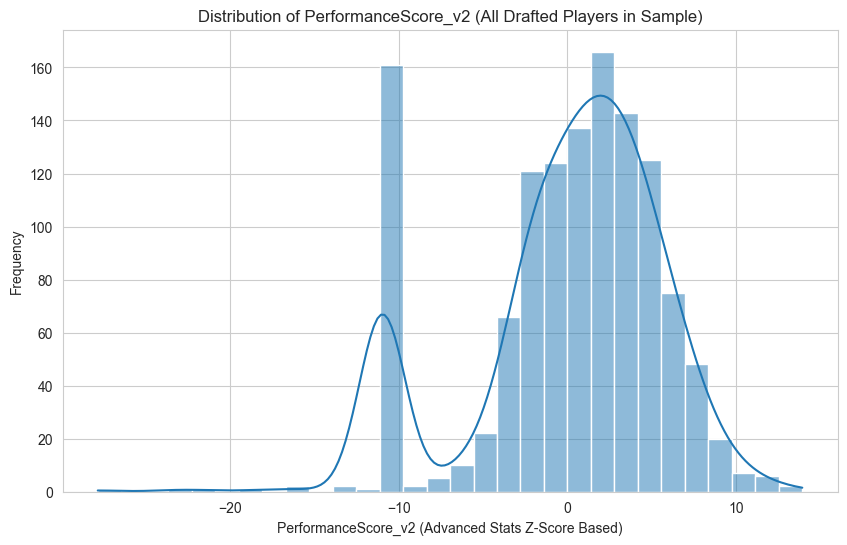

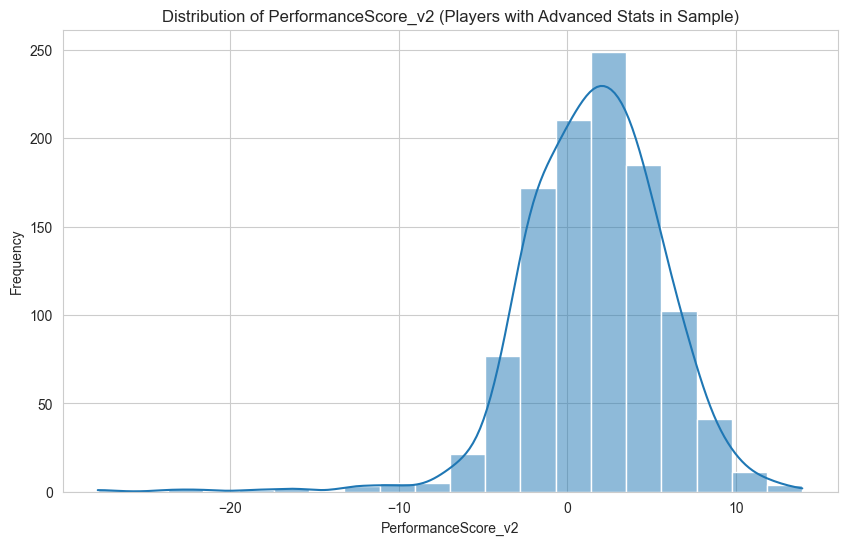

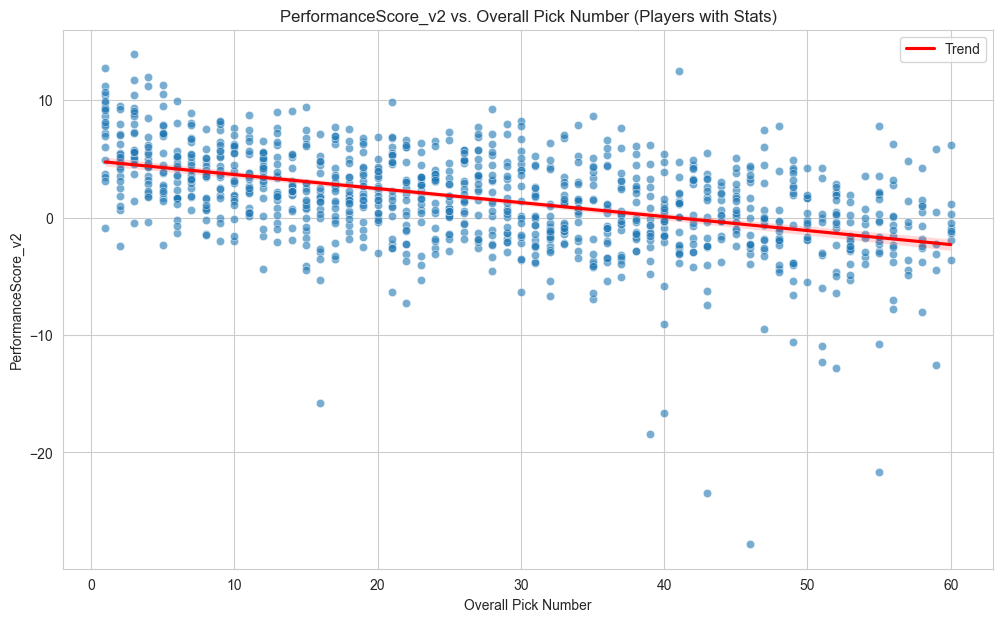


--- VOE_v2 Analysis ---


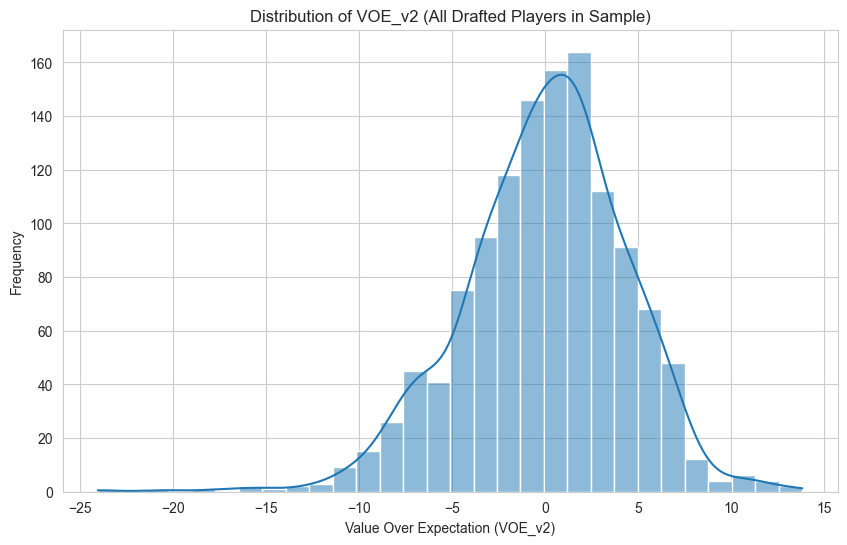

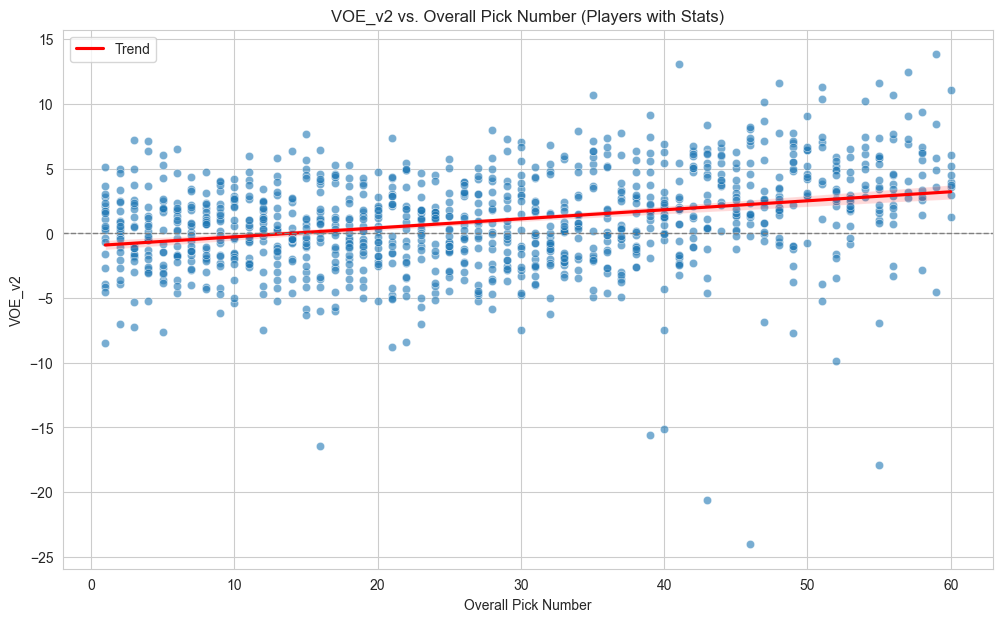


--- ROI_scaled_v2 Analysis ---


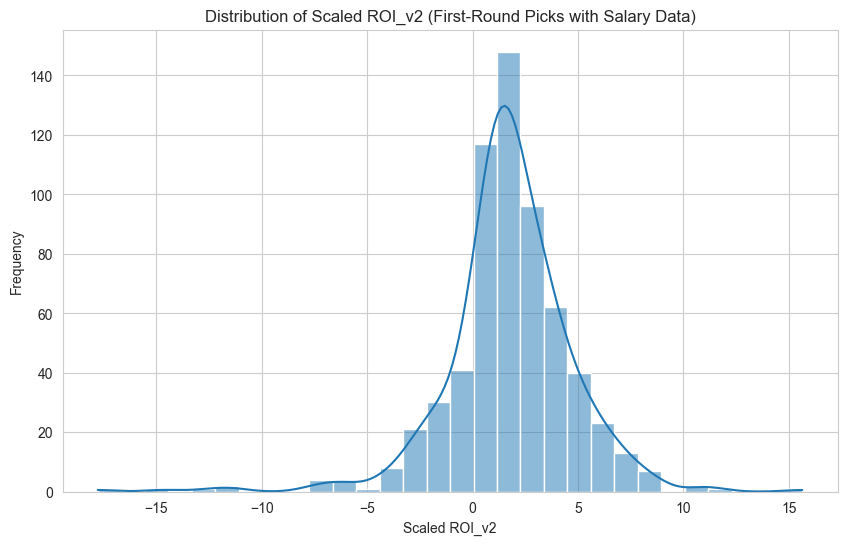

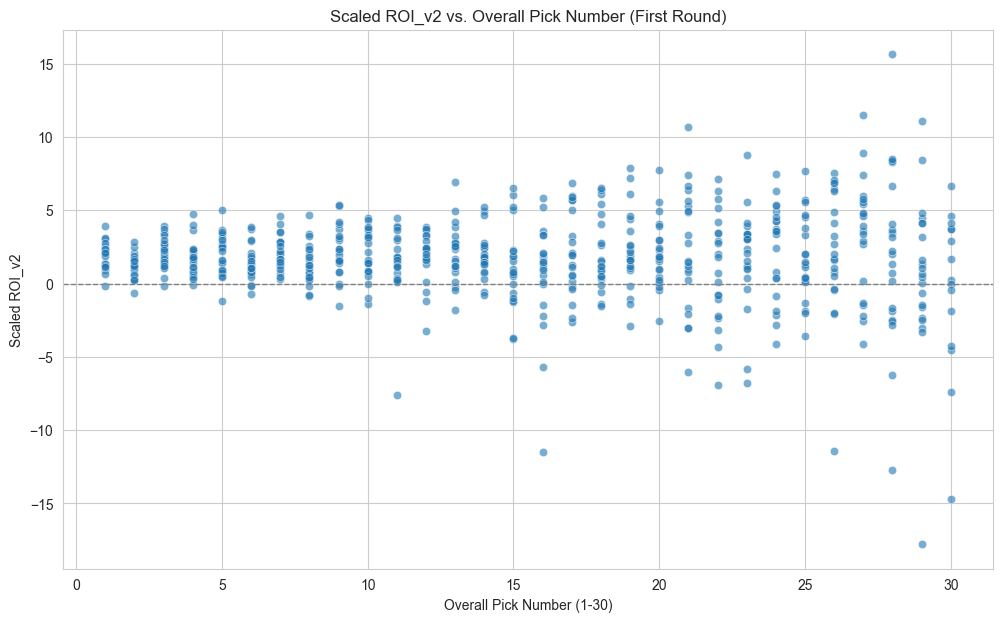

/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_35374/3086734049.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi_v2_present['DRAFT_SEGMENT_ROI_v2'] = pd.cut(df_roi_v2_present['OVERALL_PICK'], bins=bins, labels=labels, right=True)


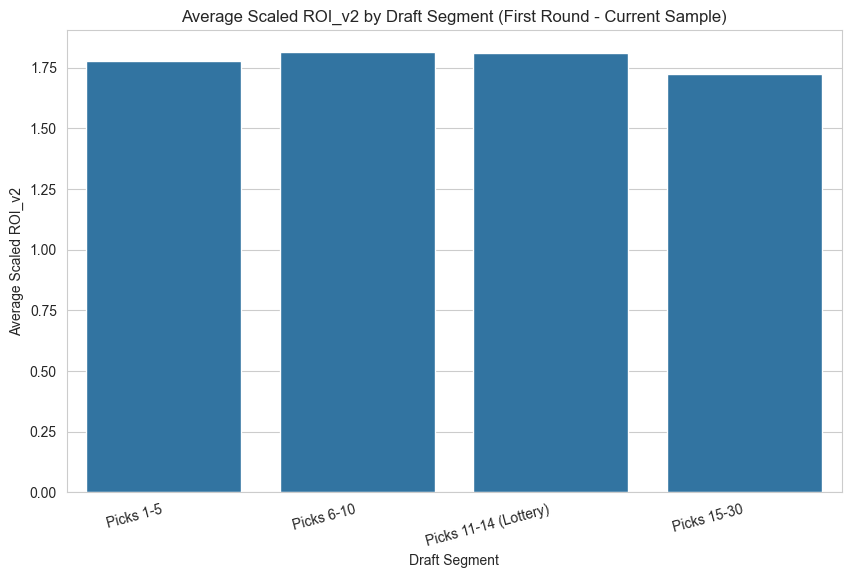


Average Scaled ROI_v2 by Draft Segment (Sample):


,DRAFT_SEGMENT_ROI_v2,ROI_scaled_v2
0,Picks 1-5,1.778865
1,Picks 6-10,1.813389
2,Picks 11-14 (Lottery),1.812469
3,Picks 15-30,1.725073


In [45]:
# Cell 27: EDA on PerformanceScore_v2, VOE_v2, and ROI_scaled_v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure player_summary_for_analysis_df is loaded (it should be from Cell 26)
if 'player_summary_for_analysis_df' in locals() and not player_summary_for_analysis_df.empty:
    print("--- EDA on New V2 Metrics (PerformanceScore_v2, VOE_v2, ROI_scaled_v2) ---")
    
    df_eda_v2 = player_summary_for_analysis_df.copy()

    # Set a style for plots
    sns.set_style("whitegrid")

    # --- Analysis of PerformanceScore_v2 ---
    print("\n--- PerformanceScore_v2 Analysis ---")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_eda_v2['PerformanceScore_v2'], kde=True, bins=30)
    plt.title('Distribution of PerformanceScore_v2 (All Drafted Players in Sample)')
    plt.xlabel('PerformanceScore_v2 (Advanced Stats Z-Score Based)')
    plt.ylabel('Frequency')
    plt.show()

    # For players who actually played (NUM_ADV_SEASONS_PLAYED_adv > 0)
    df_played_v2 = df_eda_v2[df_eda_v2['NUM_ADV_SEASONS_PLAYED_adv'] > 0]
    if not df_played_v2.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_played_v2['PerformanceScore_v2'], kde=True, bins=20)
        plt.title('Distribution of PerformanceScore_v2 (Players with Advanced Stats in Sample)')
        plt.xlabel('PerformanceScore_v2')
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df_played_v2, x='OVERALL_PICK', y='PerformanceScore_v2', alpha=0.6)
        sns.regplot(data=df_played_v2, x='OVERALL_PICK', y='PerformanceScore_v2', scatter=False, color='red', label='Trend')
        plt.title('PerformanceScore_v2 vs. Overall Pick Number (Players with Stats)')
        plt.xlabel('Overall Pick Number')
        plt.ylabel('PerformanceScore_v2')
        plt.legend()
        plt.show()
    else:
        print("No players with NUM_ADV_SEASONS_PLAYED_adv > 0 found for some v2 plots.")

    # --- Analysis of VOE_v2 ---
    print("\n--- VOE_v2 Analysis ---")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_eda_v2['VOE_v2'], kde=True, bins=30)
    plt.title('Distribution of VOE_v2 (All Drafted Players in Sample)')
    plt.xlabel('Value Over Expectation (VOE_v2)')
    plt.ylabel('Frequency')
    plt.show()

    if not df_played_v2.empty:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df_played_v2, x='OVERALL_PICK', y='VOE_v2', alpha=0.6)
        sns.regplot(data=df_played_v2, x='OVERALL_PICK', y='VOE_v2', scatter=False, color='red', label='Trend')
        plt.title('VOE_v2 vs. Overall Pick Number (Players with Stats)')
        plt.xlabel('Overall Pick Number')
        plt.ylabel('VOE_v2')
        plt.axhline(0, color='grey', linestyle='--', lw=1)
        plt.legend()
        plt.show()
    
    # --- Analysis of ROI_scaled_v2 ---
    print("\n--- ROI_scaled_v2 Analysis ---")
    df_roi_v2_present = df_eda_v2[df_eda_v2['ROI_scaled_v2'].notna()]
    if not df_roi_v2_present.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_roi_v2_present['ROI_scaled_v2'], kde=True, bins=30)
        plt.title('Distribution of Scaled ROI_v2 (First-Round Picks with Salary Data)')
        plt.xlabel('Scaled ROI_v2')
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df_roi_v2_present, x='OVERALL_PICK', y='ROI_scaled_v2', alpha=0.6)
        plt.title('Scaled ROI_v2 vs. Overall Pick Number (First Round)')
        plt.xlabel('Overall Pick Number (1-30)')
        plt.ylabel('Scaled ROI_v2')
        plt.axhline(0, color='grey', linestyle='--', lw=1)
        plt.show()

        # Average ROI_scaled_v2 by Draft Pick Segment
        bins = [0, 5, 10, 14, 30] 
        labels = ['Picks 1-5', 'Picks 6-10', 'Picks 11-14 (Lottery)', 'Picks 15-30']
        df_roi_v2_present['DRAFT_SEGMENT_ROI_v2'] = pd.cut(df_roi_v2_present['OVERALL_PICK'], bins=bins, labels=labels, right=True)
        
        avg_roi_by_segment_v2 = df_roi_v2_present.groupby('DRAFT_SEGMENT_ROI_v2', observed=False)['ROI_scaled_v2'].mean().reset_index()
        avg_roi_by_segment_v2['DRAFT_SEGMENT_ROI_v2'] = pd.Categorical(avg_roi_by_segment_v2['DRAFT_SEGMENT_ROI_v2'], categories=labels, ordered=True)
        avg_roi_by_segment_v2.sort_values('DRAFT_SEGMENT_ROI_v2', inplace=True)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=avg_roi_by_segment_v2, x='DRAFT_SEGMENT_ROI_v2', y='ROI_scaled_v2')
        plt.title('Average Scaled ROI_v2 by Draft Segment (First Round - Current Sample)')
        plt.ylabel('Average Scaled ROI_v2')
        plt.xlabel('Draft Segment')
        plt.xticks(rotation=15, ha='right')
        plt.show()
        
        print("\nAverage Scaled ROI_v2 by Draft Segment (Sample):")
        display(avg_roi_by_segment_v2)
    else:
        print("No players with ROI_v2 data to analyze.")
        
else:
    print("ERROR: 'player_summary_for_analysis_df' (with _v2 metrics) not found or is empty. Please ensure Cell 26 was run successfully.")